In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.cross_validation import train_test_split

# gensim
from gensim import corpora, models, similarities, matutils
# sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
# logging for gensim (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.stem.wordnet import WordNetLemmatizer

from surprise.prediction_algorithms.slope_one import SlopeOne

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## BeautifulSoup to Scrape local html files

In [151]:
jokelist = []
i = 0

while i<100:
    url = ("/Users/kaitlin/ds/metis/metisgh/Puryear_Metis/Project4/jokes/init"+str(i+1)+".html")
    page = open(url)
    soup = BeautifulSoup(page.read(),"lxml")

    if soup.find('td').get_text() != " ":
        jokel = soup.find('td').get_text().strip()
    else:
        jokel = soup.find('ul').get_text().strip()
    
    
    jokelist.append(jokel)
    i+=1


In [152]:
dj = pd.DataFrame()
dj["column"]=jokelist

In [153]:
for i in range(1,100):
    dj["column"][i] = dj["column"][i].replace("\n"," ")
    dj["column"][i] = dj["column"][i].replace("\t"," ")
    dj["column"][i] = dj["column"][i].replace("\'","'")

In [154]:
dj["column"][90]

'A Panda bear walks into a bar.  Sits down at a table and orders a beer  and a double cheeseburger.  After he is finished eating, he pulls out a gun and rips the place with gunfire.  Patrons scatter and dive under chairs and tables as the bear runs out the door.  After ensuring that no one is hurt,  the bartender races out the door, and calls after the bear "What the hell did you do that for?"  The bear calls back, "I\'m a Panda bear.  Look it up in the dictionary."    The bartender returns, pulls out his dictionary.  panda : \\Pan"da\\, n. (Zo["o]l.) A small Asiatic mammal (Ailurus fulgens) having fine soft fur. It is related to the bears, and inhabits the mountains of Northern India. Eats shoots and leaves.'

In [155]:
dj

column
0   A man visits the doctor. The doctor says "I ha...
1   This couple had an excellent relationship goin...
2   Q. What's 200 feet long and has 4 teeth?   A. ...
3   Q. What's the difference between a man and a t...
4   Q. What's O. J. Simpson's Internet address?  A...
5   Bill & Hillary are on a trip back to Arkansas....
6   How many feminists does it take to screw in a ...
7   Q. Did you hear about the dyslexic devil worsh...
8   A country guy goes into a city bar that has a ...
9   Two cannibals are eating a clown, one turns to...
10  Q. What do a hurricane, a tornado, and a redne...
11  A guy stood over his tee shot for what seemed ...
12  They asked the Japanese visitor if they have e...
13  The father was very anxious to marry off his o...
14  Q:  What did the blind person say when given s...
15  Q. What is orange and sounds like a parrot?   ...
16  How many men does it take to screw in a light ...
17  A dog walks into Western Union and asks the cl...
18  Q: If a person who speaks three languages is c...
19  What's the difference between a MacIntosh and ...
20                                                   
21  A duck walks into a pharmacy and asks for a co...
22  Q: What is the Australian word for a boomerang...
23  What do you get when you run over a parakeet w...
24  Two kindergarten girls were talking outside: o...
25  A guy walks into a bar and sits down next to a...
26  Clinton returns from a vacation in Arkansas an...
27  A mechanical, electrical and a software engine...
28  An old Scotsmen is sitting with a younger Scot...
29  Q: What's the difference between a Lawyer and ...
..                                                ...
70  At a recent Sacramento PC Users Group meeting,...
71  On the first day of college, the Dean addresse...
72  Q: What is the difference between George  Wash...
73  Q: How many stalkers does it take to change a ...
74  Q: Do you know the difference between an intel...
75  There once was a man and a woman that both  go...
76  If pro- is the opposite of con- then congress ...
77  Q: What's the difference between the governmen...
78  Q: Ever wonder why the IRS calls it Form 1040?...
79  Hillary, Bill Clinton and the Pope are sitting...
80  An Asian man goes into a New York CityBank to ...
81  Q: How do you keep a computer programmer in th...
82  What a woman says:  "This place is a mess!  C'...
83  Q: What is the difference between Mechanical E...
84  Q: How many Presidents does it take to screw i...
85  A neutron walks into a bar and orders a drink....
86  A man, recently completing a routine physical ...
87  A Czechoslovakian man felt his eyesight was gr...
88  A radio conversation of a US naval  ship with ...
89  Q: How many programmers does it take to change...
90  A Panda bear walks into a bar.  Sits down at a...
91  Early one morning a mother went to her sleepin...
92  Reaching the end of a job interview, the human...
93  Two atoms are walking down the street when one...
94  Just a thought ..  Before criticizing someone,...
95  Two attorneys went into a diner and ordered tw...
96  A teacher is explaining to her class how diffe...
97  Age and Womanhood  1. Between the ages of 13 a...
98  A bus station is where a bus stops. A train st...
99  Q: Whats the difference between greeting a Que...

[100 rows x 1 columns]

## Lemmatizing

In [181]:
short = []
for i in range(100):
    joke = dj['column'][i].split()
    lems = []
    for j in range(len(joke)):
        lmtzr = WordNetLemmatizer.lemmatize('xyz', joke[j])
        lems.append(lmtzr)
    short.append(lems)

In [199]:
for i in range(100):
    my_lst = short[i]
    my_lst_str = ' '.join(map(str, my_lst))
    dj["lemons"][i]=my_lst_str

In [200]:
dj.head()

column  \
0  A man visits the doctor. The doctor says "I ha...   
1  This couple had an excellent relationship goin...   
2  Q. What's 200 feet long and has 4 teeth?   A. ...   
3  Q. What's the difference between a man and a t...   
4  Q. What's O. J. Simpson's Internet address?  A...   

                                              lemons  
0  A man visit the doctor. The doctor say "I have...  
1  This couple had an excellent relationship goin...  
2  Q. What's 200 foot long and ha 4 teeth? A. The...  
3  Q. What's the difference between a man and a t...  
4  Q. What's O. J. Simpson's Internet address? A....

## CountVectorizer for parsing/counting words


In [69]:
count_vectorizer = CountVectorizer(ngram_range=(2,3),  
                                   stop_words='english', token_pattern="\\b[a-z][a-z]+\\b")
counted = count_vectorizer.fit_transform(dj["column"]) 
counts = count_vectorizer.transform(dj["column"]).transpose()
cvec = pd.DataFrame(counted.toarray(), index=dj["column"], columns=count_vectorizer.get_feature_names())

In [70]:
cvec

abortion mr  \
column                                                            
A man visits the doctor. The doctor says "I hav...            0   
This couple had an excellent relationship going...            0   
Q. What's 200 feet long and has 4 teeth?   A. T...            0   
Q. What's the difference between a man and a to...            0   
Q. What's O. J. Simpson's Internet address?  A....            0   
Bill & Hillary are on a trip back to Arkansas. ...            0   
How many feminists does it take to screw in a l...            0   
Q. Did you hear about the dyslexic devil worshi...            0   
A country guy goes into a city bar that has a d...            0   
Two cannibals are eating a clown, one turns to ...            0   
Q. What do a hurricane, a tornado, and a rednec...            0   
A guy stood over his tee shot for what seemed a...            0   
They asked the Japanese visitor if they have el...            0   
The father was very anxious to marry off his on...            0   
Q:  What did the blind person say when given so...            0   
Q. What is orange and sounds like a parrot?    ...            0   
How many men does it take to screw in a light b...            0   
A dog walks into Western Union and asks the cle...            0   
Q: If a person who speaks three languages is ca...            0   
What's the difference between a MacIntosh and a...            0   
                                                              0   
A duck walks into a pharmacy and asks for a con...            0   
Q: What is the Australian word for a boomerang ...            0   
What do you get when you run over a parakeet wi...            0   
Two kindergarten girls were talking outside: on...            0   
A guy walks into a bar and sits down next to an...            0   
Clinton returns from a vacation in Arkansas and...            0   
A mechanical, electrical and a software enginee...            0   
An old Scotsmen is sitting with a younger Scott...            0   
Q: What's the difference between a Lawyer and a...            0   
...                                                         ...   
At a recent Sacramento PC Users Group meeting, ...            0   
On the first day of college, the Dean addressed...            0   
Q: What is the difference between George  Washi...            0   
Q: How many stalkers does it take to change a l...            0   
Q: Do you know the difference between an intell...            0   
There once was a man and a woman that both  got...            0   
If pro- is the opposite of con- then congress m...            0   
Q: What's the difference between the government...            0   
Q: Ever wonder why the IRS calls it Form 1040? ...            0   
Hillary, Bill Clinton and the Pope are sitting ...            0   
An Asian man goes into a New York CityBank to e...            0   
Q: How do you keep a computer programmer in the...            0   
What a woman says:  "This place is a mess!  C'm...            0   
Q: What is the difference between Mechanical En...            0   
Q: How many Presidents does it take to screw in...            0   
A neutron walks into a bar and orders a drink. ...            0   
A man, recently completing a routine physical e...            0   
A Czechoslovakian man felt his eyesight was gro...            0   
A radio conversation of a US naval  ship with C...            0   
Q: How many programmers does it take to change ...            0   
A Panda bear walks into a bar.  Sits down at a ...            0   
Early one morning a mother went to her sleeping...            0   
Reaching the end of a job interview, the human ...            0   
Two atoms are walking down the street when one ...            0   
Just a thought ..  Before criticizing someone, ...            0   
Two attorneys went into a diner and ordered two...            0   
A teacher is explaining to her class how differ...            0   
Age and Womanhood  1. Between th

In [145]:
# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=10000, stop_words= 'english', ngram_range=(1,2))
tf = tf_vectorizer.fit_transform(data)
tf_feature_names = tf_vectorizer.get_feature_names()

tf.shape

(4693, 3676)

## TF-IDF Vectorizer

In [163]:
# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words= 'english', ngram_range=(1,2))
tfidf = tfidf_vectorizer.fit_transform(dj["column"])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

print(tfidf_feature_names)

['000', '10', '11', '18', '24', '30', '30 years', '50', 'accounting', 'actually', 'age', 'air', 'american', 'announced', 'answers', 'aren', 'arkansas', 'arrives', 'aside', 'asked', 'asks', 'away', 'awfully', 'bad', 'bad news', 'ball', 'bar', 'bar orders', 'bar sits', 'bartender', 'beautiful', 'beer', 'beer says', 'believe', 'better', 'big', 'bob', 'body', 'boy', 'boy replied', 'broke', 'build', 'bulb', 'called', 'calls', 'came', 'came home', 'car', 'celebrate', 'change', 'change lightbulb', 'civil', 'clinton', 'come', 'comes', 'common', 'company', 'completely', 'concerned', 'condom', 'conversation', 'cost', 'country', 'couple', 'course', 'damn', 'day', 'decided', 'decides', 'desert', 'desk', 'did', 'did hear', 'die', 'difference', 'different', 'discussing', 'doctor', 'doctor doctor', 'doctor says', 'does', 'does change', 'does screw', 'doesn', 'dog', 'dollar', 'don', 'door', 'dress', 'drink', 'driving', 'dyslexic', 'easy', 'eat', 'eating', 'electrical', 'electrical engineer', 'end', 'e

In [158]:
tfidf.shape

(100, 336)

## LDA Analysis with Count Vectorizer

2018-03-05 15:49:42,289 : INFO : using symmetric alpha at 0.08333333333333333
2018-03-05 15:49:42,291 : INFO : using symmetric eta at 0.08333333333333333
2018-03-05 15:49:42,292 : INFO : using serial LDA version on this node
2018-03-05 15:49:42,555 : INFO : running online (multi-pass) LDA training, 12 topics, 10 passes over the supplied corpus of 3676 documents, updating model once every 2000 documents, evaluating perplexity every 3676 documents, iterating 50x with a convergence threshold of 0.001000
2018-03-05 15:49:42,561 : INFO : PROGRESS: pass 0, at document #2000/3676
2018-03-05 15:49:43,755 : INFO : merging changes from 2000 documents into a model of 3676 documents
2018-03-05 15:49:43,856 : INFO : topic #11 (0.083): 0.003*"height flagpole flagpole" + 0.003*"measure height flagpole" + 0.003*"huge machine" + 0.003*"flagpole ground lays" + 0.003*"huge machine end" + 0.003*"hear clinton announced" + 0.003*"flight attendants" + 0.003*"flight attendants took" + 0.003*"attention says de

2018-03-05 15:49:47,254 : INFO : topic #10 (0.083): 0.004*"patrons scatter dive" + 0.004*"orgasm oh darwin" + 0.004*"son time confession" + 0.004*"ready start demonstration" + 0.004*"questions point male" + 0.004*"stared woman lined" + 0.004*"ripped oh gaaaad" + 0.004*"pope sobs letter" + 0.004*"said wow kidding" + 0.004*"met reception committee"
2018-03-05 15:49:47,255 : INFO : topic #3 (0.083): 0.004*"wow price dog" + 0.004*"wow wow clerk" + 0.004*"wow wow bow" + 0.004*"wishes send bow" + 0.004*"owner quite concerned" + 0.004*"tour told enjoy" + 0.004*"replied think ll" + 0.004*"want school children" + 0.004*"says rinse lather" + 0.004*"slash slash escape"
2018-03-05 15:49:47,256 : INFO : topic diff=0.333331, rho=0.510443
2018-03-05 15:49:47,263 : INFO : PROGRESS: pass 2, at document #2000/3676
2018-03-05 15:49:47,835 : INFO : merging changes from 2000 documents into a model of 3676 documents
2018-03-05 15:49:47,859 : INFO : topic #4 (0.083): 0.003*"beer double cheeseburger" + 0.003*

2018-03-05 15:49:50,611 : INFO : topic #4 (0.083): 0.004*"speech teacher rectum" + 0.003*"says methodist st" + 0.003*"sees trying walks" + 0.003*"stand snowball chance" + 0.003*"sudden scream library" + 0.003*"walking street atom" + 0.003*"muttering scribes left" + 0.003*"rips place gunfire" + 0.003*"mon need clean" + 0.003*"regarding seemingly impossible"
2018-03-05 15:49:50,612 : INFO : topic #9 (0.083): 0.003*"quiet pass room" + 0.003*"ship united states" + 0.003*"time physicist wakes" + 0.003*"patio yesterday condom" + 0.003*"united states atlantic" + 0.003*"myriad recreations available" + 0.003*"shrugged shoulders exchanged" + 0.003*"said yes getting" + 0.003*"time money getting" + 0.003*"new national bird"
2018-03-05 15:49:50,614 : INFO : topic diff=0.185884, rho=0.413874
2018-03-05 15:49:50,623 : INFO : PROGRESS: pass 4, at document #2000/3676
2018-03-05 15:49:51,147 : INFO : merging changes from 2000 documents into a model of 3676 documents
2018-03-05 15:49:51,169 : INFO : topi

2018-03-05 15:49:53,876 : INFO : topic #10 (0.083): 0.004*"school tells mother" + 0.004*"said son time" + 0.003*"patrons scatter dive" + 0.003*"orgasm oh darwin" + 0.003*"son time confession" + 0.003*"ready start demonstration" + 0.003*"questions point male" + 0.003*"pope sobs letter" + 0.003*"stared woman lined" + 0.003*"ripped oh gaaaad"
2018-03-05 15:49:53,879 : INFO : topic #5 (0.083): 0.004*"station outskirts town" + 0.004*"years wonderful wife" + 0.003*"walks western union" + 0.003*"pc users group" + 0.003*"outskirts town attendant" + 0.003*"wife watching clubhouse" + 0.003*"steadily worse felt" + 0.003*"word supposed celebrate" + 0.003*"paid thousand dollars" + 0.003*"use negatives differently"
2018-03-05 15:49:53,880 : INFO : topic diff=0.100101, rho=0.357188
2018-03-05 15:49:53,890 : INFO : PROGRESS: pass 6, at document #2000/3676
2018-03-05 15:49:54,394 : INFO : merging changes from 2000 documents into a model of 3676 documents
2018-03-05 15:49:54,418 : INFO : topic #1 (0.083

2018-03-05 15:49:57,044 : INFO : topic #6 (0.083): 0.003*"mechanism zipper buttons" + 0.003*"systems thousands electrical" + 0.003*"throw thousand dollar" + 0.003*"negative negative followed" + 0.003*"parliament member guard" + 0.003*"produced sandwiches briefcases" + 0.003*"replied start buying" + 0.003*"pour version bible" + 0.003*"talk mother married" + 0.003*"multi million dollar"
2018-03-05 15:49:57,047 : INFO : topic #9 (0.083): 0.003*"quiet pass room" + 0.003*"ship united states" + 0.003*"time physicist wakes" + 0.003*"super sex old" + 0.003*"patio yesterday condom" + 0.003*"united states atlantic" + 0.003*"myriad recreations available" + 0.003*"shrugged shoulders exchanged" + 0.003*"time money getting" + 0.003*"said yes getting"
2018-03-05 15:49:57,048 : INFO : topic diff=0.070938, rho=0.318821
2018-03-05 15:49:57,057 : INFO : PROGRESS: pass 8, at document #2000/3676
2018-03-05 15:49:57,562 : INFO : merging changes from 2000 documents into a model of 3676 documents
2018-03-05 1

2018-03-05 15:50:00,158 : INFO : topic #2 (0.083): 0.003*"reported sightings sasquatch" + 0.003*"pants skin tight" + 0.003*"recent publicity outing" + 0.003*"skin tight high" + 0.003*"string tie bulky" + 0.003*"pride movement dyslexics" + 0.003*"wreck vehicles completely" + 0.003*"returns pulls dictionary" + 0.003*"year old latex" + 0.003*"teller says fluk"
2018-03-05 15:50:00,162 : INFO : topic #4 (0.083): 0.003*"speech teacher rectum" + 0.003*"says methodist st" + 0.003*"sees trying walks" + 0.003*"stand snowball chance" + 0.003*"sudden scream library" + 0.003*"walking street atom" + 0.003*"muttering scribes left" + 0.003*"rips place gunfire" + 0.003*"mon need clean" + 0.003*"worked nerve ask"
2018-03-05 15:50:00,165 : INFO : topic #9 (0.083): 0.003*"quiet pass room" + 0.003*"ship united states" + 0.003*"time physicist wakes" + 0.003*"super sex old" + 0.003*"patio yesterday condom" + 0.003*"united states atlantic" + 0.003*"myriad recreations available" + 0.003*"shrugged shoulders exc

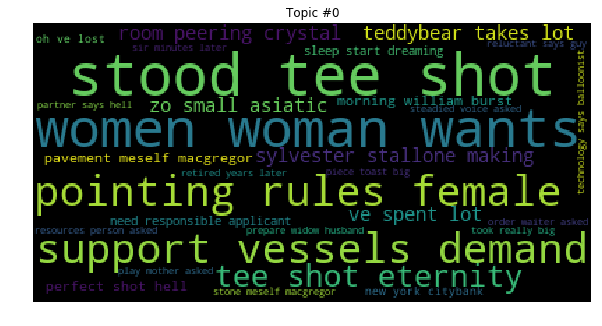

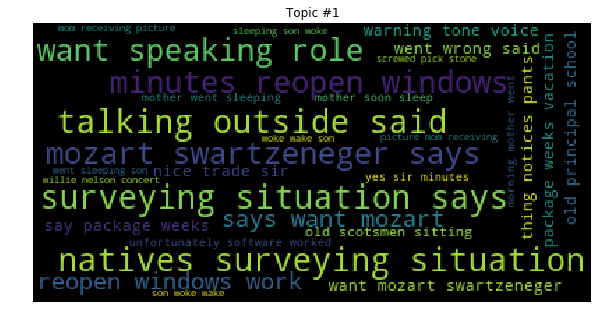

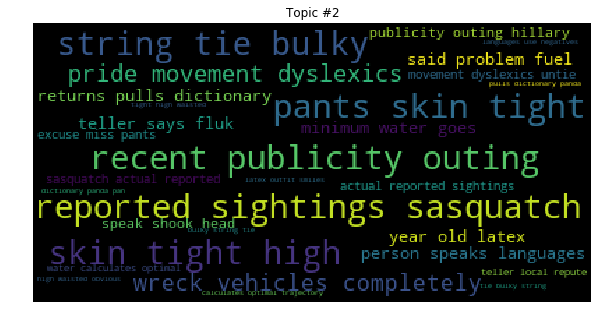

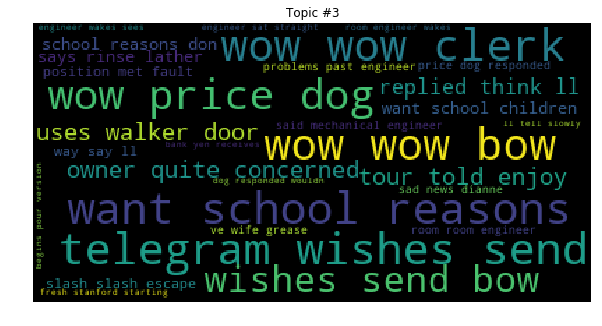

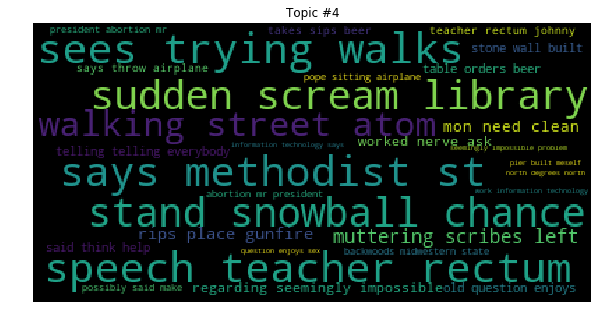

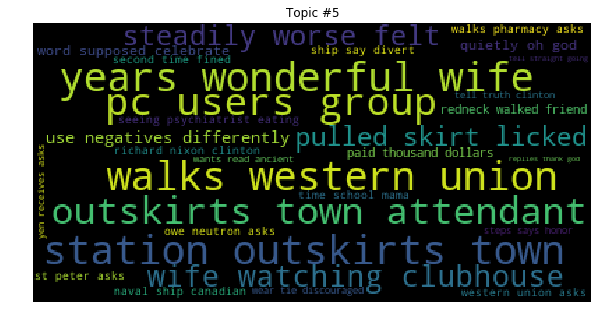

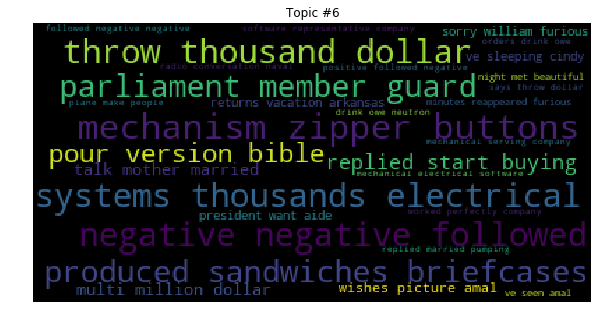

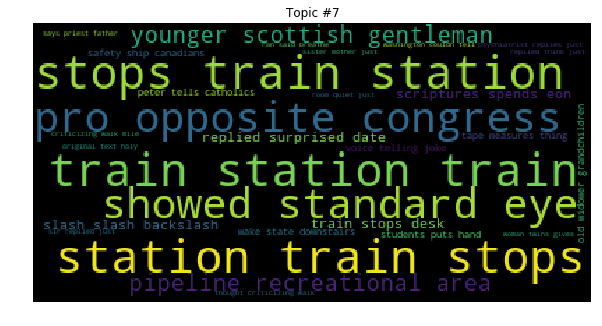

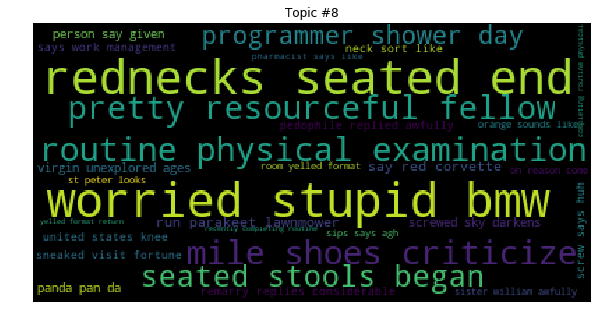

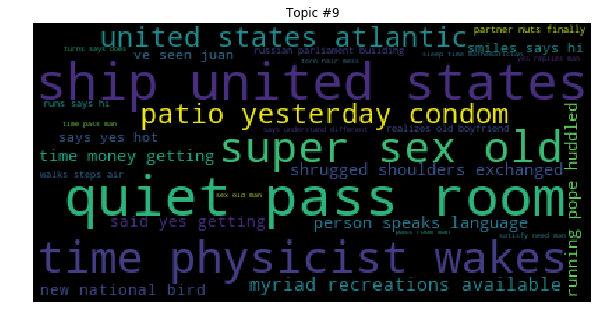

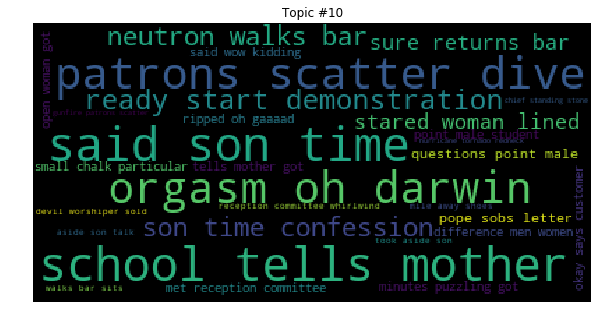

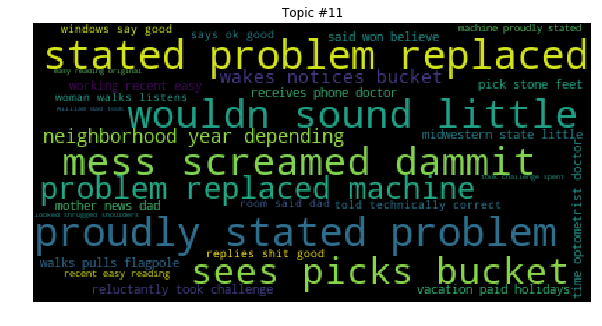

In [159]:
corpus = matutils.Sparse2Corpus(tf)
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())
# Create lda model (equivalent to "fit" in sklearn)
lda = models.LdaModel(corpus=corpus, num_topics=12, id2word=id2word, passes=10, minimum_probability=0.03)

#lda.print_topics(num_words=10)

num_words = 30 # Number of words to include in word cloud
for t in range(lda.num_topics):
    plt.figure(figsize=(10,8))
    plt.imshow(WordCloud().fit_words(dict(lda.show_topic(t, num_words))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

## LDA Analysis on TF-IDF Vector

2018-03-05 15:53:09,474 : INFO : using symmetric alpha at 0.05
2018-03-05 15:53:09,475 : INFO : using symmetric eta at 0.05
2018-03-05 15:53:09,477 : INFO : using serial LDA version on this node
2018-03-05 15:53:09,904 : INFO : running online (multi-pass) LDA training, 20 topics, 10 passes over the supplied corpus of 336 documents, updating model once every 336 documents, evaluating perplexity every 336 documents, iterating 50x with a convergence threshold of 0.001000
2018-03-05 15:53:10,546 : INFO : -562.555 per-word bound, 22173553411269731125983524427631409840277331787818701501544843401275959806601299032717701508256160672210682961401265688248844331165354410315086684415142489422674811420672.0 perplexity estimate based on a held-out corpus of 336 documents with 280 words
2018-03-05 15:53:10,547 : INFO : PROGRESS: pass 0, at document #336/336
2018-03-05 15:53:10,693 : INFO : topic #14 (0.050): 0.005*"ahead pay responds" + 0.004*"ages like" + 0.004*"actual reported sightings" + 0.004*"a

2018-03-05 15:53:11,544 : INFO : topic diff=0.013977, rho=0.447214
2018-03-05 15:53:11,694 : INFO : -12.501 per-word bound, 5798.4 perplexity estimate based on a held-out corpus of 336 documents with 280 words
2018-03-05 15:53:11,695 : INFO : PROGRESS: pass 4, at document #336/336
2018-03-05 15:53:11,820 : INFO : topic #9 (0.050): 0.010*"address slash" + 0.010*"americans captain" + 0.010*"accounting degree" + 0.008*"ahead pay" + 0.006*"amal husband responds" + 0.006*"american currency" + 0.002*"actually half sister" + 0.002*"adoption goes family" + 0.002*"angel takes" + 0.002*"aghast possible asked"
2018-03-05 15:53:11,821 : INFO : topic #8 (0.050): 0.008*"afterward feels" + 0.007*"announced new national" + 0.005*"aides nervously" + 0.004*"america fully explored" + 0.003*"addressed students pointing" + 0.003*"actually civil" + 0.002*"ancient original" + 0.002*"age old question" + 0.002*"amal husband" + 0.002*"accompanied destroyers cruisers"
2018-03-05 15:53:11,821 : INFO : topic #18 (

2018-03-05 15:53:12,910 : INFO : topic #4 (0.050): 0.008*"actually half" + 0.008*"airplane make" + 0.006*"announced new" + 0.003*"alzheimer disease man" + 0.002*"age womanhood" + 0.002*"accounting charges engineer" + 0.002*"ages like europe" + 0.001*"actually civil engineer" + 0.001*"air balloon" + 0.001*"angel takes"
2018-03-05 15:53:12,911 : INFO : topic #2 (0.050): 0.014*"aide replies" + 0.013*"amazon suddenly finds" + 0.011*"agreed said" + 0.010*"actually half sister" + 0.010*"agrees day walking" + 0.010*"americans aircraft" + 0.010*"actual reported" + 0.009*"angel takes aside" + 0.009*"airplane says throw" + 0.008*"aides nervously approach"
2018-03-05 15:53:12,912 : INFO : topic #16 (0.050): 0.010*"announced dianne said" + 0.006*"ages like africa" + 0.005*"actually civil" + 0.004*"add bow wow" + 0.002*"age old question" + 0.002*"adoption goes family" + 0.001*"airplane says" + 0.001*"ages like europe" + 0.001*"aircraft carrier uss" + 0.000*"agrees day walking"
2018-03-05 15:53:12,9

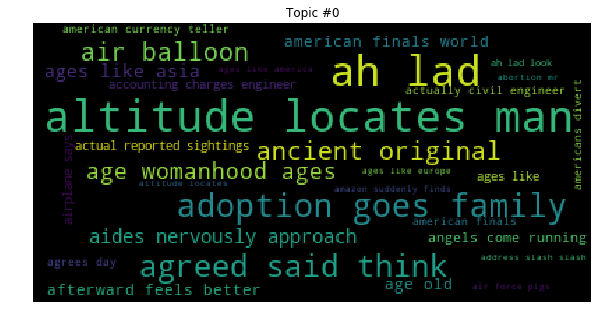

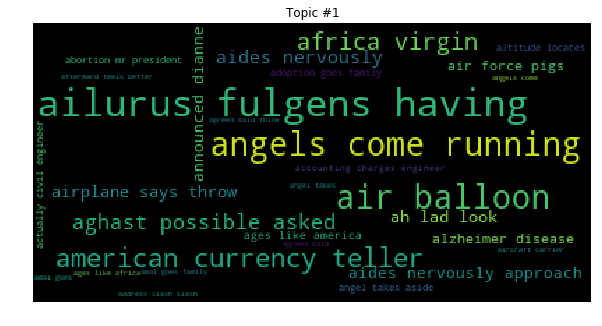

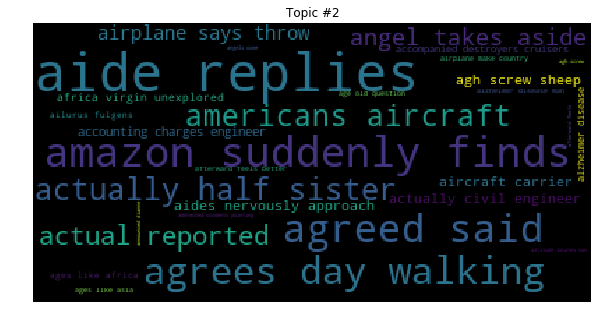

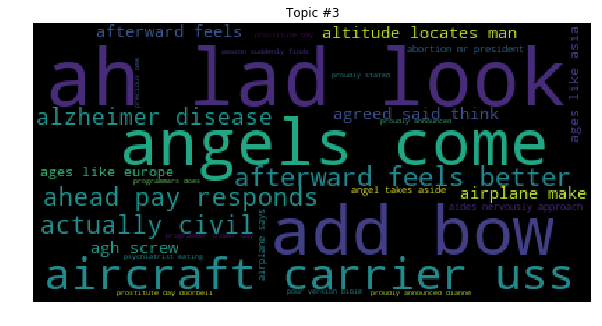

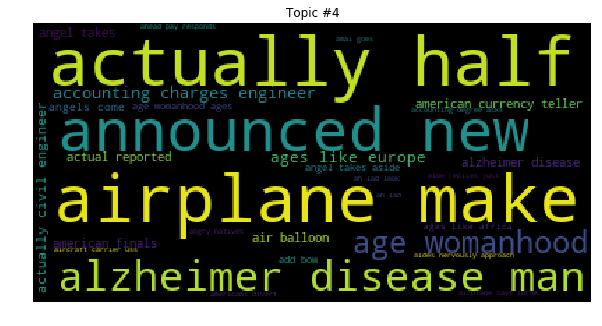

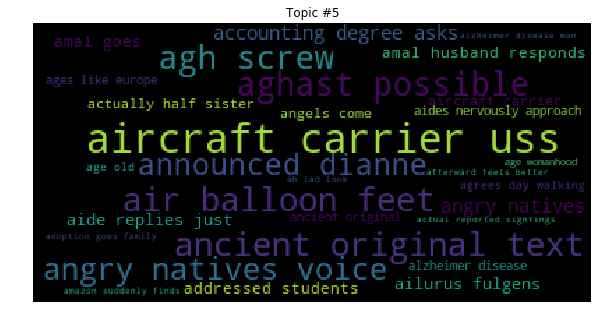

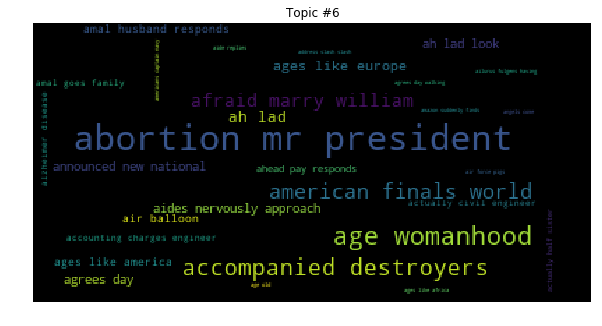

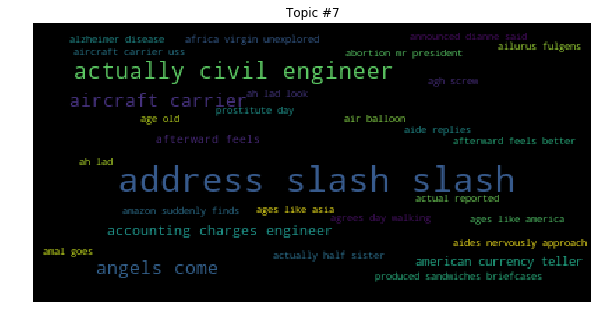

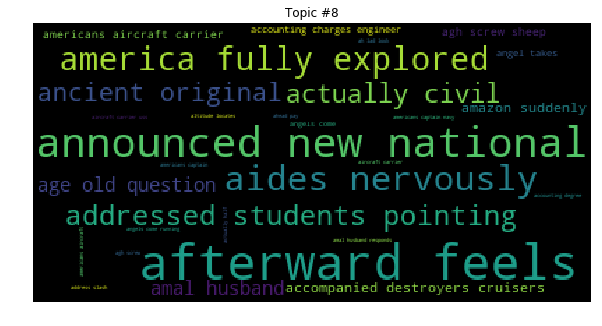

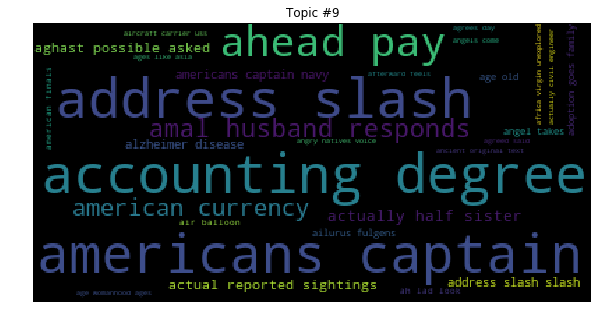

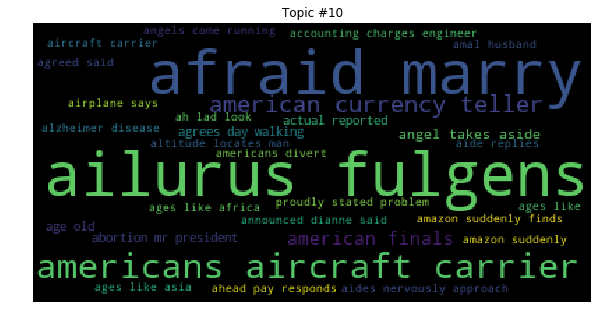

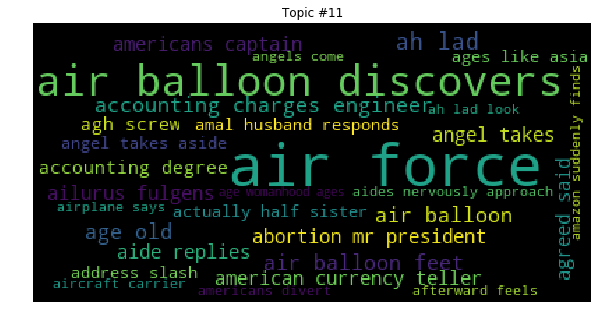

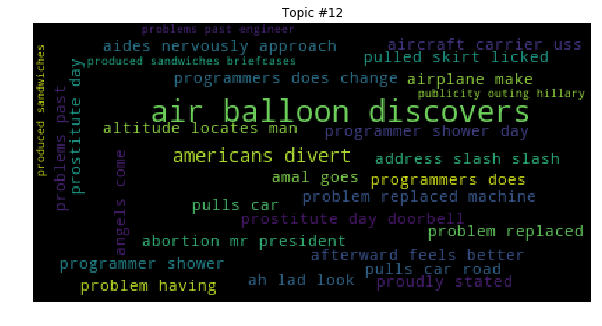

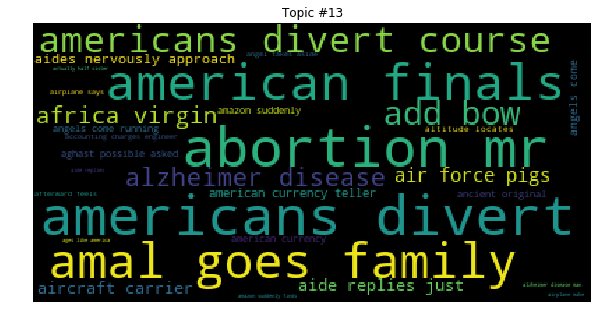

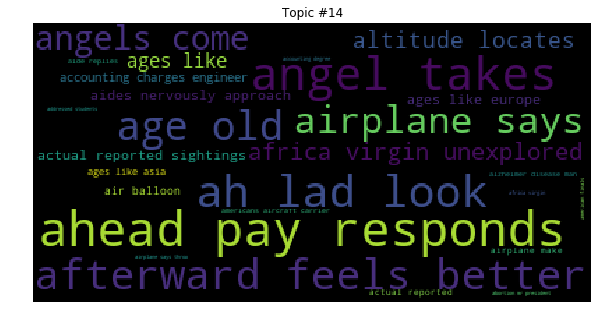

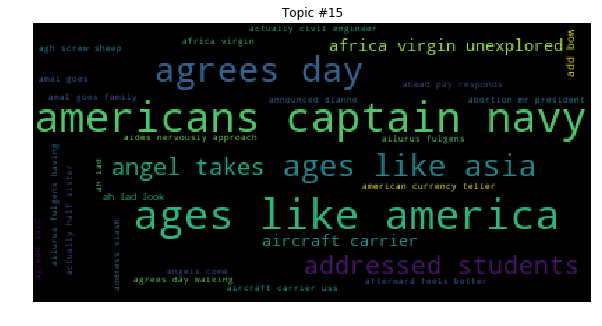

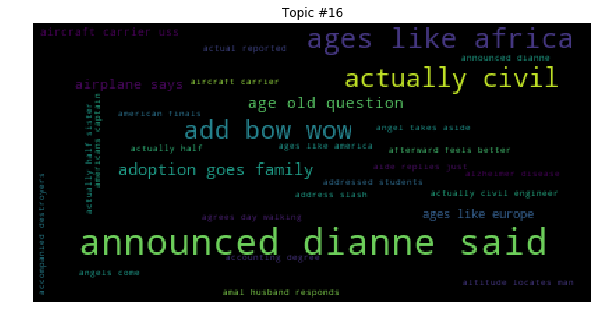

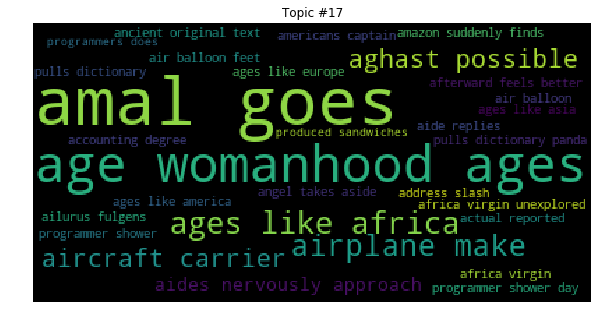

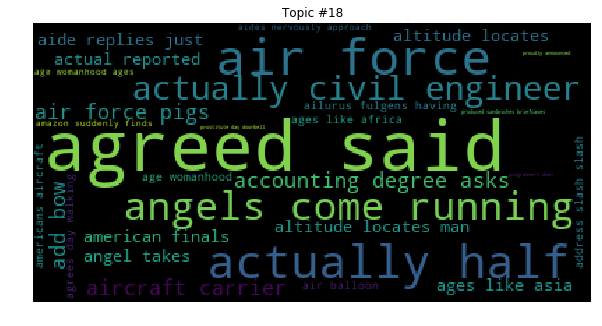

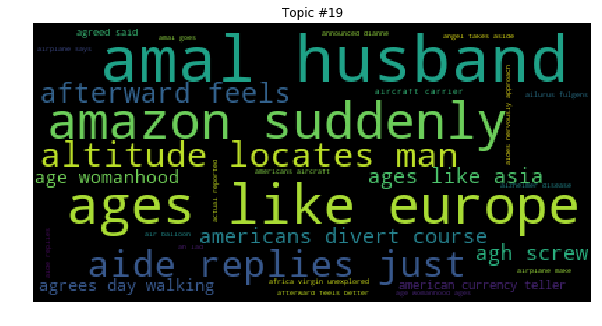

In [164]:
corpus = matutils.Sparse2Corpus(tfidf)
id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())
# Create lda model (equivalent to "fit" in sklearn)
lda = models.LdaModel(corpus=corpus, num_topics=20, id2word=id2word, passes=10, minimum_probability=0.03)

#lda.print_topics(num_words=10)

num_words = 30 # Number of words to include in word cloud
for t in range(lda.num_topics):
    plt.figure(figsize=(10,8))
    plt.imshow(WordCloud().fit_words(dict(lda.show_topic(t, num_words))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

## K Means Clustering

In [59]:
#mu_digits = km.cluster_centers_

In [61]:
#mu_digits.shape

(10, 4693)

In [62]:
def get_cluster_centers(X, labels, k_num):
    CC_list = []
    for k in range(k_num):
        # get the mean coordinates of each cluster
        CC_list.append(np.mean(X[labels == k], axis = 0))
    return CC_list

# for each cluster substract the mean from each data point to get the error
# then get the magnitude of each error, square it, and sum it
def get_SSE(X, labels):
    k_num = len(np.unique(labels))
    CC_list = get_cluster_centers(X, labels, k_num)
    CSEs = []
    for k in range(k_num):
        # for each cluster of k we get the coordinates of how far off each point is to the cluster
        error_cords = X[labels == k] - CC_list[k]
        # square the coordinates and sum to get the magnitude squared
        error_cords_sq = error_cords ** 2
        error_mag_sq = np.sum(error_cords_sq, axis = 1)
        # since we already have the magnitude of the error squared we can just take the sum for the cluster
        CSE = np.sum(error_mag_sq)
        CSEs.append(CSE)
    # sum each cluster's sum of squared errors
    return sum(CSEs)

## K-Means and Silhouette Score


### K Means on TF-IDF

In [206]:
labels = km.labels_

SSEs = []
Sil_coefs = []

for k in range(2,20):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(tfidf)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(cvec,labels, metric='euclidean'))
    SSEs.append(get_SSE(cvec, labels)) # The SSE is just inertia, we
                                            # could have just said km.inertia_

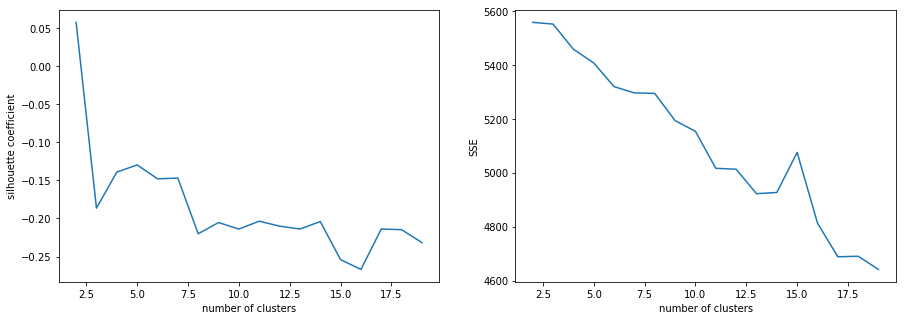

In [207]:
# number of clusters for kmeans
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True)
k_clusters = range(2,20)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# Sum of Square Error
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

### K Means on CountVectorizer

In [202]:
labels = km.labels_

SSEs = []
Sil_coefs = []

for k in range(2,20):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(cvec)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(cvec,labels, metric='euclidean'))
    SSEs.append(get_SSE(cvec, labels)) # The SSE is just inertia, we
                                            # could have just said km.inertia_

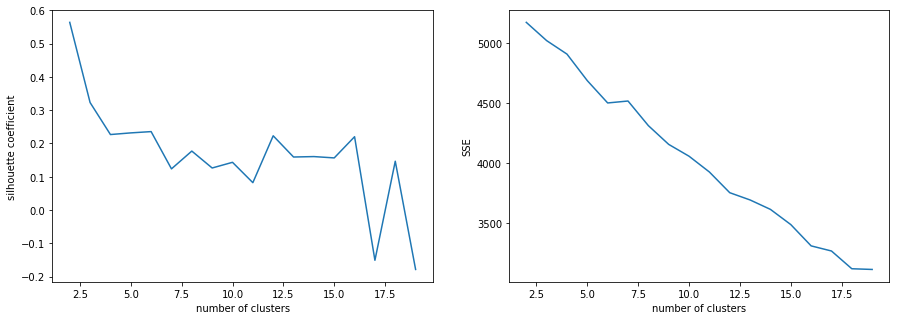

In [203]:
# number of clusters for kmeans
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True)
k_clusters = range(2,20)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# Sum of Square Error
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

In [204]:
km = KMeans(n_clusters=16)
km.fit(cvec)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

# K = 12

In [ ]:
tsne plot from word2vec

In [ ]:
pyldavis

## Joke Ratings

In [208]:
df = pd.DataFrame.from_csv('/Users/kaitlin/ds/metis/metisgh/Puryear_Metis/Project4/jester-data.csv', 
                      header=0, 
                      sep=',', 
                      index_col=0, 
                      parse_dates=True, 
                      encoding=None, 
                      tupleize_cols=None, 
                      infer_datetime_format=False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


In [209]:
df = df.reset_index(drop=False)

In [210]:
df.head()

N_Answered      1      2      3      4     5     6     7     8      9  \
0          74  -7.82   8.79  -9.66  -8.16 -7.52 -8.50 -9.85  4.17  -8.98   
1         100   4.08  -0.29   6.36   4.37 -2.38 -9.66 -0.73 -5.34   8.88   
2          49  99.00  99.00  99.00  99.00  9.03  9.27  9.03  9.27  99.00   
3          48  99.00   8.35  99.00  99.00  1.80  8.16 -2.82  6.21  99.00   
4          91   8.50   4.61  -4.17  -5.39  1.36  1.60  7.04  4.61  -0.44   

   ...       91     92     93     94     95     96     97     98     99    100  
0  ...     2.82  99.00  99.00  99.00  99.00  99.00  -5.63  99.00  99.00  99.00  
1  ...     2.82  -4.95  -0.29   7.86  -0.19  -2.14   3.06   0.34  -4.32   1.07  
2  ...    99.00  99.00  99.00   9.08  99.00  99.00  99.00  99.00  99.00  99.00  
3  ...    99.00  99.00  99.00   0.53  99.00  99.00  99.00  99.00  99.00  99.00  
4  ...     5.19   5.58   4.27   5.19   5.73   1.55   3.11   6.55   1.80   1.60  

[5 rows x 101 columns]

In [211]:
for i in range(1,101):
    i = str(i)
    df[i].replace({99.00:0},inplace=True)

In [212]:
df.head()

N_Answered     1     2     3     4     5     6     7     8     9  ...   \
0          74 -7.82  8.79 -9.66 -8.16 -7.52 -8.50 -9.85  4.17 -8.98  ...    
1         100  4.08 -0.29  6.36  4.37 -2.38 -9.66 -0.73 -5.34  8.88  ...    
2          49  0.00  0.00  0.00  0.00  9.03  9.27  9.03  9.27  0.00  ...    
3          48  0.00  8.35  0.00  0.00  1.80  8.16 -2.82  6.21  0.00  ...    
4          91  8.50  4.61 -4.17 -5.39  1.36  1.60  7.04  4.61 -0.44  ...    

     91    92    93    94    95    96    97    98    99   100  
0  2.82  0.00  0.00  0.00  0.00  0.00 -5.63  0.00  0.00  0.00  
1  2.82 -4.95 -0.29  7.86 -0.19 -2.14  3.06  0.34 -4.32  1.07  
2  0.00  0.00  0.00  9.08  0.00  0.00  0.00  0.00  0.00  0.00  
3  0.00  0.00  0.00  0.53  0.00  0.00  0.00  0.00  0.00  0.00  
4  5.19  5.58  4.27  5.19  5.73  1.55  3.11  6.55  1.80  1.60  

[5 rows x 101 columns]

(array([  674.,   609.,   619.,   645.,   933., 16155.,  1393.,  1306.,
         1340.,  1309.]),
 array([-9.95 , -8.018, -6.086, -4.154, -2.222, -0.29 ,  1.642,  3.574,
         5.506,  7.438,  9.37 ]),
 <a list of 10 Patch objects>)

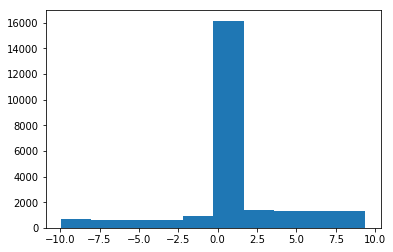

In [213]:
plt.hist(df["100"])

In [214]:
m = df["N_Answered"].quantile(0.9)
print(m)

100.0


In [215]:
df = df.drop(['N_Answered'], axis=1)

In [216]:
df.iloc[0].max()-df.iloc[0].min()

18.98

In [219]:
df.head()

1     2     3     4     5     6     7     8     9    10  ...     91  \
0 -7.82  8.79 -9.66 -8.16 -7.52 -8.50 -9.85  4.17 -8.98 -4.76  ...   2.82   
1  4.08 -0.29  6.36  4.37 -2.38 -9.66 -0.73 -5.34  8.88  9.22  ...   2.82   
2  0.00  0.00  0.00  0.00  9.03  9.27  9.03  9.27  0.00  0.00  ...   0.00   
3  0.00  8.35  0.00  0.00  1.80  8.16 -2.82  6.21  0.00  1.84  ...   0.00   
4  8.50  4.61 -4.17 -5.39  1.36  1.60  7.04  4.61 -0.44  5.73  ...   5.19   

     92    93    94    95    96    97    98    99   100  
0  0.00  0.00  0.00  0.00  0.00 -5.63  0.00  0.00  0.00  
1 -4.95 -0.29  7.86 -0.19 -2.14  3.06  0.34 -4.32  1.07  
2  0.00  0.00  9.08  0.00  0.00  0.00  0.00  0.00  0.00  
3  0.00  0.00  0.53  0.00  0.00  0.00  0.00  0.00  0.00  
4  5.58  4.27  5.19  5.73  1.55  3.11  6.55  1.80  1.60  

[5 rows x 100 columns]

## Finding the top 2 recommended jokes for each person

In [251]:
from collections import defaultdict

from surprise import SVD
from surprise import Dataset
from surprise.dataset import DatasetAutoFolds


def get_top_n(predictions, n=2):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


# First train an SVD algorithm on the movielens dataset.
data = Dataset.load_builtin('jester')
trainset = data.build_full_trainset()
algo = SVD()
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=2)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

1 ['140', '117']
2 ['125', '52']
3 ['114', '116']
4 ['117', '138']
5 ['138', '139']
6 ['69', '145']
7 ['114', '106']
8 ['127', '115']
9 ['105', '88']
10 ['122', '114']
11 ['129', '117']
12 ['126', '68']
13 ['143', '134']
14 ['72', '127']
15 ['105', '49']
16 ['142', '148']
17 ['40', '125']
18 ['143', '149']
19 ['117', '96']
22 ['127', '129']
23 ['117', '49']
24 ['87', '21']
25 ['127', '149']
26 ['104', '31']
27 ['29', '76']
28 ['27', '59']
29 ['22', '126']
33 ['132', '149']
34 ['105', '149']
35 ['129', '125']
37 ['125', '95']
38 ['91', '94']
39 ['143', '137']
40 ['44', '123']
41 ['105', '107']
42 ['129', '142']
43 ['84', '29']
44 ['114', '89']
45 ['107', '96']
46 ['116', '73']
47 ['70', '102']
48 ['88', '139']
49 ['105', '129']
50 ['144', '138']
51 ['135', '106']
52 ['143', '126']
53 ['114', '150']
54 ['111', '131']
55 ['55', '60']
56 ['143', '144']
57 ['114', '22']
58 ['90', '105']
59 ['143', '127']
60 ['27', '132']
61 ['127', '149']
62 ['22', '82']
63 ['127', '117']
64 ['126', '143']


682 ['150', '127']
683 ['92', '48']
684 ['72', '49']
685 ['62', '63']
686 ['21', '127']
687 ['87', '126']
688 ['150', '56']
689 ['69', '114']
690 ['68', '126']
691 ['143', '134']
692 ['114', '89']
693 ['132', '126']
694 ['132', '111']
695 ['105', '134']
696 ['77', '73']
697 ['132', '100']
698 ['26', '145']
699 ['80', '21']
700 ['126', '107']
702 ['149', '147']
705 ['108', '21']
707 ['118', '129']
709 ['68', '150']
710 ['47', '135']
711 ['68', '95']
712 ['129', '68']
713 ['145', '31']
714 ['43', '144']
715 ['100', '126']
716 ['26', '112']
717 ['120', '127']
718 ['107', '109']
719 ['105', '90']
720 ['73', '90']
729 ['94', '60']
730 ['135', '27']
731 ['66', '114']
732 ['71', '94']
733 ['117', '132']
734 ['71', '142']
736 ['22', '29']
737 ['115', '97']
738 ['129', '125']
739 ['21', '31']
741 ['119', '114']
742 ['132', '33']
743 ['80', '5']
744 ['21', '139']
745 ['31', '114']
746 ['53', '148']
747 ['114', '138']
749 ['127', '35']
750 ['53', '117']
751 ['68', '53']
752 ['42', '29']
753 ['80'

1236 ['125', '105']
1237 ['125', '114']
1238 ['132', '61']
1239 ['116', '100']
1240 ['100', '132']
1241 ['27', '80']
1242 ['27', '106']
1243 ['117', '72']
1244 ['90', '106']
1245 ['70', '103']
1246 ['105', '20']
1247 ['25', '27']
1248 ['88', '93']
1249 ['76', '109']
1250 ['21', '77']
1251 ['111', '61']
1252 ['17', '127']
1253 ['61', '45']
1254 ['125', '78']
1255 ['96', '68']
1256 ['114', '127']
1257 ['114', '38']
1258 ['80', '27']
1259 ['126', '49']
1260 ['118', '21']
1261 ['89', '36']
1262 ['31', '100']
1263 ['89', '127']
1264 ['129', '36']
1265 ['86', '27']
1266 ['72', '21']
1267 ['31', '53']
1268 ['108', '78']
1269 ['32', '78']
1270 ['27', '125']
1271 ['120', '83']
1272 ['96', '108']
1273 ['105', '36']
1275 ['80', '61']
1276 ['87', '117']
1277 ['5', '82']
1278 ['119', '89']
1279 ['115', '77']
1280 ['68', '117']
1281 ['114', '23']
1282 ['127', '114']
1283 ['27', '20']
1284 ['116', '80']
1285 ['125', '62']
1286 ['80', '52']
1287 ['55', '127']
1288 ['72', '87']
1289 ['145', '73']
1291 

1771 ['118', '88']
1772 ['107', '54']
1773 ['93', '119']
1774 ['126', '27']
1775 ['22', '105']
1776 ['20', '105']
1777 ['105', '129']
1778 ['20', '89']
1779 ['27', '80']
1780 ['27', '114']
1781 ['32', '89']
1782 ['127', '105']
1783 ['31', '113']
1784 ['27', '121']
1786 ['107', '96']
1787 ['27', '52']
1788 ['49', '62']
1789 ['110', '127']
1791 ['43', '89']
1792 ['5', '123']
1793 ['20', '116']
1794 ['61', '97']
1795 ['132', '114']
1796 ['22', '103']
1797 ['58', '40']
1798 ['20', '27']
1799 ['88', '50']
1800 ['49', '36']
1801 ['129', '49']
1802 ['42', '128']
1803 ['36', '94']
1804 ['31', '80']
1805 ['90', '106']
1806 ['31', '77']
1807 ['66', '106']
1808 ['5', '32']
1809 ['124', '144']
1810 ['138', '135']
1811 ['27', '118']
1812 ['67', '143']
1814 ['107', '59']
1815 ['61', '118']
1816 ['43', '139']
1817 ['5', '61']
1818 ['42', '143']
1819 ['27', '80']
1820 ['126', '43']
1821 ['82', '43']
1822 ['54', '148']
1823 ['120', '80']
1824 ['140', '97']
1825 ['145', '137']
1827 ['23', '90']
1828 ['7

2301 ['72', '27']
2302 ['38', '122']
2303 ['138', '117']
2305 ['53', '20']
2306 ['138', '119']
2307 ['68', '104']
2308 ['127', '115']
2309 ['61', '114']
2310 ['21', '31']
2311 ['135', '148']
2312 ['100', '37']
2313 ['53', '69']
2314 ['62', '72']
2315 ['134', '72']
2316 ['107', '50']
2317 ['100', '64']
2318 ['27', '80']
2319 ['106', '21']
2320 ['87', '76']
2321 ['73', '27']
2322 ['100', '27']
2324 ['69', '53']
2325 ['54', '88']
2326 ['53', '106']
2327 ['29', '57']
2328 ['133', '38']
2329 ['110', '104']
2330 ['35', '80']
2331 ['127', '106']
2332 ['80', '53']
2334 ['75', '77']
2335 ['117', '92']
2336 ['114', '119']
2337 ['94', '139']
2338 ['49', '118']
2339 ['119', '36']
2340 ['106', '118']
2341 ['114', '126']
2344 ['92', '40']
2345 ['61', '44']
2346 ['45', '106']
2348 ['89', '80']
2349 ['80', '119']
2350 ['88', '103']
2351 ['149', '126']
2352 ['89', '127']
2353 ['107', '96']
2354 ['100', '52']
2355 ['54', '139']
2357 ['131', '96']
2358 ['22', '61']
2359 ['82', '90']
2360 ['80', '73']
236

2852 ['27', '68']
2853 ['63', '100']
2854 ['49', '27']
2855 ['27', '52']
2856 ['100', '123']
2857 ['87', '53']
2858 ['65', '109']
2859 ['89', '114']
2860 ['5', '116']
2861 ['122', '27']
2862 ['23', '27']
2863 ['95', '38']
2864 ['53', '50']
2865 ['144', '31']
2866 ['27', '35']
2867 ['27', '119']
2868 ['27', '87']
2869 ['94', '100']
2870 ['70', '26']
2871 ['111', '129']
2872 ['22', '117']
2873 ['105', '84']
2874 ['83', '91']
2875 ['117', '68']
2876 ['118', '150']
2877 ['132', '127']
2878 ['62', '106']
2879 ['102', '113']
2880 ['31', '117']
2881 ['117', '144']
2882 ['114', '93']
2883 ['21', '100']
2884 ['130', '123']
2885 ['105', '62']
2887 ['126', '132']
2889 ['123', '80']
2890 ['119', '89']
2891 ['128', '35']
2892 ['89', '104']
2893 ['31', '27']
2894 ['37', '149']
2895 ['77', '67']
2896 ['20', '52']
2897 ['127', '36']
2898 ['68', '144']
2899 ['140', '118']
2902 ['25', '31']
2903 ['27', '31']
2904 ['38', '93']
2905 ['133', '24']
2906 ['50', '130']
2907 ['127', '116']
2908 ['46', '102']
2

3436 ['70', '115']
3438 ['104', '70']
3439 ['62', '68']
3440 ['43', '36']
3441 ['126', '52']
3442 ['126', '27']
3443 ['89', '32']
3444 ['31', '29']
3445 ['126', '117']
3446 ['23', '104']
3447 ['49', '143']
3448 ['117', '126']
3449 ['133', '5']
3450 ['91', '140']
3451 ['132', '32']
3452 ['91', '58']
3453 ['127', '106']
3454 ['126', '27']
3455 ['135', '35']
3456 ['86', '82']
3457 ['70', '116']
3459 ['124', '130']
3460 ['114', '100']
3461 ['27', '126']
3462 ['117', '76']
3463 ['135', '89']
3464 ['106', '118']
3465 ['35', '145']
3466 ['100', '86']
3467 ['117', '89']
3468 ['52', '20']
3469 ['110', '35']
3470 ['72', '114']
3472 ['138', '149']
3473 ['132', '105']
3474 ['107', '32']
3475 ['89', '105']
3476 ['35', '126']
3477 ['84', '125']
3478 ['145', '117']
3479 ['87', '148']
3480 ['91', '54']
3481 ['105', '35']
3482 ['117', '126']
3483 ['139', '78']
3484 ['106', '71']
3486 ['27', '132']
3487 ['114', '53']
3488 ['65', '127']
3489 ['97', '89']
3490 ['59', '66']
3491 ['29', '27']
3492 ['23', '1

3990 ['106', '149']
3991 ['127', '106']
3992 ['46', '89']
3993 ['35', '129']
3994 ['120', '145']
3995 ['127', '68']
3996 ['127', '129']
3998 ['53', '29']
3999 ['126', '72']
4000 ['72', '31']
4001 ['104', '45']
4002 ['110', '102']
4003 ['109', '45']
4006 ['80', '73']
4007 ['88', '129']
4008 ['129', '118']
4009 ['27', '5']
4010 ['77', '145']
4011 ['122', '95']
4013 ['49', '31']
4014 ['114', '119']
4016 ['21', '125']
4017 ['117', '69']
4018 ['21', '104']
4020 ['139', '77']
4021 ['49', '48']
4022 ['5', '27']
4023 ['129', '126']
4024 ['90', '86']
4025 ['27', '100']
4026 ['126', '127']
4027 ['87', '126']
4028 ['89', '90']
4029 ['60', '133']
4030 ['27', '61']
4032 ['31', '49']
4033 ['129', '35']
4035 ['106', '89']
4037 ['49', '126']
4038 ['85', '103']
4039 ['129', '53']
4040 ['100', '87']
4041 ['126', '35']
4044 ['69', '117']
4045 ['116', '49']
4046 ['21', '31']
4047 ['27', '100']
4048 ['119', '100']
4049 ['114', '126']
4051 ['125', '114']
4053 ['129', '68']
4054 ['138', '139']
4055 ['35', '2

4542 ['35', '94']
4543 ['128', '114']
4544 ['117', '36']
4545 ['78', '21']
4546 ['105', '121']
4547 ['121', '80']
4549 ['111', '116']
4550 ['127', '78']
4551 ['126', '129']
4552 ['138', '53']
4553 ['51', '82']
4555 ['142', '35']
4556 ['68', '66']
4557 ['35', '114']
4558 ['50', '89']
4559 ['80', '73']
4560 ['114', '5']
4561 ['126', '35']
4562 ['112', '143']
4563 ['126', '89']
4564 ['125', '88']
4565 ['53', '104']
4566 ['47', '73']
4567 ['20', '58']
4568 ['139', '106']
4569 ['129', '89']
4570 ['31', '27']
4571 ['135', '48']
4572 ['26', '23']
4573 ['117', '126']
4574 ['129', '126']
4575 ['117', '126']
4576 ['100', '27']
4577 ['129', '39']
4578 ['139', '106']
4579 ['111', '69']
4580 ['68', '117']
4581 ['111', '50']
4582 ['73', '103']
4583 ['73', '43']
4584 ['80', '27']
4585 ['53', '106']
4586 ['118', '133']
4587 ['139', '125']
4588 ['53', '129']
4590 ['120', '83']
4591 ['106', '88']
4592 ['27', '114']
4593 ['138', '106']
4594 ['35', '126']
4595 ['126', '129']
4596 ['126', '145']
4597 ['31'

5099 ['69', '117']
5100 ['80', '117']
5102 ['106', '107']
5103 ['21', '87']
5104 ['126', '72']
5105 ['129', '80']
5106 ['31', '80']
5107 ['94', '19']
5108 ['117', '106']
5109 ['31', '36']
5110 ['129', '112']
5113 ['107', '91']
5114 ['27', '131']
5116 ['118', '139']
5117 ['32', '106']
5118 ['121', '126']
5119 ['104', '111']
5120 ['31', '53']
5121 ['129', '31']
5122 ['139', '27']
5123 ['106', '127']
5124 ['100', '127']
5125 ['100', '144']
5126 ['105', '106']
5127 ['31', '69']
5128 ['87', '78']
5129 ['133', '23']
5130 ['114', '82']
5131 ['27', '100']
5132 ['52', '82']
5133 ['80', '102']
5134 ['127', '132']
5135 ['106', '118']
5136 ['144', '127']
5137 ['125', '117']
5138 ['105', '35']
5139 ['27', '51']
5140 ['118', '67']
5141 ['80', '39']
5142 ['106', '139']
5143 ['126', '117']
5144 ['114', '93']
5145 ['35', '144']
5146 ['135', '113']
5147 ['53', '129']
5148 ['139', '80']
5149 ['117', '31']
5150 ['25', '128']
5151 ['129', '126']
5152 ['128', '129']
5153 ['27', '80']
5154 ['126', '49']
5156

5663 ['106', '77']
5664 ['120', '31']
5665 ['25', '31']
5666 ['89', '49']
5667 ['78', '106']
5669 ['27', '31']
5670 ['127', '72']
5671 ['107', '119']
5672 ['105', '35']
5673 ['32', '80']
5674 ['122', '32']
5675 ['126', '100']
5676 ['106', '64']
5677 ['127', '129']
5678 ['73', '61']
5679 ['35', '105']
5680 ['25', '27']
5681 ['61', '43']
5682 ['80', '114']
5684 ['105', '62']
5685 ['126', '129']
5686 ['80', '31']
5687 ['27', '50']
5690 ['36', '68']
5692 ['127', '116']
5693 ['141', '95']
5694 ['116', '102']
5695 ['106', '56']
5697 ['62', '28']
5699 ['72', '117']
5701 ['118', '115']
5702 ['5', '27']
5703 ['82', '114']
5704 ['97', '32']
5707 ['20', '116']
5708 ['100', '126']
5709 ['19', '94']
5710 ['92', '118']
5711 ['145', '100']
5712 ['53', '121']
5713 ['126', '117']
5714 ['126', '149']
5716 ['126', '22']
5717 ['89', '83']
5718 ['27', '85']
5719 ['126', '129']
5720 ['27', '72']
5721 ['47', '116']
5722 ['27', '116']
5723 ['127', '21']
5724 ['118', '108']
5725 ['93', '56']
5726 ['126', '37']

6193 ['100', '52']
6194 ['132', '119']
6195 ['5', '122']
6196 ['94', '90']
6198 ['128', '114']
6199 ['124', '5']
6200 ['22', '55']
6201 ['52', '55']
6202 ['149', '73']
6203 ['90', '122']
6204 ['44', '5']
6205 ['52', '70']
6206 ['118', '89']
6207 ['27', '31']
6208 ['119', '27']
6209 ['135', '57']
6210 ['19', '106']
6211 ['126', '117']
6212 ['125', '86']
6213 ['87', '27']
6214 ['100', '62']
6215 ['144', '127']
6216 ['45', '117']
6217 ['129', '42']
6218 ['149', '108']
6219 ['19', '106']
6220 ['97', '88']
6221 ['27', '97']
6222 ['91', '32']
6223 ['118', '5']
6224 ['32', '114']
6225 ['106', '89']
6226 ['114', '50']
6227 ['26', '5']
6228 ['53', '50']
6230 ['89', '78']
6231 ['131', '146']
6232 ['126', '27']
6233 ['47', '117']
6234 ['27', '31']
6235 ['61', '37']
6236 ['126', '110']
6237 ['117', '116']
6238 ['63', '32']
6239 ['36', '86']
6240 ['73', '27']
6241 ['129', '42']
6242 ['100', '22']
6243 ['31', '76']
6244 ['90', '64']
6245 ['100', '69']
6247 ['114', '89']
6249 ['119', '114']
6251 ['36

6748 ['114', '105']
6749 ['31', '61']
6750 ['27', '50']
6751 ['69', '83']
6752 ['144', '72']
6753 ['127', '50']
6754 ['98', '117']
6755 ['80', '31']
6756 ['64', '53']
6757 ['127', '46']
6758 ['105', '122']
6759 ['125', '26']
6760 ['91', '107']
6761 ['72', '132']
6762 ['129', '117']
6763 ['27', '29']
6764 ['52', '45']
6765 ['100', '61']
6766 ['27', '129']
6767 ['76', '69']
6768 ['34', '56']
6769 ['124', '44']
6770 ['100', '50']
6771 ['118', '53']
6772 ['38', '97']
6773 ['27', '126']
6774 ['138', '116']
6775 ['50', '72']
6776 ['72', '138']
6777 ['114', '62']
6778 ['127', '72']
6779 ['126', '27']
6780 ['27', '126']
6782 ['75', '89']
6783 ['69', '80']
6784 ['118', '48']
6785 ['126', '127']
6786 ['100', '49']
6788 ['94', '122']
6790 ['27', '50']
6791 ['72', '126']
6792 ['62', '114']
6793 ['31', '127']
6794 ['79', '128']
6795 ['52', '51']
6796 ['126', '97']
6797 ['114', '68']
6799 ['27', '47']
6800 ['38', '84']
6801 ['129', '92']
6802 ['27', '100']
6803 ['76', '104']
6805 ['35', '120']
6807 

7309 ['104', '80']
7310 ['126', '114']
7311 ['32', '88']
7312 ['106', '118']
7313 ['68', '32']
7314 ['126', '27']
7315 ['46', '21']
7316 ['126', '50']
7317 ['144', '23']
7318 ['53', '35']
7319 ['94', '64']
7320 ['112', '125']
7321 ['117', '104']
7322 ['62', '52']
7323 ['35', '25']
7324 ['32', '114']
7325 ['104', '80']
7326 ['45', '150']
7327 ['129', '117']
7328 ['105', '132']
7330 ['108', '126']
7331 ['93', '127']
7332 ['35', '50']
7333 ['66', '100']
7334 ['129', '126']
7335 ['119', '64']
7336 ['49', '127']
7337 ['89', '114']
7338 ['69', '127']
7339 ['27', '106']
7340 ['27', '118']
7341 ['117', '89']
7342 ['118', '100']
7343 ['28', '127']
7344 ['27', '114']
7345 ['127', '116']
7346 ['139', '143']
7347 ['117', '69']
7348 ['129', '126']
7349 ['29', '117']
7350 ['69', '149']
7351 ['19', '106']
7352 ['106', '80']
7353 ['118', '143']
7354 ['27', '114']
7355 ['89', '50']
7358 ['23', '106']
7359 ['111', '66']
7360 ['27', '35']
7361 ['35', '63']
7362 ['71', '127']
7363 ['92', '102']
7365 ['89'

7859 ['106', '89']
7860 ['69', '143']
7864 ['53', '134']
7865 ['27', '129']
7866 ['117', '69']
7867 ['97', '43']
7868 ['100', '50']
7869 ['126', '22']
7870 ['125', '132']
7871 ['80', '138']
7872 ['129', '142']
7873 ['114', '63']
7874 ['25', '29']
7875 ['25', '61']
7876 ['27', '126']
7877 ['128', '143']
7878 ['50', '41']
7879 ['89', '129']
7880 ['29', '67']
7881 ['143', '72']
7882 ['80', '116']
7883 ['125', '54']
7884 ['27', '128']
7886 ['53', '89']
7887 ['132', '114']
7888 ['112', '61']
7889 ['29', '64']
7890 ['104', '36']
7891 ['48', '97']
7892 ['62', '45']
7893 ['27', '112']
7894 ['138', '107']
7895 ['27', '117']
7896 ['69', '72']
7897 ['110', '84']
7898 ['49', '104']
7899 ['40', '137']
7900 ['68', '117']
7901 ['80', '110']
7902 ['45', '31']
7903 ['104', '31']
7904 ['49', '126']
7905 ['63', '62']
7906 ['114', '35']
7907 ['27', '117']
7908 ['53', '27']
7909 ['49', '110']
7910 ['91', '27']
7911 ['104', '73']
7912 ['89', '114']
7913 ['63', '104']
7914 ['117', '31']
7915 ['36', '132']
79

8420 ['117', '126']
8422 ['76', '31']
8423 ['62', '127']
8424 ['121', '21']
8426 ['77', '21']
8427 ['126', '117']
8428 ['72', '128']
8429 ['53', '26']
8430 ['105', '38']
8431 ['126', '127']
8432 ['55', '98']
8433 ['27', '53']
8434 ['89', '104']
8435 ['129', '119']
8436 ['91', '19']
8437 ['126', '72']
8438 ['126', '29']
8439 ['69', '68']
8440 ['72', '68']
8441 ['27', '45']
8442 ['31', '89']
8443 ['118', '31']
8444 ['27', '147']
8445 ['133', '19']
8447 ['104', '110']
8448 ['114', '127']
8450 ['82', '117']
8451 ['75', '127']
8452 ['50', '35']
8453 ['126', '61']
8454 ['82', '38']
8455 ['31', '86']
8456 ['27', '68']
8457 ['87', '138']
8458 ['82', '127']
8459 ['145', '138']
8460 ['80', '69']
8461 ['73', '90']
8462 ['72', '28']
8463 ['32', '88']
8464 ['53', '36']
8465 ['35', '76']
8466 ['27', '35']
8467 ['118', '35']
8468 ['138', '93']
8469 ['27', '118']
8470 ['127', '89']
8471 ['110', '78']
8472 ['5', '43']
8474 ['85', '95']
8475 ['27', '108']
8477 ['27', '126']
8480 ['129', '126']
8481 ['43

8980 ['110', '107']
8981 ['25', '78']
8983 ['89', '32']
8984 ['27', '130']
8985 ['27', '77']
8986 ['53', '119']
8987 ['132', '121']
8989 ['78', '50']
8990 ['53', '129']
8991 ['105', '35']
8992 ['129', '91']
8993 ['35', '27']
8994 ['68', '62']
8995 ['114', '29']
8996 ['68', '49']
8997 ['52', '27']
8998 ['72', '69']
9000 ['35', '38']
9001 ['35', '72']
9002 ['116', '127']
9003 ['66', '49']
9004 ['118', '92']
9005 ['35', '61']
9006 ['129', '53']
9009 ['148', '50']
9010 ['119', '149']
9011 ['5', '57']
9012 ['25', '43']
9013 ['50', '53']
9014 ['5', '139']
9015 ['112', '105']
9016 ['21', '53']
9017 ['23', '22']
9018 ['148', '56']
9019 ['119', '48']
9020 ['109', '27']
9021 ['27', '56']
9022 ['109', '110']
9023 ['76', '133']
9024 ['58', '124']
9025 ['138', '132']
9026 ['31', '27']
9027 ['117', '108']
9028 ['60', '26']
9029 ['145', '110']
9030 ['72', '148']
9031 ['27', '121']
9032 ['88', '91']
9033 ['31', '61']
9034 ['150', '117']
9035 ['28', '126']
9036 ['118', '145']
9037 ['150', '22']
9038 ['

9524 ['27', '62']
9525 ['96', '110']
9526 ['129', '132']
9527 ['62', '49']
9528 ['31', '116']
9529 ['45', '116']
9530 ['73', '80']
9531 ['106', '89']
9532 ['53', '126']
9533 ['117', '127']
9534 ['32', '89']
9535 ['126', '105']
9536 ['138', '91']
9537 ['127', '150']
9538 ['129', '72']
9539 ['104', '35']
9540 ['53', '148']
9541 ['77', '129']
9542 ['27', '114']
9545 ['126', '72']
9546 ['32', '132']
9547 ['127', '143']
9548 ['129', '32']
9549 ['125', '87']
9550 ['97', '82']
9551 ['27', '69']
9552 ['80', '31']
9553 ['78', '89']
9554 ['116', '117']
9555 ['69', '108']
9556 ['127', '117']
9557 ['114', '106']
9559 ['89', '77']
9560 ['112', '23']
9561 ['68', '89']
9562 ['29', '127']
9563 ['95', '127']
9564 ['104', '127']
9565 ['80', '50']
9567 ['106', '88']
9568 ['26', '108']
9570 ['50', '96']
9571 ['129', '105']
9572 ['129', '149']
9573 ['52', '20']
9574 ['88', '23']
9575 ['27', '91']
9576 ['133', '117']
9578 ['73', '116']
9579 ['24', '33']
9580 ['127', '76']
9581 ['35', '27']
9582 ['120', '122

10080 ['145', '138']
10081 ['27', '89']
10082 ['49', '111']
10083 ['27', '100']
10084 ['19', '32']
10085 ['32', '23']
10086 ['106', '89']
10087 ['126', '129']
10089 ['138', '72']
10090 ['118', '53']
10091 ['35', '27']
10092 ['126', '47']
10093 ['106', '78']
10094 ['109', '47']
10095 ['150', '97']
10096 ['27', '61']
10097 ['118', '119']
10098 ['53', '45']
10099 ['72', '127']
10100 ['129', '126']
10101 ['29', '143']
10102 ['150', '32']
10104 ['116', '117']
10105 ['27', '129']
10106 ['116', '133']
10107 ['114', '128']
10108 ['73', '31']
10109 ['53', '105']
10110 ['116', '61']
10111 ['114', '62']
10112 ['43', '133']
10113 ['27', '105']
10114 ['110', '36']
10115 ['116', '96']
10116 ['126', '117']
10117 ['32', '126']
10118 ['103', '90']
10119 ['100', '114']
10120 ['76', '106']
10121 ['114', '68']
10122 ['22', '52']
10123 ['150', '83']
10124 ['122', '53']
10125 ['35', '43']
10126 ['150', '68']
10127 ['27', '126']
10128 ['132', '105']
10129 ['103', '80']
10132 ['5', '91']
10133 ['20', '43']
10

10608 ['27', '127']
10609 ['135', '35']
10610 ['114', '60']
10611 ['91', '105']
10612 ['108', '53']
10613 ['31', '27']
10614 ['19', '66']
10615 ['32', '97']
10616 ['119', '132']
10617 ['35', '62']
10618 ['96', '36']
10619 ['100', '52']
10620 ['76', '126']
10622 ['96', '48']
10623 ['114', '89']
10624 ['72', '80']
10625 ['105', '117']
10626 ['114', '97']
10627 ['63', '53']
10628 ['118', '97']
10629 ['129', '80']
10630 ['21', '117']
10631 ['132', '127']
10633 ['65', '64']
10634 ['70', '64']
10635 ['35', '27']
10636 ['89', '117']
10637 ['35', '32']
10638 ['114', '116']
10639 ['26', '49']
10640 ['29', '50']
10642 ['50', '107']
10643 ['49', '127']
10644 ['126', '106']
10645 ['89', '35']
10646 ['26', '132']
10647 ['89', '72']
10648 ['124', '23']
10650 ['127', '114']
10651 ['117', '150']
10652 ['121', '114']
10653 ['138', '106']
10655 ['145', '114']
10656 ['23', '60']
10657 ['19', '106']
10658 ['60', '99']
10660 ['114', '89']
10661 ['106', '127']
10662 ['129', '80']
10663 ['27', '126']
10664 [

11144 ['105', '27']
11145 ['127', '129']
11146 ['27', '80']
11147 ['89', '88']
11148 ['89', '47']
11149 ['27', '29']
11150 ['89', '72']
11151 ['38', '62']
11152 ['126', '27']
11153 ['70', '43']
11154 ['117', '76']
11155 ['47', '127']
11156 ['27', '47']
11157 ['27', '53']
11158 ['27', '89']
11159 ['109', '135']
11160 ['72', '47']
11161 ['119', '118']
11162 ['129', '29']
11164 ['89', '111']
11165 ['19', '53']
11166 ['117', '116']
11167 ['27', '72']
11168 ['27', '127']
11169 ['27', '119']
11170 ['102', '137']
11173 ['68', '49']
11174 ['127', '46']
11175 ['148', '72']
11176 ['31', '52']
11177 ['27', '114']
11178 ['91', '68']
11179 ['138', '27']
11180 ['31', '76']
11182 ['35', '62']
11183 ['50', '81']
11184 ['52', '116']
11185 ['89', '97']
11187 ['27', '129']
11188 ['120', '78']
11189 ['114', '105']
11190 ['72', '76']
11191 ['91', '32']
11192 ['132', '72']
11193 ['80', '128']
11194 ['117', '29']
11195 ['126', '121']
11196 ['31', '114']
11197 ['132', '119']
11198 ['131', '109']
11199 ['128',

11681 ['138', '46']
11682 ['130', '119']
11683 ['127', '125']
11684 ['138', '89']
11685 ['29', '51']
11686 ['110', '82']
11687 ['139', '91']
11688 ['139', '89']
11689 ['78', '39']
11690 ['5', '86']
11691 ['116', '31']
11692 ['55', '91']
11693 ['19', '91']
11694 ['35', '97']
11695 ['22', '127']
11696 ['91', '114']
11697 ['35', '63']
11698 ['76', '117']
11699 ['28', '145']
11700 ['119', '35']
11701 ['104', '78']
11702 ['63', '50']
11703 ['116', '27']
11704 ['126', '116']
11705 ['92', '150']
11707 ['22', '23']
11708 ['20', '37']
11709 ['128', '31']
11710 ['120', '109']
11711 ['128', '104']
11712 ['129', '117']
11713 ['114', '27']
11714 ['27', '25']
11715 ['28', '90']
11716 ['120', '104']
11717 ['129', '27']
11718 ['114', '61']
11719 ['49', '104']
11720 ['43', '52']
11721 ['23', '49']
11722 ['108', '35']
11723 ['49', '68']
11724 ['72', '50']
11725 ['39', '116']
11726 ['29', '53']
11727 ['91', '88']
11728 ['116', '20']
11729 ['114', '68']
11730 ['27', '129']
11731 ['57', '71']
11732 ['132',

12207 ['90', '43']
12208 ['142', '60']
12209 ['114', '105']
12210 ['116', '121']
12211 ['117', '126']
12212 ['19', '18']
12213 ['100', '86']
12214 ['31', '116']
12215 ['88', '27']
12216 ['89', '127']
12217 ['19', '94']
12219 ['91', '141']
12220 ['111', '112']
12221 ['135', '53']
12222 ['114', '50']
12223 ['70', '127']
12224 ['125', '68']
12225 ['110', '94']
12226 ['127', '56']
12227 ['116', '100']
12228 ['63', '145']
12229 ['23', '112']
12230 ['52', '36']
12231 ['75', '39']
12232 ['76', '126']
12233 ['69', '63']
12234 ['27', '126']
12235 ['86', '133']
12236 ['127', '62']
12238 ['80', '5']
12239 ['19', '106']
12240 ['129', '76']
12241 ['105', '143']
12242 ['129', '53']
12243 ['114', '27']
12244 ['70', '52']
12245 ['121', '116']
12246 ['138', '105']
12247 ['27', '29']
12248 ['50', '137']
12249 ['35', '108']
12250 ['29', '126']
12251 ['32', '50']
12253 ['19', '106']
12254 ['134', '73']
12255 ['21', '127']
12256 ['150', '61']
12257 ['56', '138']
12258 ['149', '117']
12260 ['145', '97']
122

12737 ['72', '36']
12738 ['35', '89']
12739 ['80', '82']
12740 ['27', '31']
12741 ['82', '92']
12742 ['76', '117']
12743 ['100', '43']
12744 ['27', '35']
12745 ['105', '62']
12746 ['50', '110']
12747 ['27', '105']
12748 ['118', '72']
12749 ['19', '110']
12750 ['104', '134']
12751 ['35', '117']
12752 ['47', '50']
12754 ['64', '105']
12755 ['117', '126']
12756 ['29', '105']
12757 ['104', '60']
12758 ['89', '127']
12759 ['127', '114']
12760 ['27', '64']
12761 ['50', '56']
12762 ['105', '35']
12763 ['127', '116']
12764 ['46', '144']
12765 ['122', '40']
12766 ['125', '94']
12767 ['113', '35']
12768 ['89', '126']
12769 ['27', '72']
12770 ['80', '69']
12771 ['19', '106']
12772 ['80', '84']
12773 ['48', '45']
12774 ['148', '129']
12775 ['47', '116']
12776 ['143', '118']
12777 ['89', '106']
12778 ['127', '138']
12779 ['132', '126']
12780 ['93', '106']
12781 ['19', '114']
12782 ['133', '105']
12783 ['97', '134']
12784 ['132', '114']
12785 ['27', '129']
12787 ['133', '77']
12789 ['35', '143']
127

13272 ['19', '38']
13273 ['60', '89']
13275 ['53', '68']
13276 ['19', '68']
13277 ['29', '126']
13278 ['89', '150']
13279 ['31', '100']
13280 ['116', '107']
13281 ['72', '97']
13282 ['29', '104']
13283 ['133', '111']
13284 ['126', '49']
13285 ['23', '114']
13286 ['150', '64']
13287 ['89', '111']
13288 ['127', '68']
13289 ['60', '64']
13290 ['53', '68']
13291 ['104', '144']
13292 ['31', '27']
13293 ['105', '126']
13294 ['32', '60']
13295 ['72', '129']
13296 ['86', '125']
13297 ['116', '50']
13298 ['113', '86']
13299 ['19', '96']
13300 ['46', '31']
13301 ['31', '27']
13303 ['33', '139']
13304 ['127', '22']
13305 ['129', '117']
13306 ['35', '29']
13307 ['117', '129']
13308 ['31', '100']
13309 ['129', '117']
13310 ['47', '128']
13311 ['96', '56']
13312 ['126', '53']
13313 ['119', '108']
13314 ['129', '118']
13315 ['5', '43']
13316 ['138', '27']
13318 ['122', '29']
13319 ['32', '91']
13320 ['91', '143']
13321 ['133', '38']
13322 ['125', '128']
13323 ['68', '56']
13324 ['66', '27']
13325 ['1

13810 ['89', '35']
13811 ['116', '39']
13813 ['35', '91']
13814 ['90', '145']
13815 ['125', '31']
13816 ['112', '118']
13817 ['19', '38']
13818 ['28', '143']
13819 ['32', '91']
13820 ['126', '72']
13821 ['73', '96']
13822 ['27', '107']
13823 ['35', '119']
13824 ['127', '118']
13825 ['127', '72']
13826 ['19', '68']
13827 ['138', '108']
13828 ['129', '119']
13830 ['55', '112']
13831 ['130', '89']
13832 ['48', '114']
13833 ['27', '104']
13834 ['69', '72']
13835 ['72', '107']
13837 ['125', '63']
13838 ['5', '27']
13839 ['110', '108']
13840 ['5', '31']
13841 ['72', '39']
13842 ['27', '36']
13843 ['116', '127']
13844 ['43', '75']
13845 ['144', '62']
13846 ['91', '27']
13848 ['43', '27']
13849 ['105', '145']
13850 ['130', '51']
13851 ['27', '129']
13852 ['127', '69']
13853 ['27', '50']
13854 ['61', '20']
13855 ['27', '28']
13856 ['78', '96']
13857 ['138', '93']
13858 ['108', '76']
13859 ['127', '116']
13861 ['79', '39']
13862 ['91', '80']
13863 ['143', '77']
13864 ['20', '144']
13865 ['114', 

14348 ['61', '116']
14349 ['25', '135']
14350 ['114', '68']
14351 ['91', '114']
14355 ['102', '36']
14356 ['119', '93']
14357 ['100', '101']
14358 ['125', '81']
14359 ['69', '50']
14360 ['97', '114']
14361 ['27', '61']
14362 ['114', '68']
14363 ['100', '52']
14364 ['89', '97']
14365 ['126', '27']
14366 ['35', '29']
14367 ['23', '110']
14368 ['71', '47']
14369 ['93', '68']
14370 ['125', '97']
14371 ['62', '144']
14372 ['78', '113']
14373 ['105', '91']
14374 ['116', '127']
14375 ['52', '117']
14376 ['22', '82']
14377 ['46', '96']
14378 ['117', '104']
14379 ['32', '114']
14380 ['118', '97']
14381 ['47', '117']
14382 ['123', '108']
14383 ['64', '53']
14384 ['89', '53']
14385 ['127', '126']
14386 ['59', '46']
14387 ['126', '72']
14388 ['19', '89']
14389 ['27', '100']
14390 ['127', '70']
14391 ['83', '39']
14392 ['105', '129']
14393 ['91', '106']
14394 ['114', '60']
14395 ['71', '89']
14396 ['138', '117']
14397 ['80', '38']
14398 ['117', '108']
14399 ['27', '62']
14400 ['31', '127']
14401 ['

14911 ['150', '27']
14912 ['100', '26']
14913 ['63', '114']
14914 ['63', '32']
14915 ['35', '111']
14916 ['68', '127']
14917 ['105', '89']
14918 ['22', '76']
14919 ['19', '38']
14920 ['27', '80']
14921 ['26', '24']
14922 ['138', '72']
14924 ['91', '19']
14925 ['120', '128']
14926 ['50', '27']
14927 ['129', '72']
14928 ['138', '35']
14929 ['94', '65']
14930 ['92', '70']
14931 ['97', '145']
14932 ['19', '127']
14933 ['60', '144']
14934 ['20', '105']
14935 ['52', '27']
14936 ['19', '110']
14938 ['27', '35']
14939 ['38', '89']
14940 ['43', '20']
14941 ['38', '114']
14942 ['68', '114']
14943 ['19', '64']
14944 ['31', '61']
14946 ['116', '39']
14947 ['113', '133']
14948 ['105', '27']
14949 ['105', '32']
14950 ['82', '20']
14951 ['127', '21']
14952 ['20', '31']
14953 ['89', '68']
14954 ['110', '68']
14955 ['127', '125']
14957 ['51', '100']
14958 ['117', '127']
14959 ['53', '66']
14960 ['90', '71']
14961 ['80', '61']
14962 ['48', '73']
14963 ['37', '43']
14965 ['125', '89']
14966 ['72', '133']

15473 ['93', '49']
15474 ['80', '73']
15475 ['100', '98']
15477 ['19', '89']
15478 ['27', '51']
15479 ['26', '50']
15480 ['27', '116']
15481 ['127', '39']
15482 ['31', '53']
15483 ['129', '93']
15484 ['132', '80']
15485 ['104', '127']
15486 ['138', '116']
15487 ['43', '80']
15488 ['100', '132']
15489 ['19', '114']
15490 ['60', '110']
15491 ['88', '19']
15492 ['116', '51']
15493 ['89', '68']
15494 ['89', '105']
15495 ['127', '150']
15496 ['19', '114']
15497 ['127', '110']
15498 ['138', '39']
15499 ['70', '38']
15500 ['21', '125']
15501 ['83', '52']
15502 ['125', '49']
15503 ['116', '39']
15504 ['46', '127']
15505 ['106', '39']
15506 ['53', '111']
15507 ['73', '20']
15508 ['108', '72']
15509 ['89', '145']
15510 ['52', '43']
15511 ['63', '107']
15512 ['62', '92']
15513 ['100', '98']
15514 ['45', '27']
15515 ['35', '69']
15516 ['80', '113']
15517 ['19', '27']
15518 ['76', '66']
15519 ['132', '59']
15521 ['35', '69']
15522 ['19', '50']
15523 ['27', '72']
15524 ['38', '56']
15525 ['117', '11

16025 ['87', '27']
16027 ['97', '149']
16028 ['32', '53']
16029 ['27', '57']
16030 ['80', '117']
16031 ['60', '29']
16032 ['129', '116']
16033 ['104', '65']
16034 ['89', '21']
16035 ['76', '91']
16036 ['125', '26']
16037 ['105', '47']
16038 ['129', '35']
16040 ['19', '114']
16042 ['87', '38']
16043 ['116', '100']
16044 ['124', '64']
16045 ['116', '141']
16046 ['103', '44']
16047 ['109', '92']
16048 ['27', '32']
16049 ['19', '32']
16051 ['92', '48']
16052 ['138', '116']
16054 ['101', '125']
16055 ['5', '60']
16056 ['43', '31']
16057 ['27', '35']
16058 ['143', '83']
16059 ['46', '53']
16060 ['117', '76']
16061 ['108', '129']
16062 ['117', '127']
16063 ['85', '138']
16065 ['27', '135']
16066 ['19', '68']
16067 ['48', '110']
16068 ['22', '91']
16069 ['143', '121']
16070 ['19', '47']
16071 ['32', '99']
16073 ['68', '38']
16074 ['127', '97']
16075 ['28', '147']
16076 ['108', '97']
16077 ['63', '129']
16078 ['129', '27']
16079 ['27', '105']
16080 ['129', '148']
16081 ['70', '82']
16082 ['73',

16620 ['31', '39']
16621 ['116', '31']
16622 ['125', '100']
16623 ['138', '43']
16626 ['105', '126']
16627 ['117', '134']
16628 ['149', '50']
16629 ['89', '114']
16630 ['27', '121']
16631 ['127', '98']
16632 ['32', '143']
16633 ['93', '40']
16635 ['64', '41']
16636 ['127', '117']
16637 ['129', '108']
16638 ['125', '49']
16639 ['27', '31']
16640 ['19', '60']
16641 ['5', '116']
16642 ['80', '110']
16643 ['29', '105']
16644 ['83', '33']
16645 ['50', '132']
16646 ['116', '93']
16647 ['41', '47']
16648 ['150', '117']
16650 ['89', '106']
16651 ['31', '100']
16652 ['125', '31']
16653 ['150', '111']
16655 ['62', '105']
16656 ['62', '48']
16657 ['65', '113']
16658 ['26', '48']
16660 ['86', '94']
16661 ['88', '50']
16662 ['116', '61']
16663 ['135', '57']
16664 ['83', '116']
16665 ['125', '21']
16666 ['32', '129']
16667 ['32', '27']
16668 ['116', '31']
16669 ['72', '92']
16670 ['19', '53']
16671 ['27', '111']
16672 ['105', '148']
16673 ['35', '138']
16674 ['138', '53']
16675 ['100', '52']
16676 [

17166 ['98', '81']
17168 ['84', '38']
17169 ['31', '61']
17170 ['108', '129']
17171 ['125', '46']
17172 ['69', '96']
17173 ['61', '36']
17174 ['27', '105']
17175 ['27', '35']
17176 ['27', '126']
17177 ['84', '96']
17178 ['122', '65']
17179 ['84', '38']
17180 ['43', '53']
17181 ['27', '5']
17182 ['125', '53']
17183 ['105', '27']
17184 ['97', '80']
17185 ['110', '84']
17186 ['60', '57']
17187 ['141', '5']
17188 ['132', '84']
17189 ['27', '73']
17190 ['89', '23']
17191 ['45', '54']
17192 ['68', '35']
17193 ['27', '100']
17194 ['50', '113']
17195 ['53', '113']
17196 ['114', '69']
17197 ['92', '66']
17198 ['43', '53']
17199 ['27', '31']
17200 ['73', '27']
17201 ['54', '25']
17202 ['31', '73']
17203 ['53', '106']
17204 ['89', '114']
17205 ['53', '38']
17206 ['27', '127']
17207 ['50', '89']
17208 ['34', '113']
17209 ['21', '148']
17210 ['105', '27']
17211 ['61', '105']
17212 ['129', '53']
17213 ['42', '109']
17214 ['110', '27']
17215 ['50', '120']
17216 ['117', '127']
17217 ['80', '27']
17218

17674 ['105', '137']
17675 ['38', '100']
17676 ['69', '87']
17677 ['50', '78']
17678 ['65', '61']
17679 ['27', '129']
17680 ['68', '96']
17681 ['128', '117']
17682 ['63', '102']
17683 ['27', '63']
17684 ['36', '31']
17685 ['109', '33']
17686 ['105', '21']
17687 ['54', '81']
17688 ['50', '27']
17689 ['125', '107']
17690 ['50', '89']
17691 ['129', '110']
17692 ['57', '47']
17693 ['91', '56']
17694 ['112', '38']
17695 ['129', '135']
17696 ['72', '53']
17698 ['27', '105']
17699 ['27', '108']
17700 ['53', '114']
17702 ['27', '110']
17703 ['126', '61']
17704 ['72', '69']
17705 ['27', '36']
17706 ['135', '63']
17707 ['55', '24']
17708 ['127', '134']
17709 ['48', '49']
17710 ['101', '55']
17711 ['117', '127']
17712 ['97', '64']
17713 ['133', '117']
17714 ['26', '97']
17715 ['99', '27']
17716 ['27', '129']
17717 ['27', '125']
17718 ['72', '27']
17719 ['27', '128']
17720 ['92', '117']
17721 ['89', '29']
17722 ['89', '117']
17723 ['89', '27']
17724 ['104', '150']
17725 ['91', '129']
17726 ['64', 

18188 ['117', '104']
18189 ['91', '89']
18190 ['72', '129']
18191 ['49', '68']
18192 ['80', '27']
18193 ['31', '27']
18194 ['125', '132']
18195 ['144', '70']
18196 ['72', '27']
18198 ['27', '127']
18199 ['68', '119']
18200 ['68', '117']
18201 ['45', '35']
18202 ['27', '63']
18203 ['89', '119']
18204 ['117', '35']
18205 ['68', '60']
18206 ['35', '29']
18207 ['143', '35']
18208 ['69', '107']
18209 ['69', '19']
18210 ['35', '28']
18211 ['61', '47']
18212 ['138', '127']
18213 ['138', '53']
18214 ['35', '27']
18215 ['45', '100']
18216 ['108', '113']
18217 ['108', '50']
18218 ['81', '21']
18219 ['127', '50']
18220 ['131', '139']
18221 ['110', '122']
18222 ['148', '106']
18223 ['108', '72']
18224 ['5', '43']
18225 ['20', '43']
18226 ['27', '129']
18227 ['5', '108']
18228 ['105', '53']
18229 ['64', '103']
18230 ['100', '116']
18231 ['99', '95']
18232 ['35', '27']
18233 ['62', '129']
18234 ['35', '106']
18235 ['21', '31']
18236 ['113', '114']
18237 ['127', '138']
18238 ['89', '32']
18239 ['48',

18701 ['143', '92']
18702 ['27', '129']
18703 ['116', '80']
18704 ['27', '107']
18705 ['105', '27']
18706 ['97', '103']
18707 ['38', '62']
18708 ['108', '36']
18709 ['127', '32']
18710 ['89', '78']
18711 ['108', '58']
18712 ['127', '116']
18713 ['103', '84']
18714 ['70', '35']
18715 ['100', '80']
18716 ['129', '68']
18717 ['132', '76']
18718 ['53', '115']
18719 ['27', '108']
18720 ['140', '31']
18721 ['27', '111']
18722 ['40', '116']
18723 ['53', '148']
18724 ['47', '39']
18725 ['78', '96']
18726 ['121', '96']
18727 ['56', '119']
18728 ['29', '27']
18729 ['36', '27']
18730 ['103', '82']
18731 ['89', '106']
18732 ['53', '68']
18733 ['108', '50']
18734 ['116', '82']
18735 ['43', '141']
18736 ['69', '35']
18737 ['69', '65']
18738 ['127', '91']
18739 ['20', '116']
18740 ['32', '54']
18741 ['60', '84']
18742 ['114', '127']
18743 ['129', '27']
18744 ['33', '38']
18745 ['38', '107']
18746 ['119', '138']
18747 ['135', '31']
18748 ['92', '70']
18749 ['27', '52']
18752 ['108', '116']
18753 ['31'

19244 ['19', '69']
19246 ['127', '117']
19247 ['60', '112']
19248 ['35', '32']
19249 ['117', '96']
19250 ['100', '31']
19252 ['27', '35']
19253 ['127', '35']
19254 ['108', '133']
19255 ['80', '52']
19256 ['116', '72']
19258 ['125', '114']
19259 ['61', '43']
19260 ['117', '106']
19262 ['43', '52']
19263 ['117', '127']
19264 ['116', '27']
19265 ['127', '125']
19266 ['116', '73']
19267 ['129', '27']
19268 ['100', '40']
19269 ['127', '117']
19270 ['50', '69']
19271 ['27', '32']
19272 ['126', '132']
19273 ['81', '130']
19274 ['133', '110']
19275 ['119', '127']
19276 ['48', '138']
19277 ['19', '18']
19278 ['73', '80']
19279 ['116', '61']
19280 ['86', '22']
19281 ['100', '116']
19282 ['116', '61']
19284 ['52', '51']
19285 ['144', '46']
19286 ['27', '36']
19287 ['27', '49']
19288 ['63', '114']
19289 ['43', '107']
19290 ['73', '80']
19291 ['43', '68']
19292 ['53', '64']
19293 ['113', '129']
19294 ['61', '116']
19295 ['52', '51']
19296 ['116', '138']
19297 ['89', '50']
19298 ['116', '39']
19299 

19786 ['77', '52']
19787 ['27', '21']
19788 ['85', '27']
19789 ['107', '123']
19790 ['43', '20']
19791 ['27', '31']
19792 ['97', '89']
19793 ['61', '20']
19794 ['63', '114']
19795 ['31', '116']
19796 ['113', '31']
19797 ['116', '127']
19798 ['116', '43']
19799 ['89', '63']
19800 ['69', '108']
19801 ['127', '138']
19802 ['27', '105']
19803 ['116', '138']
19804 ['125', '21']
19805 ['80', '85']
19806 ['90', '73']
19807 ['135', '35']
19809 ['127', '117']
19810 ['19', '38']
19811 ['80', '108']
19812 ['98', '127']
19814 ['117', '127']
19815 ['150', '138']
19816 ['27', '127']
19817 ['36', '109']
19818 ['27', '72']
19819 ['5', '35']
19820 ['127', '117']
19821 ['108', '129']
19823 ['117', '145']
19826 ['31', '20']
19827 ['100', '132']
19828 ['93', '127']
19829 ['119', '29']
19830 ['114', '19']
19831 ['132', '105']
19832 ['19', '69']
19833 ['114', '19']
19834 ['38', '96']
19835 ['127', '27']
19836 ['27', '69']
19838 ['144', '76']
19839 ['115', '31']
19840 ['19', '38']
19841 ['105', '126']
19842 

20342 ['68', '50']
20343 ['129', '108']
20344 ['89', '114']
20345 ['71', '47']
20346 ['22', '43']
20347 ['27', '83']
20348 ['100', '125']
20349 ['85', '27']
20350 ['47', '68']
20352 ['114', '97']
20353 ['50', '93']
20354 ['117', '127']
20355 ['138', '127']
20356 ['138', '46']
20357 ['138', '28']
20358 ['92', '138']
20359 ['20', '80']
20360 ['116', '97']
20361 ['105', '27']
20362 ['22', '117']
20363 ['108', '32']
20365 ['119', '46']
20366 ['127', '138']
20369 ['44', '43']
20370 ['48', '127']
20371 ['68', '19']
20372 ['29', '36']
20373 ['49', '27']
20374 ['69', '114']
20375 ['27', '50']
20376 ['27', '116']
20377 ['42', '117']
20378 ['19', '54']
20380 ['39', '51']
20381 ['82', '95']
20383 ['19', '78']
20384 ['50', '27']
20385 ['5', '100']
20386 ['127', '32']
20387 ['62', '148']
20389 ['120', '23']
20390 ['127', '114']
20391 ['106', '89']
20392 ['89', '68']
20393 ['72', '49']
20394 ['114', '91']
20395 ['31', '70']
20396 ['114', '68']
20397 ['104', '62']
20398 ['97', '148']
20399 ['20', '78

20925 ['125', '46']
20926 ['148', '106']
20927 ['116', '47']
20928 ['125', '29']
20929 ['97', '148']
20930 ['53', '87']
20932 ['127', '114']
20933 ['127', '125']
20934 ['52', '37']
20937 ['35', '117']
20938 ['77', '47']
20939 ['107', '51']
20940 ['19', '110']
20941 ['35', '125']
20942 ['113', '43']
20943 ['27', '80']
20944 ['27', '123']
20945 ['116', '129']
20946 ['52', '100']
20947 ['132', '127']
20948 ['49', '126']
20949 ['60', '127']
20950 ['114', '63']
20951 ['62', '138']
20952 ['106', '40']
20953 ['125', '50']
20954 ['97', '49']
20955 ['127', '143']
20956 ['27', '68']
20957 ['62', '27']
20958 ['50', '89']
20959 ['83', '27']
20960 ['52', '53']
20961 ['72', '127']
20962 ['137', '128']
20963 ['32', '106']
20964 ['108', '72']
20965 ['68', '50']
20966 ['43', '121']
20967 ['127', '126']
20968 ['117', '46']
20969 ['89', '35']
20970 ['139', '145']
20971 ['69', '97']
20972 ['52', '125']
20973 ['127', '149']
20974 ['27', '50']
20975 ['114', '127']
20976 ['149', '77']
20977 ['129', '27']
209

21446 ['104', '126']
21447 ['27', '114']
21448 ['39', '98']
21449 ['127', '125']
21450 ['63', '54']
21451 ['98', '68']
21452 ['148', '145']
21453 ['72', '50']
21454 ['68', '69']
21455 ['53', '72']
21456 ['103', '27']
21457 ['104', '28']
21458 ['127', '108']
21459 ['127', '50']
21460 ['63', '117']
21461 ['127', '68']
21462 ['89', '115']
21463 ['148', '129']
21464 ['62', '69']
21465 ['125', '43']
21466 ['138', '70']
21467 ['68', '104']
21468 ['117', '131']
21469 ['19', '114']
21470 ['129', '27']
21471 ['127', '125']
21472 ['117', '106']
21473 ['49', '31']
21474 ['116', '104']
21475 ['92', '70']
21476 ['114', '64']
21477 ['121', '21']
21478 ['105', '132']
21479 ['32', '109']
21480 ['148', '138']
21481 ['32', '91']
21482 ['32', '68']
21483 ['69', '35']
21484 ['39', '138']
21485 ['110', '78']
21486 ['50', '132']
21487 ['43', '35']
21488 ['107', '35']
21490 ['27', '62']
21491 ['24', '23']
21492 ['35', '105']
21493 ['129', '89']
21494 ['127', '138']
21495 ['56', '117']
21496 ['53', '27']
2149

21997 ['127', '138']
21998 ['50', '89']
21999 ['127', '35']
22000 ['114', '88']
22001 ['114', '127']
22003 ['55', '64']
22004 ['108', '62']
22005 ['148', '105']
22006 ['27', '47']
22007 ['104', '111']
22008 ['117', '35']
22009 ['26', '100']
22010 ['127', '39']
22011 ['63', '114']
22012 ['27', '140']
22014 ['20', '43']
22015 ['97', '148']
22016 ['69', '62']
22017 ['69', '108']
22018 ['27', '72']
22019 ['97', '117']
22020 ['127', '27']
22021 ['35', '70']
22022 ['114', '68']
22023 ['129', '117']
22024 ['62', '125']
22025 ['97', '92']
22026 ['62', '66']
22027 ['127', '138']
22028 ['89', '118']
22029 ['89', '107']
22030 ['47', '52']
22031 ['148', '105']
22032 ['125', '104']
22033 ['113', '138']
22034 ['20', '124']
22035 ['138', '129']
22036 ['113', '27']
22037 ['117', '70']
22038 ['29', '127']
22039 ['39', '138']
22040 ['23', '112']
22041 ['107', '116']
22042 ['62', '89']
22043 ['27', '129']
22044 ['127', '47']
22045 ['31', '46']
22046 ['127', '138']
22047 ['89', '97']
22048 ['116', '61']
2

22528 ['105', '109']
22529 ['129', '27']
22530 ['125', '68']
22531 ['27', '73']
22532 ['72', '148']
22533 ['129', '130']
22534 ['35', '117']
22535 ['116', '67']
22536 ['38', '56']
22537 ['60', '125']
22538 ['89', '63']
22539 ['106', '138']
22540 ['127', '89']
22541 ['108', '72']
22542 ['53', '129']
22543 ['105', '47']
22544 ['32', '150']
22545 ['50', '45']
22546 ['21', '46']
22547 ['129', '127']
22548 ['108', '50']
22550 ['97', '69']
22551 ['35', '92']
22553 ['72', '120']
22554 ['148', '62']
22555 ['27', '125']
22556 ['132', '62']
22557 ['27', '62']
22558 ['127', '105']
22560 ['27', '129']
22561 ['35', '69']
22562 ['89', '125']
22563 ['89', '117']
22564 ['68', '114']
22565 ['89', '137']
22566 ['140', '80']
22567 ['27', '50']
22568 ['5', '70']
22569 ['90', '104']
22570 ['55', '114']
22571 ['80', '116']
22572 ['110', '115']
22573 ['73', '27']
22574 ['68', '89']
22575 ['150', '97']
22576 ['35', '92']
22577 ['114', '63']
22578 ['47', '29']
22579 ['78', '50']
22580 ['63', '127']
22581 ['32'

23052 ['129', '114']
23053 ['60', '120']
23054 ['134', '89']
23055 ['65', '87']
23056 ['38', '148']
23057 ['31', '96']
23058 ['84', '43']
23059 ['150', '43']
23060 ['117', '138']
23061 ['29', '45']
23062 ['114', '135']
23063 ['23', '64']
23064 ['105', '36']
23065 ['104', '116']
23066 ['138', '117']
23067 ['114', '132']
23068 ['143', '21']
23069 ['117', '39']
23070 ['32', '107']
23071 ['127', '49']
23072 ['63', '29']
23073 ['108', '72']
23074 ['132', '80']
23075 ['68', '114']
23076 ['117', '70']
23077 ['67', '31']
23078 ['62', '27']
23079 ['36', '29']
23080 ['150', '38']
23081 ['89', '97']
23082 ['116', '72']
23083 ['129', '148']
23084 ['108', '84']
23085 ['32', '138']
23086 ['108', '126']
23087 ['106', '138']
23088 ['135', '97']
23089 ['27', '29']
23090 ['68', '127']
23091 ['129', '27']
23092 ['64', '41']
23093 ['114', '47']
23094 ['127', '70']
23095 ['127', '117']
23096 ['117', '127']
23097 ['27', '137']
23098 ['125', '127']
23100 ['32', '96']
23101 ['127', '122']
23102 ['27', '48']
2

23849 ['27', '61']
23851 ['69', '148']
23852 ['89', '117']
23853 ['76', '42']
23854 ['127', '116']
23855 ['127', '117']
23856 ['27', '35']
23857 ['5', '20']
23858 ['32', '106']
23859 ['56', '36']
23860 ['78', '140']
23861 ['83', '47']
23862 ['117', '127']
23863 ['36', '27']
23864 ['138', '145']
23865 ['63', '127']
23866 ['138', '127']
23867 ['89', '126']
23868 ['27', '111']
23869 ['89', '50']
23870 ['127', '39']
23871 ['90', '73']
23872 ['103', '43']
23873 ['69', '89']
23874 ['108', '132']
23875 ['138', '127']
23876 ['19', '114']
23877 ['89', '114']
23878 ['72', '129']
23879 ['53', '36']
23880 ['91', '87']
23881 ['134', '138']
23882 ['80', '70']
23884 ['89', '97']
23885 ['139', '115']
23886 ['108', '50']
23887 ['143', '53']
23888 ['105', '47']
23889 ['104', '116']
23890 ['145', '118']
23892 ['27', '96']
23893 ['32', '127']
23894 ['127', '114']
23895 ['127', '39']
23896 ['125', '150']
23897 ['72', '114']
23898 ['35', '119']
23899 ['31', '52']
23900 ['27', '61']
23901 ['53', '83']
23902 

24382 ['97', '114']
24383 ['27', '132']
24384 ['69', '32']
24385 ['105', '138']
24386 ['105', '127']
24387 ['49', '116']
24388 ['132', '89']
24389 ['97', '89']
24390 ['104', '127']
24392 ['127', '125']
24394 ['27', '143']
24395 ['127', '80']
24398 ['108', '35']
24401 ['125', '89']
24402 ['150', '92']
24404 ['27', '110']
24405 ['47', '66']
24406 ['114', '69']
24407 ['19', '114']
24408 ['129', '148']
24409 ['116', '80']
24410 ['90', '133']
24411 ['69', '106']
24413 ['29', '117']
24414 ['53', '31']
24415 ['138', '117']
24416 ['114', '62']
24417 ['27', '62']
24418 ['32', '35']
24419 ['72', '92']
24420 ['145', '127']
24421 ['127', '35']
24422 ['114', '127']
24424 ['100', '39']
24425 ['127', '145']
24426 ['68', '114']
24428 ['119', '108']
24429 ['68', '87']
24431 ['129', '110']
24432 ['49', '114']
24433 ['117', '46']
24434 ['50', '114']
24435 ['105', '133']
24436 ['27', '45']
24439 ['27', '61']
24440 ['50', '69']
24442 ['39', '127']
24443 ['138', '127']
24447 ['127', '88']
24448 ['119', '133

24924 ['127', '129']
24925 ['127', '89']
24926 ['127', '53']
24927 ['125', '71']
24928 ['27', '31']
24929 ['27', '47']
24930 ['73', '82']
24931 ['108', '72']
24932 ['27', '72']
24933 ['116', '68']
24934 ['87', '96']
24935 ['119', '35']
24936 ['125', '127']
24937 ['68', '56']
24938 ['89', '46']
24939 ['108', '104']
24940 ['46', '125']
24941 ['114', '105']
24942 ['139', '127']
24943 ['89', '114']
24944 ['116', '80']
24946 ['117', '80']
24947 ['127', '116']
24948 ['72', '27']
24949 ['54', '42']
24950 ['36', '32']
24951 ['72', '143']
24952 ['137', '105']
24953 ['69', '97']
24954 ['104', '89']
24955 ['19', '53']
24956 ['27', '47']
24957 ['26', '21']
24958 ['89', '68']
24959 ['27', '31']
24960 ['105', '148']
24961 ['68', '89']
24962 ['29', '150']
24963 ['114', '50']
24964 ['127', '35']
24965 ['89', '148']
24966 ['129', '45']
24967 ['127', '117']
24968 ['122', '40']
24969 ['91', '56']
24970 ['138', '125']
24971 ['114', '53']
24972 ['38', '96']
24973 ['89', '122']
24974 ['63', '150']
24975 ['1

25465 ['29', '72']
25466 ['89', '36']
25467 ['132', '50']
25468 ['89', '108']
25469 ['87', '143']
25470 ['132', '54']
25471 ['148', '106']
25472 ['60', '104']
25473 ['68', '125']
25474 ['138', '96']
25475 ['116', '108']
25476 ['37', '82']
25477 ['63', '68']
25478 ['138', '62']
25479 ['62', '114']
25480 ['65', '32']
25481 ['35', '111']
25482 ['94', '97']
25483 ['105', '132']
25484 ['110', '109']
25485 ['115', '144']
25487 ['127', '108']
25488 ['148', '68']
25489 ['127', '35']
25490 ['63', '114']
25491 ['27', '150']
25492 ['38', '114']
25493 ['89', '27']
25494 ['114', '125']
25495 ['62', '97']
25496 ['105', '35']
25497 ['129', '27']
25498 ['105', '27']
25499 ['108', '32']
25500 ['89', '117']
25501 ['66', '138']
25502 ['68', '114']
25503 ['104', '68']
25504 ['68', '119']
25505 ['27', '35']
25506 ['114', '128']
25507 ['27', '125']
25508 ['68', '107']
25509 ['127', '116']
25510 ['35', '97']
25512 ['22', '5']
25514 ['119', '127']
25515 ['128', '78']
25516 ['72', '106']
25517 ['114', '68']
25

26001 ['138', '117']
26002 ['138', '129']
26003 ['68', '56']
26004 ['148', '114']
26005 ['27', '126']
26006 ['127', '89']
26007 ['85', '63']
26008 ['27', '36']
26009 ['46', '127']
26010 ['105', '108']
26011 ['105', '80']
26012 ['62', '129']
26013 ['68', '53']
26014 ['114', '68']
26015 ['36', '27']
26016 ['89', '39']
26017 ['27', '32']
26018 ['50', '125']
26019 ['132', '27']
26020 ['27', '31']
26021 ['143', '106']
26022 ['35', '96']
26023 ['116', '127']
26024 ['61', '38']
26025 ['27', '45']
26026 ['127', '89']
26027 ['50', '128']
26028 ['138', '40']
26029 ['62', '33']
26030 ['27', '126']
26032 ['119', '138']
26033 ['125', '52']
26034 ['116', '53']
26035 ['114', '63']
26036 ['127', '106']
26037 ['127', '138']
26038 ['138', '106']
26039 ['19', '54']
26040 ['127', '132']
26042 ['76', '108']
26043 ['27', '50']
26045 ['106', '89']
26046 ['106', '92']
26047 ['127', '32']
26048 ['50', '56']
26049 ['125', '68']
26050 ['27', '127']
26051 ['148', '97']
26052 ['50', '35']
26053 ['90', '23']
26054 

26530 ['127', '125']
26531 ['89', '53']
26532 ['35', '32']
26533 ['127', '138']
26534 ['43', '143']
26535 ['148', '117']
26536 ['131', '56']
26537 ['5', '125']
26538 ['127', '53']
26539 ['98', '127']
26540 ['127', '134']
26541 ['27', '127']
26542 ['117', '46']
26543 ['127', '138']
26544 ['80', '116']
26545 ['29', '54']
26546 ['138', '100']
26547 ['31', '35']
26548 ['134', '117']
26549 ['39', '127']
26550 ['32', '36']
26551 ['72', '27']
26553 ['32', '127']
26555 ['32', '72']
26556 ['27', '62']
26557 ['63', '107']
26558 ['105', '117']
26559 ['129', '32']
26560 ['80', '129']
26561 ['127', '106']
26562 ['89', '68']
26563 ['27', '105']
26564 ['132', '50']
26565 ['96', '117']
26566 ['129', '27']
26567 ['32', '66']
26568 ['53', '148']
26569 ['132', '66']
26570 ['114', '129']
26571 ['46', '25']
26572 ['110', '129']
26574 ['19', '62']
26575 ['125', '68']
26576 ['150', '106']
26577 ['44', '138']
26578 ['77', '71']
26579 ['89', '68']
26580 ['45', '143']
26581 ['132', '108']
26583 ['117', '108']
2

27052 ['127', '104']
27053 ['48', '117']
27054 ['40', '91']
27055 ['150', '143']
27056 ['80', '93']
27057 ['27', '63']
27058 ['89', '132']
27059 ['138', '97']
27060 ['32', '107']
27061 ['42', '32']
27062 ['38', '35']
27063 ['31', '127']
27064 ['47', '105']
27065 ['138', '127']
27066 ['132', '80']
27067 ['69', '89']
27068 ['35', '119']
27069 ['27', '62']
27070 ['5', '20']
27071 ['134', '117']
27072 ['70', '125']
27073 ['47', '108']
27075 ['127', '27']
27077 ['35', '117']
27078 ['50', '108']
27079 ['32', '72']
27080 ['130', '68']
27081 ['109', '32']
27082 ['125', '65']
27083 ['21', '93']
27084 ['138', '127']
27085 ['89', '91']
27086 ['127', '89']
27088 ['19', '114']
27089 ['112', '53']
27090 ['50', '49']
27091 ['88', '127']
27092 ['125', '127']
27093 ['117', '13']
27094 ['117', '127']
27095 ['125', '63']
27096 ['107', '88']
27097 ['114', '125']
27098 ['150', '65']
27099 ['27', '127']
27100 ['109', '62']
27101 ['143', '19']
27102 ['54', '49']
27103 ['127', '125']
27104 ['127', '138']
2710

27607 ['56', '68']
27609 ['117', '89']
27610 ['127', '89']
27612 ['126', '29']
27613 ['89', '69']
27614 ['46', '138']
27615 ['50', '68']
27616 ['117', '127']
27617 ['69', '72']
27618 ['117', '127']
27619 ['53', '114']
27620 ['127', '105']
27621 ['148', '114']
27622 ['19', '69']
27624 ['105', '127']
27625 ['119', '127']
27626 ['127', '119']
27629 ['32', '65']
27631 ['89', '97']
27647 ['27', '31']
27648 ['38', '68']
27649 ['150', '56']
27651 ['27', '29']
27652 ['126', '27']
27653 ['127', '108']
27654 ['112', '142']
27655 ['127', '105']
27656 ['150', '32']
27657 ['127', '138']
27658 ['27', '35']
27659 ['27', '43']
27660 ['138', '108']
27661 ['35', '27']
27662 ['98', '119']
27663 ['132', '36']
27664 ['138', '105']
27665 ['92', '143']
27666 ['62', '63']
27667 ['71', '125']
27668 ['62', '47']
27669 ['132', '114']
27670 ['114', '50']
27671 ['49', '117']
27672 ['50', '81']
27673 ['32', '50']
27674 ['99', '82']
27675 ['68', '89']
27676 ['27', '140']
27677 ['50', '114']
27678 ['100', '27']
27679

28136 ['100', '97']
28137 ['46', '113']
28138 ['89', '117']
28139 ['98', '31']
28140 ['71', '84']
28141 ['129', '27']
28142 ['143', '63']
28143 ['131', '85']
28144 ['89', '148']
28145 ['47', '27']
28146 ['129', '143']
28147 ['119', '53']
28148 ['84', '47']
28149 ['69', '32']
28150 ['27', '135']
28151 ['72', '114']
28152 ['114', '68']
28153 ['86', '35']
28154 ['138', '89']
28155 ['27', '127']
28156 ['106', '125']
28157 ['105', '138']
28158 ['117', '89']
28159 ['27', '36']
28160 ['107', '114']
28161 ['32', '107']
28162 ['127', '108']
28163 ['35', '96']
28165 ['143', '132']
28166 ['150', '32']
28167 ['90', '27']
28168 ['29', '27']
28169 ['114', '125']
28170 ['27', '117']
28171 ['27', '52']
28172 ['104', '76']
28173 ['129', '27']
28174 ['89', '50']
28175 ['126', '148']
28176 ['39', '132']
28177 ['50', '45']
28178 ['47', '105']
28179 ['127', '108']
28180 ['27', '105']
28182 ['92', '27']
28183 ['97', '129']
28184 ['50', '72']
28185 ['138', '106']
28186 ['72', '117']
28187 ['129', '39']
28188

28657 ['106', '68']
28658 ['25', '88']
28659 ['66', '27']
28660 ['104', '150']
28661 ['97', '106']
28662 ['22', '36']
28663 ['38', '121']
28664 ['110', '134']
28665 ['38', '105']
28666 ['65', '116']
28667 ['127', '98']
28668 ['108', '50']
28669 ['97', '38']
28670 ['73', '116']
28671 ['125', '127']
28672 ['50', '108']
28673 ['118', '62']
28674 ['61', '52']
28675 ['46', '98']
28676 ['148', '66']
28677 ['104', '116']
28678 ['27', '47']
28679 ['132', '93']
28680 ['27', '31']
28681 ['69', '89']
28682 ['117', '63']
28683 ['56', '68']
28684 ['31', '21']
28685 ['27', '25']
28686 ['27', '62']
28687 ['125', '51']
28688 ['72', '49']
28689 ['104', '47']
28690 ['5', '35']
28691 ['27', '132']
28692 ['76', '127']
28693 ['27', '138']
28694 ['125', '29']
28695 ['119', '127']
28696 ['127', '53']
28697 ['27', '29']
28698 ['50', '69']
28699 ['117', '105']
28701 ['37', '125']
28702 ['47', '125']
28703 ['127', '21']
28704 ['23', '50']
28705 ['27', '45']
28706 ['115', '125']
28708 ['76', '127']
28709 ['29', 

29176 ['127', '138']
29177 ['73', '49']
29178 ['32', '27']
29179 ['116', '53']
29180 ['148', '120']
29181 ['20', '31']
29182 ['84', '91']
29183 ['27', '52']
29184 ['82', '125']
29185 ['100', '47']
29186 ['86', '5']
29187 ['27', '31']
29188 ['125', '35']
29189 ['64', '83']
29190 ['61', '124']
29191 ['19', '32']
29193 ['127', '126']
29195 ['47', '27']
29196 ['127', '35']
29198 ['89', '62']
29199 ['129', '27']
29200 ['148', '138']
29201 ['119', '98']
29202 ['68', '63']
29203 ['98', '116']
29204 ['31', '73']
29205 ['33', '125']
29206 ['45', '61']
29207 ['148', '116']
29208 ['86', '68']
29209 ['70', '103']
29210 ['27', '108']
29211 ['35', '5']
29212 ['43', '38']
29213 ['29', '36']
29214 ['127', '143']
29215 ['32', '47']
29216 ['53', '91']
29217 ['127', '138']
29218 ['27', '29']
29219 ['132', '114']
29220 ['73', '70']
29221 ['70', '28']
29222 ['148', '88']
29223 ['27', '119']
29225 ['140', '124']
29226 ['116', '113']
29227 ['76', '139']
29228 ['116', '104']
29229 ['116', '31']
29230 ['50', '

29706 ['98', '61']
29707 ['27', '134']
29708 ['98', '138']
29709 ['116', '61']
29710 ['29', '31']
29711 ['138', '106']
29712 ['116', '108']
29713 ['116', '50']
29714 ['38', '60']
29715 ['53', '119']
29716 ['61', '38']
29717 ['27', '31']
29718 ['110', '47']
29719 ['104', '132']
29720 ['116', '27']
29721 ['127', '117']
29722 ['27', '132']
29723 ['105', '127']
29724 ['132', '103']
29725 ['39', '94']
29726 ['138', '46']
29728 ['69', '84']
29729 ['129', '80']
29730 ['27', '116']
29731 ['19', '38']
29732 ['125', '47']
29733 ['117', '76']
29735 ['84', '71']
29736 ['80', '68']
29737 ['108', '98']
29738 ['116', '127']
29739 ['114', '132']
29740 ['38', '135']
29741 ['124', '68']
29742 ['114', '50']
29743 ['144', '94']
29744 ['108', '98']
29745 ['61', '56']
29746 ['125', '62']
29747 ['127', '66']
29748 ['43', '103']
29749 ['61', '116']
29750 ['66', '114']
29751 ['127', '132']
29752 ['138', '150']
29753 ['50', '150']
29754 ['132', '72']
29755 ['27', '97']
29756 ['87', '23']
29757 ['127', '125']
29

30231 ['127', '107']
30232 ['125', '107']
30233 ['116', '73']
30234 ['105', '127']
30235 ['31', '105']
30236 ['27', '129']
30237 ['119', '36']
30238 ['52', '114']
30240 ['89', '72']
30241 ['69', '114']
30242 ['27', '36']
30243 ['116', '144']
30244 ['45', '108']
30245 ['108', '105']
30246 ['89', '68']
30247 ['32', '93']
30248 ['87', '45']
30249 ['150', '104']
30250 ['105', '46']
30251 ['116', '20']
30253 ['91', '29']
30254 ['88', '27']
30255 ['127', '27']
30256 ['127', '66']
30257 ['27', '126']
30258 ['5', '100']
30259 ['43', '90']
30260 ['127', '138']
30261 ['77', '52']
30262 ['66', '89']
30263 ['50', '125']
30264 ['61', '43']
30265 ['27', '38']
30266 ['112', '111']
30267 ['58', '101']
30268 ['76', '54']
30269 ['116', '68']
30270 ['127', '29']
30271 ['68', '50']
30272 ['71', '86']
30273 ['86', '124']
30274 ['120', '32']
30275 ['27', '35']
30276 ['105', '27']
30277 ['86', '38']
30278 ['138', '148']
30279 ['129', '127']
30280 ['68', '49']
30281 ['29', '144']
30282 ['19', '114']
30283 ['1

30763 ['59', '38']
30764 ['47', '105']
30765 ['31', '100']
30766 ['129', '27']
30767 ['116', '61']
30768 ['92', '138']
30769 ['73', '40']
30770 ['80', '78']
30771 ['27', '31']
30772 ['60', '90']
30773 ['27', '82']
30774 ['27', '36']
30775 ['54', '80']
30776 ['119', '21']
30777 ['80', '52']
30778 ['85', '46']
30779 ['105', '134']
30780 ['19', '68']
30781 ['122', '27']
30782 ['148', '49']
30783 ['36', '27']
30784 ['69', '130']
30785 ['31', '20']
30786 ['127', '39']
30787 ['91', '142']
30788 ['92', '123']
30789 ['27', '31']
30790 ['50', '132']
30791 ['43', '20']
30792 ['27', '127']
30793 ['52', '66']
30794 ['35', '68']
30795 ['27', '35']
30796 ['117', '105']
30797 ['150', '39']
30798 ['84', '31']
30799 ['45', '114']
30800 ['98', '105']
30801 ['103', '27']
30802 ['89', '127']
30803 ['117', '35']
30804 ['35', '127']
30805 ['116', '52']
30806 ['105', '35']
30807 ['127', '91']
30808 ['108', '27']
30809 ['127', '126']
30810 ['20', '43']
30811 ['61', '68']
30812 ['20', '110']
30813 ['50', '120'

31296 ['35', '54']
31297 ['73', '29']
31298 ['103', '97']
31299 ['127', '31']
31300 ['80', '127']
31301 ['117', '63']
31302 ['119', '105']
31303 ['43', '45']
31304 ['27', '126']
31305 ['107', '94']
31306 ['55', '108']
31307 ['32', '128']
31308 ['50', '62']
31309 ['20', '27']
31310 ['104', '106']
31311 ['27', '21']
31312 ['27', '125']
31313 ['119', '111']
31314 ['27', '61']
31315 ['71', '40']
31316 ['144', '29']
31317 ['116', '61']
31318 ['68', '49']
31319 ['80', '31']
31320 ['68', '108']
31321 ['27', '62']
31322 ['114', '138']
31323 ['127', '132']
31324 ['68', '129']
31325 ['138', '118']
31326 ['89', '62']
31327 ['68', '89']
31328 ['102', '145']
31329 ['150', '35']
31331 ['148', '138']
31332 ['77', '103']
31333 ['27', '122']
31334 ['125', '127']
31335 ['53', '143']
31336 ['27', '73']
31337 ['105', '61']
31338 ['60', '38']
31339 ['61', '48']
31340 ['114', '119']
31341 ['45', '38']
31343 ['21', '72']
31344 ['148', '49']
31345 ['110', '96']
31346 ['52', '43']
31347 ['35', '111']
31348 ['1

31830 ['61', '84']
31831 ['50', '62']
31832 ['49', '127']
31833 ['31', '61']
31834 ['150', '35']
31835 ['27', '129']
31836 ['125', '54']
31837 ['68', '107']
31838 ['108', '132']
31839 ['110', '84']
31840 ['27', '73']
31841 ['127', '138']
31842 ['32', '104']
31843 ['114', '126']
31844 ['105', '71']
31845 ['108', '80']
31846 ['138', '114']
31847 ['48', '143']
31848 ['106', '27']
31849 ['105', '143']
31850 ['5', '127']
31851 ['27', '114']
31852 ['66', '63']
31853 ['108', '138']
31854 ['87', '35']
31855 ['127', '46']
31856 ['138', '32']
31857 ['114', '132']
31858 ['21', '99']
31859 ['27', '61']
31860 ['132', '5']
31861 ['96', '48']
31862 ['127', '73']
31863 ['116', '91']
31864 ['80', '53']
31865 ['127', '134']
31866 ['100', '120']
31867 ['50', '53']
31868 ['50', '68']
31869 ['27', '127']
31870 ['132', '36']
31871 ['138', '127']
31872 ['68', '50']
31873 ['100', '125']
31874 ['132', '68']
31876 ['20', '125']
31877 ['73', '116']
31878 ['87', '60']
31879 ['127', '27']
31880 ['127', '104']
3188

32352 ['85', '124']
32353 ['85', '30']
32354 ['132', '36']
32355 ['71', '28']
32356 ['132', '114']
32357 ['80', '93']
32358 ['122', '49']
32359 ['109', '148']
32360 ['62', '35']
32361 ['80', '116']
32362 ['78', '90']
32363 ['27', '71']
32364 ['27', '47']
32365 ['127', '53']
32366 ['5', '67']
32367 ['27', '125']
32368 ['114', '53']
32369 ['96', '104']
32370 ['131', '91']
32371 ['27', '32']
32372 ['34', '95']
32373 ['96', '20']
32374 ['35', '105']
32375 ['113', '147']
32376 ['93', '108']
32377 ['40', '107']
32378 ['27', '31']
32379 ['38', '88']
32380 ['96', '52']
32381 ['92', '61']
32382 ['38', '103']
32383 ['117', '68']
32384 ['116', '100']
32385 ['71', '132']
32386 ['80', '129']
32387 ['91', '32']
32388 ['134', '61']
32389 ['148', '127']
32390 ['132', '53']
32391 ['116', '73']
32392 ['27', '47']
32393 ['127', '32']
32394 ['90', '45']
32395 ['105', '127']
32396 ['36', '29']
32397 ['100', '27']
32398 ['127', '119']
32399 ['76', '49']
32400 ['21', '65']
32401 ['100', '45']
32402 ['45', '6

32876 ['68', '148']
32877 ['129', '49']
32878 ['125', '44']
32879 ['125', '68']
32880 ['56', '32']
32881 ['40', '146']
32882 ['45', '130']
32883 ['126', '36']
32884 ['27', '119']
32885 ['69', '103']
32887 ['150', '90']
32889 ['132', '69']
32890 ['27', '29']
32891 ['27', '144']
32892 ['125', '27']
32893 ['116', '105']
32894 ['19', '36']
32895 ['35', '89']
32896 ['127', '106']
32897 ['65', '112']
32898 ['66', '68']
32899 ['31', '133']
32900 ['119', '40']
32901 ['67', '69']
32902 ['91', '52']
32903 ['50', '114']
32904 ['89', '50']
32906 ['125', '56']
32907 ['31', '27']
32908 ['150', '96']
32909 ['52', '93']
32912 ['5', '132']
32913 ['143', '87']
32914 ['127', '73']
32915 ['27', '45']
32916 ['142', '131']
32917 ['50', '32']
32918 ['27', '72']
32919 ['138', '89']
32920 ['27', '100']
32922 ['5', '127']
32923 ['114', '105']
32924 ['27', '31']
32925 ['83', '137']
32926 ['105', '66']
32927 ['32', '105']
32928 ['107', '69']
32929 ['69', '50']
32930 ['61', '31']
32932 ['148', '89']
32934 ['127', 

33402 ['100', '126']
33403 ['127', '125']
33404 ['127', '148']
33405 ['48', '61']
33406 ['32', '63']
33407 ['21', '83']
33408 ['53', '50']
33409 ['127', '134']
33410 ['150', '138']
33411 ['125', '105']
33412 ['114', '19']
33413 ['97', '110']
33414 ['127', '116']
33415 ['27', '128']
33416 ['127', '134']
33417 ['138', '53']
33418 ['27', '108']
33419 ['77', '81']
33420 ['27', '38']
33421 ['150', '53']
33422 ['119', '116']
33423 ['69', '132']
33424 ['35', '127']
33425 ['88', '91']
33426 ['105', '125']
33427 ['127', '106']
33428 ['114', '126']
33429 ['27', '80']
33430 ['73', '119']
33431 ['5', '27']
33432 ['73', '53']
33433 ['117', '64']
33434 ['47', '71']
33435 ['22', '43']
33436 ['116', '104']
33437 ['127', '39']
33438 ['148', '49']
33439 ['91', '21']
33440 ['119', '29']
33441 ['98', '45']
33442 ['47', '63']
33443 ['27', '55']
33444 ['53', '119']
33445 ['127', '98']
33446 ['71', '142']
33447 ['49', '150']
33448 ['52', '108']
33449 ['135', '31']
33450 ['24', '111']
33451 ['5', '43']
33452 

33924 ['21', '50']
33925 ['27', '61']
33926 ['53', '89']
33927 ['27', '35']
33928 ['56', '114']
33929 ['32', '148']
33930 ['106', '108']
33931 ['104', '89']
33932 ['43', '64']
33933 ['32', '104']
33934 ['38', '43']
33935 ['110', '31']
33936 ['53', '82']
33937 ['117', '125']
33938 ['38', '114']
33939 ['26', '136']
33940 ['138', '127']
33941 ['88', '117']
33942 ['138', '148']
33943 ['127', '29']
33944 ['27', '31']
33945 ['80', '61']
33946 ['138', '127']
33947 ['116', '52']
33948 ['125', '114']
33949 ['127', '72']
33950 ['21', '65']
33951 ['127', '27']
33952 ['73', '31']
33953 ['114', '50']
33954 ['132', '27']
33955 ['132', '117']
33956 ['89', '19']
33957 ['50', '35']
33958 ['19', '97']
33959 ['114', '50']
33960 ['61', '47']
33961 ['114', '108']
33962 ['27', '52']
33963 ['72', '31']
33964 ['127', '56']
33965 ['29', '96']
33966 ['116', '78']
33967 ['32', '97']
33968 ['108', '128']
33969 ['100', '88']
33970 ['54', '87']
33971 ['23', '132']
33973 ['127', '39']
33974 ['127', '116']
33975 ['85

34441 ['150', '35']
34442 ['100', '51']
34443 ['53', '127']
34445 ['80', '127']
34446 ['73', '50']
34447 ['27', '108']
34448 ['100', '52']
34449 ['127', '48']
34450 ['29', '27']
34452 ['50', '45']
34453 ['134', '65']
34454 ['63', '68']
34455 ['105', '27']
34456 ['22', '84']
34457 ['69', '28']
34458 ['45', '27']
34459 ['73', '27']
34460 ['21', '99']
34461 ['19', '62']
34462 ['109', '83']
34463 ['29', '117']
34464 ['80', '73']
34465 ['80', '127']
34466 ['43', '39']
34467 ['90', '108']
34468 ['52', '93']
34469 ['89', '150']
34470 ['43', '90']
34471 ['35', '53']
34472 ['127', '108']
34473 ['36', '116']
34474 ['23', '21']
34475 ['144', '84']
34476 ['27', '146']
34477 ['83', '98']
34478 ['99', '28']
34480 ['127', '62']
34481 ['27', '132']
34482 ['127', '72']
34483 ['53', '127']
34484 ['27', '90']
34485 ['66', '36']
34486 ['127', '35']
34488 ['87', '50']
34489 ['64', '101']
34490 ['27', '66']
34491 ['56', '68']
34492 ['125', '68']
34493 ['77', '138']
34495 ['91', '56']
34496 ['127', '125']
34

34967 ['113', '52']
34968 ['127', '96']
34969 ['43', '68']
34970 ['89', '62']
34971 ['150', '48']
34972 ['53', '127']
34973 ['56', '138']
34974 ['132', '32']
34975 ['27', '91']
34976 ['127', '27']
34977 ['32', '117']
34978 ['85', '96']
34979 ['53', '38']
34980 ['81', '63']
34981 ['127', '125']
34982 ['61', '31']
34983 ['127', '105']
34984 ['27', '148']
34985 ['27', '86']
34986 ['127', '138']
34987 ['73', '27']
34988 ['121', '132']
34989 ['100', '80']
34990 ['61', '83']
34991 ['68', '97']
34992 ['68', '107']
34993 ['92', '27']
34994 ['65', '52']
34995 ['132', '114']
34996 ['105', '117']
34997 ['35', '85']
34998 ['68', '72']
34999 ['49', '98']
35000 ['27', '33']
35001 ['43', '90']
35003 ['27', '132']
35004 ['114', '113']
35005 ['55', '28']
35006 ['53', '148']
35007 ['27', '47']
35008 ['27', '48']
35009 ['103', '73']
35010 ['127', '150']
35011 ['62', '71']
35012 ['125', '44']
35013 ['127', '50']
35014 ['108', '134']
35015 ['108', '35']
35016 ['68', '97']
35017 ['68', '62']
35018 ['73', '1

35490 ['36', '129']
35491 ['116', '47']
35492 ['83', '98']
35493 ['100', '44']
35494 ['80', '127']
35495 ['116', '134']
35497 ['132', '127']
35499 ['31', '49']
35500 ['116', '20']
35501 ['36', '27']
35502 ['135', '142']
35504 ['36', '26']
35505 ['86', '94']
35506 ['52', '27']
35507 ['100', '104']
35508 ['127', '119']
35509 ['27', '73']
35510 ['116', '80']
35511 ['96', '132']
35512 ['112', '119']
35513 ['91', '104']
35514 ['127', '27']
35515 ['68', '89']
35516 ['26', '27']
35517 ['27', '5']
35518 ['90', '85']
35519 ['127', '27']
35520 ['98', '53']
35521 ['138', '106']
35522 ['31', '73']
35523 ['68', '53']
35524 ['20', '68']
35525 ['25', '50']
35526 ['35', '48']
35527 ['122', '32']
35528 ['132', '50']
35529 ['129', '43']
35530 ['5', '73']
35531 ['117', '83']
35532 ['29', '108']
35533 ['53', '127']
35534 ['127', '119']
35535 ['132', '127']
35536 ['27', '61']
35537 ['20', '112']
35538 ['127', '31']
35539 ['129', '45']
35540 ['29', '35']
35541 ['27', '108']
35542 ['5', '70']
35543 ['119', '

36010 ['53', '114']
36011 ['119', '25']
36012 ['116', '73']
36013 ['127', '125']
36014 ['52', '129']
36015 ['127', '68']
36016 ['127', '35']
36017 ['148', '107']
36018 ['19', '89']
36019 ['132', '52']
36020 ['127', '117']
36021 ['38', '5']
36022 ['27', '112']
36024 ['72', '117']
36025 ['70', '114']
36027 ['68', '114']
36028 ['125', '78']
36029 ['110', '116']
36030 ['27', '100']
36031 ['32', '106']
36032 ['52', '27']
36033 ['24', '116']
36034 ['50', '21']
36035 ['62', '108']
36036 ['67', '88']
36037 ['105', '66']
36038 ['127', '52']
36039 ['31', '100']
36040 ['43', '27']
36041 ['43', '97']
36042 ['27', '127']
36043 ['31', '43']
36044 ['116', '100']
36045 ['27', '52']
36046 ['77', '61']
36047 ['52', '72']
36048 ['29', '66']
36049 ['55', '100']
36050 ['146', '20']
36051 ['77', '55']
36052 ['100', '59']
36053 ['89', '80']
36054 ['148', '120']
36055 ['24', '107']
36056 ['140', '27']
36057 ['5', '27']
36058 ['135', '137']
36059 ['27', '93']
36060 ['43', '97']
36061 ['100', '73']
36062 ['52',

36534 ['80', '52']
36535 ['87', '114']
36537 ['126', '22']
36538 ['69', '104']
36539 ['31', '100']
36540 ['27', '72']
36541 ['32', '139']
36542 ['80', '116']
36543 ['20', '43']
36544 ['138', '38']
36545 ['80', '61']
36546 ['150', '96']
36548 ['39', '127']
36549 ['20', '26']
36550 ['19', '21']
36551 ['126', '29']
36552 ['125', '89']
36554 ['83', '31']
36555 ['27', '32']
36557 ['114', '106']
36558 ['116', '52']
36559 ['86', '122']
36560 ['127', '142']
36561 ['45', '118']
36562 ['89', '50']
36564 ['106', '108']
36565 ['138', '132']
36566 ['89', '53']
36567 ['21', '66']
36568 ['32', '114']
36569 ['127', '105']
36570 ['32', '35']
36571 ['145', '105']
36574 ['27', '43']
36575 ['114', '105']
36576 ['35', '69']
36577 ['53', '92']
36578 ['73', '100']
36579 ['35', '106']
36580 ['66', '105']
36581 ['131', '36']
36582 ['29', '125']
36583 ['52', '20']
36584 ['69', '108']
36585 ['31', '72']
36586 ['70', '125']
36587 ['94', '78']
36588 ['127', '96']
36589 ['91', '135']
36590 ['86', '73']
36591 ['70',

37054 ['144', '107']
37055 ['129', '64']
37056 ['128', '122']
37057 ['86', '51']
37058 ['27', '76']
37059 ['31', '144']
37060 ['83', '132']
37061 ['129', '31']
37062 ['29', '22']
37063 ['132', '100']
37065 ['114', '105']
37066 ['108', '61']
37067 ['100', '127']
37068 ['31', '116']
37069 ['100', '125']
37070 ['66', '85']
37071 ['127', '50']
37072 ['27', '100']
37073 ['71', '116']
37074 ['127', '119']
37075 ['116', '82']
37076 ['89', '114']
37077 ['52', '83']
37078 ['55', '64']
37079 ['116', '27']
37080 ['23', '60']
37081 ['23', '55']
37082 ['140', '103']
37083 ['52', '27']
37084 ['40', '84']
37085 ['127', '116']
37086 ['117', '87']
37087 ['68', '134']
37089 ['116', '80']
37090 ['61', '43']
37091 ['27', '133']
37092 ['150', '107']
37093 ['112', '84']
37094 ['116', '127']
37095 ['29', '27']
37096 ['27', '61']
37097 ['125', '114']
37098 ['105', '117']
37099 ['27', '65']
37100 ['35', '53']
37101 ['43', '5']
37102 ['27', '52']
37103 ['96', '132']
37104 ['108', '110']
37105 ['106', '114']
371

37585 ['106', '69']
37586 ['120', '80']
37587 ['127', '32']
37589 ['144', '87']
37590 ['43', '64']
37591 ['27', '129']
37592 ['114', '126']
37593 ['53', '110']
37594 ['27', '35']
37595 ['127', '116']
37596 ['55', '103']
37597 ['105', '78']
37600 ['134', '63']
37601 ['35', '105']
37602 ['27', '47']
37603 ['125', '31']
37604 ['62', '53']
37605 ['45', '125']
37606 ['27', '68']
37607 ['148', '107']
37608 ['137', '22']
37609 ['28', '21']
37610 ['127', '98']
37611 ['80', '31']
37612 ['28', '27']
37613 ['105', '89']
37614 ['5', '71']
37615 ['86', '28']
37616 ['20', '121']
37617 ['50', '27']
37618 ['69', '53']
37619 ['127', '104']
37620 ['56', '120']
37621 ['125', '56']
37622 ['31', '23']
37623 ['129', '53']
37624 ['87', '132']
37625 ['53', '19']
37626 ['52', '31']
37627 ['29', '26']
37628 ['53', '126']
37629 ['61', '80']
37630 ['27', '132']
37632 ['91', '105']
37633 ['27', '106']
37634 ['118', '149']
37635 ['96', '127']
37636 ['129', '132']
37638 ['28', '126']
37639 ['66', '150']
37640 ['134'

38121 ['35', '29']
38122 ['108', '127']
38123 ['43', '116']
38124 ['29', '21']
38125 ['82', '86']
38126 ['31', '108']
38127 ['127', '96']
38128 ['27', '73']
38129 ['127', '108']
38130 ['27', '116']
38131 ['65', '35']
38132 ['116', '107']
38133 ['60', '117']
38134 ['31', '27']
38135 ['127', '52']
38136 ['35', '108']
38137 ['35', '88']
38138 ['27', '61']
38139 ['127', '100']
38140 ['43', '83']
38141 ['31', '127']
38142 ['61', '100']
38143 ['45', '89']
38144 ['31', '116']
38145 ['71', '116']
38146 ['106', '132']
38147 ['80', '20']
38148 ['27', '72']
38149 ['60', '86']
38150 ['83', '116']
38151 ['63', '27']
38152 ['80', '20']
38153 ['89', '68']
38154 ['148', '48']
38155 ['83', '26']
38156 ['62', '117']
38157 ['116', '90']
38158 ['125', '142']
38159 ['84', '96']
38160 ['27', '127']
38162 ['52', '27']
38163 ['38', '93']
38164 ['73', '21']
38166 ['27', '108']
38168 ['27', '108']
38169 ['49', '53']
38170 ['73', '127']
38171 ['128', '5']
38172 ['27', '80']
38173 ['50', '72']
38174 ['5', '62']
3

38636 ['78', '88']
38637 ['81', '115']
38638 ['89', '32']
38639 ['110', '86']
38640 ['148', '127']
38642 ['27', '94']
38643 ['90', '96']
38644 ['150', '96']
38645 ['62', '127']
38646 ['68', '49']
38647 ['31', '53']
38648 ['104', '108']
38649 ['132', '43']
38650 ['108', '100']
38651 ['117', '125']
38652 ['88', '96']
38653 ['119', '78']
38654 ['43', '119']
38655 ['116', '43']
38657 ['80', '52']
38658 ['27', '52']
38659 ['5', '70']
38660 ['44', '60']
38661 ['20', '83']
38662 ['97', '133']
38663 ['27', '145']
38664 ['99', '116']
38665 ['138', '97']
38666 ['121', '125']
38667 ['96', '27']
38668 ['31', '26']
38669 ['31', '60']
38670 ['135', '92']
38671 ['73', '104']
38672 ['127', '53']
38673 ['89', '105']
38674 ['127', '106']
38675 ['53', '150']
38676 ['125', '116']
38677 ['52', '64']
38678 ['106', '35']
38679 ['21', '35']
38680 ['127', '89']
38681 ['27', '116']
38682 ['129', '21']
38683 ['134', '72']
38684 ['52', '82']
38685 ['148', '105']
38686 ['35', '150']
38687 ['31', '27']
38688 ['45',

39159 ['127', '108']
39160 ['116', '112']
39161 ['89', '32']
39162 ['73', '51']
39163 ['67', '63']
39164 ['5', '78']
39165 ['27', '96']
39166 ['127', '26']
39167 ['40', '125']
39168 ['100', '60']
39169 ['138', '20']
39170 ['35', '32']
39171 ['98', '48']
39172 ['35', '110']
39173 ['89', '68']
39174 ['105', '60']
39175 ['91', '115']
39177 ['5', '31']
39178 ['27', '116']
39179 ['127', '80']
39180 ['127', '138']
39181 ['27', '106']
39182 ['31', '73']
39183 ['105', '112']
39184 ['5', '52']
39185 ['80', '128']
39186 ['53', '69']
39187 ['27', '80']
39188 ['106', '89']
39189 ['78', '116']
39190 ['89', '102']
39191 ['20', '118']
39192 ['47', '100']
39193 ['138', '119']
39194 ['88', '41']
39195 ['60', '73']
39196 ['47', '143']
39197 ['129', '50']
39199 ['114', '50']
39200 ['100', '93']
39202 ['105', '106']
39203 ['29', '100']
39204 ['108', '150']
39205 ['23', '94']
39206 ['132', '127']
39207 ['80', '143']
39208 ['93', '27']
39209 ['134', '94']
39210 ['127', '145']
39211 ['60', '150']
39212 ['20'

39689 ['68', '50']
39690 ['28', '147']
39691 ['91', '97']
39692 ['52', '51']
39693 ['27', '37']
39694 ['138', '72']
39695 ['134', '96']
39696 ['89', '138']
39697 ['84', '91']
39698 ['92', '31']
39699 ['105', '118']
39700 ['73', '104']
39701 ['27', '20']
39702 ['116', '53']
39703 ['52', '116']
39704 ['60', '31']
39705 ['52', '145']
39706 ['69', '126']
39707 ['61', '27']
39708 ['91', '26']
39709 ['127', '45']
39710 ['20', '107']
39711 ['88', '27']
39712 ['127', '105']
39713 ['105', '138']
39714 ['62', '50']
39715 ['54', '72']
39716 ['32', '35']
39717 ['108', '116']
39718 ['81', '121']
39719 ['27', '35']
39720 ['114', '27']
39721 ['90', '116']
39722 ['140', '20']
39723 ['68', '96']
39724 ['27', '108']
39725 ['89', '25']
39726 ['27', '108']
39727 ['113', '115']
39728 ['27', '26']
39729 ['62', '31']
39730 ['108', '116']
39732 ['73', '31']
39733 ['26', '83']
39734 ['69', '127']
39735 ['127', '66']
39736 ['27', '31']
39737 ['82', '104']
39738 ['69', '107']
39739 ['116', '35']
39740 ['27', '20

40212 ['97', '99']
40213 ['27', '45']
40214 ['84', '48']
40215 ['60', '95']
40216 ['27', '107']
40217 ['80', '129']
40219 ['68', '32']
40220 ['104', '150']
40221 ['60', '150']
40222 ['89', '114']
40223 ['100', '91']
40224 ['127', '137']
40225 ['31', '91']
40226 ['128', '31']
40227 ['27', '132']
40228 ['80', '31']
40229 ['53', '68']
40230 ['51', '64']
40231 ['124', '113']
40232 ['52', '31']
40233 ['82', '60']
40234 ['127', '107']
40236 ['32', '108']
40237 ['27', '31']
40238 ['108', '96']
40239 ['38', '86']
40240 ['87', '102']
40241 ['105', '76']
40242 ['67', '31']
40243 ['148', '89']
40244 ['62', '68']
40245 ['27', '125']
40246 ['86', '31']
40247 ['103', '52']
40248 ['146', '125']
40249 ['31', '116']
40250 ['110', '88']
40251 ['125', '96']
40252 ['27', '110']
40253 ['119', '72']
40254 ['27', '73']
40255 ['53', '66']
40256 ['45', '76']
40257 ['116', '97']
40258 ['127', '108']
40259 ['124', '44']
40260 ['106', '36']
40261 ['84', '104']
40262 ['125', '35']
40263 ['108', '127']
40264 ['114'

40728 ['114', '119']
40729 ['120', '127']
40730 ['148', '106']
40731 ['104', '44']
40732 ['27', '61']
40733 ['86', '114']
40734 ['61', '31']
40735 ['43', '102']
40736 ['110', '117']
40737 ['129', '107']
40738 ['53', '80']
40739 ['21', '20']
40740 ['125', '21']
40741 ['35', '53']
40742 ['108', '106']
40743 ['115', '139']
40744 ['110', '62']
40745 ['80', '100']
40746 ['62', '114']
40747 ['50', '72']
40748 ['102', '86']
40749 ['129', '121']
40750 ['5', '127']
40751 ['108', '35']
40752 ['105', '91']
40753 ['35', '127']
40754 ['127', '96']
40755 ['89', '38']
40756 ['100', '60']
40758 ['31', '60']
40759 ['89', '31']
40760 ['45', '107']
40761 ['27', '89']
40762 ['69', '105']
40763 ['31', '86']
40764 ['73', '27']
40765 ['80', '53']
40766 ['123', '128']
40767 ['132', '50']
40768 ['56', '137']
40769 ['87', '114']
40770 ['27', '126']
40771 ['27', '55']
40772 ['90', '89']
40773 ['108', '70']
40774 ['108', '127']
40775 ['143', '110']
40776 ['143', '80']
40777 ['51', '52']
40778 ['107', '135']
40779

41251 ['50', '27']
41252 ['62', '49']
41253 ['69', '127']
41255 ['32', '50']
41256 ['82', '80']
41257 ['43', '114']
41259 ['43', '22']
41260 ['88', '23']
41261 ['116', '80']
41263 ['27', '26']
41264 ['106', '129']
41265 ['89', '38']
41266 ['120', '114']
41267 ['89', '95']
41268 ['52', '68']
41269 ['100', '5']
41270 ['5', '141']
41271 ['68', '27']
41272 ['114', '66']
41273 ['89', '117']
41274 ['65', '125']
41275 ['116', '61']
41276 ['116', '88']
41277 ['21', '55']
41278 ['104', '114']
41279 ['139', '78']
41280 ['58', '5']
41281 ['138', '86']
41282 ['89', '27']
41283 ['105', '53']
41284 ['110', '31']
41285 ['80', '107']
41286 ['27', '86']
41287 ['71', '91']
41288 ['149', '103']
41289 ['92', '133']
41290 ['96', '76']
41291 ['132', '97']
41292 ['53', '114']
41293 ['90', '45']
41294 ['68', '129']
41295 ['47', '45']
41296 ['68', '117']
41297 ['29', '127']
41298 ['116', '106']
41299 ['27', '32']
41300 ['126', '113']
41301 ['127', '103']
41302 ['145', '132']
41303 ['27', '71']
41304 ['50', '36

41791 ['50', '105']
41792 ['48', '119']
41793 ['80', '63']
41794 ['89', '125']
41795 ['43', '73']
41796 ['83', '80']
41797 ['110', '127']
41798 ['96', '127']
41799 ['125', '21']
41800 ['106', '69']
41801 ['31', '27']
41802 ['52', '80']
41803 ['27', '35']
41804 ['20', '73']
41805 ['65', '23']
41806 ['84', '88']
41807 ['119', '47']
41808 ['27', '47']
41809 ['27', '52']
41810 ['47', '117']
41811 ['127', '43']
41812 ['104', '105']
41813 ['27', '61']
41814 ['132', '29']
41815 ['61', '80']
41816 ['127', '27']
41817 ['125', '121']
41818 ['114', '66']
41819 ['89', '36']
41820 ['90', '107']
41821 ['27', '61']
41822 ['73', '96']
41823 ['27', '82']
41824 ['116', '31']
41825 ['116', '126']
41826 ['127', '48']
41827 ['5', '105']
41828 ['72', '27']
41829 ['107', '84']
41830 ['132', '53']
41832 ['5', '31']
41833 ['31', '5']
41834 ['5', '84']
41835 ['27', '132']
41836 ['132', '125']
41838 ['43', '27']
41839 ['125', '65']
41840 ['76', '88']
41841 ['127', '96']
41842 ['35', '88']
41843 ['43', '27']
4184

42317 ['52', '100']
42318 ['55', '26']
42319 ['91', '32']
42320 ['148', '53']
42321 ['20', '31']
42323 ['48', '27']
42324 ['49', '90']
42325 ['85', '27']
42326 ['112', '127']
42327 ['51', '98']
42328 ['52', '27']
42329 ['127', '96']
42330 ['5', '83']
42331 ['36', '138']
42332 ['55', '87']
42333 ['27', '36']
42334 ['100', '78']
42335 ['52', '95']
42336 ['132', '125']
42337 ['80', '51']
42338 ['61', '51']
42339 ['104', '53']
42340 ['110', '128']
42342 ['71', '77']
42343 ['94', '127']
42344 ['116', '108']
42345 ['78', '80']
42347 ['28', '125']
42348 ['50', '53']
42349 ['27', '62']
42350 ['31', '43']
42351 ['105', '114']
42352 ['150', '106']
42353 ['121', '60']
42354 ['27', '105']
42355 ['31', '5']
42356 ['102', '43']
42357 ['27', '116']
42358 ['53', '119']
42359 ['60', '45']
42360 ['127', '84']
42361 ['97', '27']
42362 ['116', '73']
42363 ['5', '60']
42364 ['86', '43']
42365 ['17', '89']
42367 ['43', '137']
42368 ['43', '80']
42369 ['89', '48']
42370 ['127', '35']
42371 ['112', '127']
423

42845 ['106', '62']
42846 ['89', '84']
42847 ['110', '116']
42848 ['43', '32']
42849 ['38', '139']
42850 ['88', '27']
42851 ['29', '129']
42852 ['53', '89']
42853 ['72', '127']
42854 ['80', '108']
42855 ['105', '119']
42856 ['129', '26']
42857 ['47', '31']
42858 ['127', '106']
42859 ['116', '31']
42860 ['127', '119']
42861 ['26', '70']
42862 ['43', '86']
42863 ['31', '137']
42864 ['22', '102']
42865 ['116', '110']
42866 ['132', '93']
42867 ['116', '127']
42868 ['127', '49']
42869 ['27', '43']
42870 ['5', '78']
42871 ['27', '5']
42872 ['45', '38']
42873 ['61', '49']
42874 ['127', '53']
42875 ['48', '126']
42876 ['127', '108']
42877 ['106', '91']
42878 ['127', '89']
42879 ['97', '110']
42880 ['62', '57']
42881 ['131', '80']
42883 ['106', '69']
42884 ['77', '79']
42885 ['129', '53']
42886 ['39', '68']
42888 ['5', '134']
42889 ['23', '136']
42890 ['27', '32']
42891 ['27', '73']
42892 ['110', '127']
42893 ['20', '43']
42894 ['72', '110']
42895 ['27', '116']
42896 ['38', '27']
42897 ['27', '

43366 ['127', '104']
43369 ['114', '128']
43370 ['108', '127']
43371 ['31', '27']
43372 ['108', '27']
43373 ['36', '48']
43374 ['106', '108']
43375 ['127', '108']
43376 ['43', '20']
43377 ['27', '89']
43378 ['127', '50']
43379 ['116', '68']
43380 ['59', '131']
43381 ['52', '36']
43382 ['52', '36']
43383 ['31', '61']
43384 ['31', '5']
43385 ['35', '50']
43386 ['132', '52']
43387 ['116', '49']
43388 ['116', '90']
43389 ['46', '29']
43390 ['52', '85']
43391 ['80', '31']
43392 ['27', '20']
43393 ['5', '49']
43394 ['45', '27']
43395 ['87', '86']
43396 ['138', '116']
43397 ['61', '90']
43398 ['105', '69']
43399 ['49', '68']
43400 ['5', '52']
43401 ['127', '80']
43402 ['127', '119']
43403 ['31', '55']
43405 ['27', '73']
43406 ['88', '63']
43407 ['128', '36']
43408 ['52', '125']
43409 ['55', '123']
43410 ['116', '62']
43412 ['61', '149']
43413 ['87', '28']
43414 ['96', '23']
43415 ['27', '111']
43416 ['127', '96']
43417 ['105', '108']
43418 ['72', '86']
43419 ['27', '132']
43420 ['27', '49']
4

43889 ['89', '117']
43890 ['29', '87']
43891 ['35', '88']
43892 ['51', '52']
43894 ['38', '72']
43895 ['138', '88']
43896 ['116', '29']
43897 ['119', '132']
43898 ['29', '100']
43899 ['105', '72']
43900 ['73', '80']
43901 ['90', '70']
43902 ['80', '52']
43903 ['132', '27']
43904 ['114', '50']
43905 ['35', '53']
43906 ['86', '89']
43907 ['27', '31']
43908 ['27', '31']
43909 ['31', '134']
43910 ['73', '27']
43911 ['116', '19']
43912 ['27', '31']
43913 ['140', '25']
43914 ['127', '80']
43915 ['125', '108']
43916 ['54', '129']
43917 ['116', '61']
43918 ['149', '122']
43919 ['114', '116']
43920 ['58', '99']
43923 ['114', '127']
43925 ['69', '36']
43926 ['86', '29']
43927 ['127', '46']
43928 ['32', '126']
43929 ['26', '132']
43930 ['33', '5']
43931 ['112', '107']
43932 ['127', '119']
43933 ['27', '43']
43934 ['80', '48']
43935 ['116', '119']
43936 ['116', '89']
43937 ['119', '132']
43938 ['27', '105']
43939 ['116', '80']
43940 ['27', '108']
43941 ['114', '100']
43942 ['89', '105']
43943 ['11

44427 ['5', '30']
44428 ['119', '127']
44429 ['36', '117']
44430 ['53', '5']
44431 ['91', '107']
44432 ['5', '55']
44434 ['29', '125']
44435 ['104', '111']
44436 ['132', '106']
44437 ['149', '148']
44438 ['87', '27']
44439 ['61', '116']
44440 ['85', '60']
44441 ['31', '43']
44442 ['17', '109']
44443 ['113', '27']
44444 ['43', '68']
44445 ['127', '73']
44446 ['62', '104']
44447 ['21', '69']
44448 ['72', '135']
44450 ['27', '90']
44451 ['29', '121']
44452 ['76', '107']
44453 ['104', '32']
44454 ['53', '132']
44455 ['21', '114']
44456 ['52', '48']
44457 ['80', '5']
44458 ['32', '54']
44459 ['90', '86']
44460 ['78', '26']
44461 ['125', '86']
44462 ['96', '143']
44463 ['96', '99']
44464 ['27', '108']
44465 ['53', '35']
44466 ['27', '72']
44467 ['55', '91']
44468 ['127', '143']
44469 ['89', '66']
44470 ['31', '115']
44471 ['27', '51']
44472 ['115', '125']
44473 ['26', '50']
44474 ['35', '90']
44475 ['68', '80']
44477 ['86', '112']
44478 ['73', '31']
44479 ['116', '19']
44480 ['114', '127']
4

44957 ['127', '89']
44958 ['127', '88']
44959 ['132', '90']
44960 ['143', '127']
44961 ['73', '31']
44962 ['127', '72']
44963 ['49', '120']
44964 ['80', '96']
44965 ['89', '32']
44966 ['5', '119']
44967 ['50', '105']
44968 ['127', '107']
44969 ['43', '45']
44970 ['89', '132']
44971 ['99', '59']
44972 ['37', '131']
44973 ['5', '100']
44974 ['52', '31']
44975 ['105', '119']
44976 ['91', '90']
44977 ['35', '138']
44978 ['111', '86']
44979 ['127', '126']
44980 ['137', '63']
44981 ['31', '93']
44982 ['139', '109']
44983 ['68', '119']
44984 ['27', '43']
44986 ['72', '117']
44987 ['127', '62']
44988 ['32', '68']
44989 ['35', '89']
44990 ['39', '125']
44991 ['108', '73']
44992 ['60', '107']
44994 ['21', '84']
44995 ['143', '53']
44996 ['114', '72']
44997 ['125', '127']
44998 ['107', '114']
44999 ['47', '32']
45000 ['140', '127']
45001 ['5', '52']
45002 ['88', '144']
45003 ['26', '131']
45004 ['72', '143']
45005 ['27', '53']
45006 ['27', '20']
45007 ['116', '110']
45008 ['27', '116']
45009 ['12

45478 ['5', '27']
45479 ['91', '90']
45480 ['36', '89']
45481 ['132', '93']
45482 ['27', '5']
45483 ['5', '104']
45484 ['119', '126']
45485 ['46', '132']
45486 ['106', '53']
45487 ['60', '27']
45488 ['143', '47']
45489 ['46', '108']
45490 ['17', '32']
45491 ['67', '114']
45492 ['27', '129']
45493 ['89', '69']
45494 ['87', '126']
45495 ['50', '104']
45496 ['35', '116']
45497 ['60', '82']
45498 ['38', '36']
45499 ['80', '127']
45500 ['26', '98']
45501 ['31', '135']
45502 ['76', '36']
45503 ['113', '96']
45504 ['43', '40']
45505 ['53', '60']
45506 ['27', '80']
45507 ['27', '29']
45508 ['45', '84']
45509 ['127', '25']
45510 ['43', '27']
45511 ['19', '43']
45512 ['68', '62']
45513 ['81', '143']
45514 ['54', '67']
45515 ['94', '51']
45517 ['27', '31']
45518 ['117', '49']
45519 ['69', '143']
45520 ['89', '127']
45521 ['72', '129']
45522 ['78', '27']
45523 ['108', '127']
45524 ['116', '89']
45525 ['108', '90']
45526 ['5', '51']
45527 ['86', '94']
45528 ['27', '52']
45529 ['52', '43']
45530 ['1

46014 ['89', '106']
46015 ['27', '31']
46016 ['88', '90']
46017 ['80', '49']
46018 ['89', '32']
46019 ['80', '82']
46020 ['116', '96']
46021 ['27', '61']
46024 ['129', '72']
46026 ['116', '73']
46027 ['68', '106']
46029 ['35', '36']
46030 ['127', '118']
46031 ['77', '27']
46032 ['108', '49']
46033 ['55', '52']
46034 ['43', '145']
46035 ['38', '23']
46036 ['92', '115']
46037 ['110', '105']
46038 ['108', '104']
46039 ['82', '103']
46040 ['73', '80']
46041 ['105', '91']
46043 ['27', '132']
46044 ['27', '31']
46045 ['93', '92']
46046 ['52', '71']
46047 ['140', '110']
46048 ['116', '127']
46049 ['148', '43']
46050 ['143', '27']
46051 ['100', '129']
46052 ['65', '26']
46053 ['127', '106']
46054 ['61', '20']
46055 ['31', '100']
46056 ['116', '73']
46057 ['20', '38']
46058 ['65', '46']
46059 ['43', '73']
46061 ['69', '53']
46062 ['143', '96']
46063 ['77', '144']
46064 ['146', '39']
46065 ['35', '148']
46066 ['50', '72']
46067 ['127', '89']
46068 ['125', '36']
46069 ['137', '104']
46070 ['127',

46554 ['72', '85']
46555 ['5', '31']
46556 ['127', '53']
46557 ['27', '43']
46558 ['48', '27']
46559 ['73', '5']
46560 ['68', '114']
46561 ['127', '80']
46562 ['89', '132']
46563 ['88', '45']
46564 ['80', '104']
46565 ['96', '91']
46566 ['20', '73']
46567 ['96', '81']
46568 ['27', '127']
46569 ['27', '52']
46570 ['116', '108']
46572 ['127', '138']
46573 ['51', '108']
46574 ['129', '89']
46575 ['29', '125']
46576 ['125', '86']
46577 ['27', '127']
46578 ['63', '105']
46579 ['149', '80']
46580 ['27', '73']
46581 ['27', '73']
46582 ['50', '132']
46583 ['43', '52']
46584 ['149', '91']
46585 ['132', '127']
46586 ['116', '31']
46587 ['73', '116']
46588 ['27', '31']
46589 ['134', '69']
46590 ['113', '89']
46591 ['72', '68']
46592 ['150', '125']
46593 ['50', '102']
46594 ['27', '116']
46595 ['128', '84']
46596 ['52', '80']
46597 ['72', '106']
46598 ['100', '51']
46599 ['43', '91']
46600 ['53', '49']
46601 ['127', '91']
46602 ['107', '68']
46603 ['119', '143']
46604 ['20', '50']
46605 ['109', '8

47076 ['132', '117']
47077 ['61', '52']
47078 ['138', '89']
47079 ['83', '31']
47080 ['47', '116']
47081 ['97', '126']
47083 ['134', '86']
47084 ['122', '115']
47085 ['27', '109']
47086 ['108', '127']
47087 ['127', '80']
47088 ['31', '25']
47089 ['20', '123']
47090 ['58', '142']
47091 ['35', '80']
47092 ['86', '113']
47093 ['96', '127']
47094 ['27', '60']
47095 ['127', '116']
47096 ['80', '72']
47097 ['31', '100']
47098 ['61', '102']
47099 ['105', '127']
47100 ['27', '105']
47101 ['20', '124']
47103 ['104', '48']
47104 ['45', '61']
47105 ['100', '52']
47106 ['43', '20']
47108 ['27', '5']
47109 ['100', '61']
47110 ['81', '52']
47111 ['148', '68']
47112 ['31', '132']
47113 ['108', '128']
47114 ['27', '134']
47115 ['119', '50']
47116 ['5', '31']
47117 ['91', '107']
47118 ['53', '116']
47119 ['80', '31']
47120 ['105', '126']
47121 ['27', '148']
47122 ['63', '66']
47123 ['81', '115']
47124 ['45', '141']
47125 ['17', '117']
47127 ['139', '66']
47128 ['32', '68']
47129 ['53', '132']
47133 ['7

47621 ['5', '44']
47622 ['62', '31']
47623 ['62', '104']
47624 ['27', '52']
47625 ['66', '69']
47626 ['5', '116']
47627 ['50', '132']
47628 ['44', '73']
47629 ['127', '80']
47630 ['116', '91']
47631 ['105', '44']
47632 ['93', '50']
47633 ['107', '54']
47634 ['5', '71']
47635 ['80', '132']
47636 ['21', '20']
47637 ['53', '117']
47638 ['134', '107']
47639 ['28', '124']
47640 ['50', '43']
47641 ['116', '104']
47642 ['129', '35']
47643 ['117', '129']
47644 ['21', '31']
47645 ['114', '143']
47646 ['80', '31']
47647 ['104', '105']
47648 ['43', '86']
47649 ['145', '62']
47650 ['43', '20']
47651 ['132', '46']
47652 ['20', '73']
47653 ['73', '5']
47654 ['68', '113']
47655 ['125', '132']
47656 ['27', '127']
47657 ['43', '116']
47658 ['20', '86']
47659 ['127', '72']
47660 ['76', '108']
47661 ['31', '70']
47662 ['41', '133']
47663 ['80', '73']
47664 ['36', '116']
47665 ['50', '36']
47666 ['116', '61']
47668 ['149', '114']
47670 ['126', '127']
47671 ['5', '115']
47672 ['126', '104']
47673 ['86', '1

48161 ['73', '100']
48162 ['89', '119']
48163 ['55', '100']
48164 ['36', '127']
48165 ['27', '31']
48166 ['26', '37']
48167 ['100', '116']
48168 ['92', '86']
48169 ['127', '138']
48171 ['125', '72']
48172 ['84', '125']
48173 ['89', '53']
48174 ['138', '119']
48175 ['143', '127']
48176 ['68', '126']
48177 ['43', '125']
48178 ['127', '68']
48179 ['24', '64']
48180 ['80', '108']
48181 ['140', '60']
48182 ['61', '5']
48183 ['102', '61']
48184 ['125', '144']
48185 ['61', '43']
48186 ['112', '105']
48188 ['27', '49']
48189 ['32', '89']
48190 ['100', '5']
48191 ['27', '127']
48192 ['27', '61']
48193 ['80', '130']
48194 ['80', '60']
48195 ['69', '108']
48196 ['53', '49']
48197 ['132', '17']
48198 ['53', '129']
48199 ['131', '52']
48200 ['72', '132']
48201 ['32', '104']
48202 ['124', '116']
48203 ['35', '125']
48204 ['50', '108']
48205 ['89', '91']
48206 ['93', '27']
48207 ['27', '35']
48208 ['138', '72']
48209 ['52', '132']
48210 ['80', '132']
48211 ['108', '72']
48212 ['105', '138']
48213 ['4

48694 ['54', '127']
48695 ['94', '102']
48696 ['110', '80']
48697 ['128', '121']
48698 ['84', '134']
48699 ['80', '127']
48700 ['149', '29']
48701 ['20', '32']
48702 ['35', '56']
48703 ['127', '113']
48704 ['45', '101']
48705 ['5', '45']
48707 ['106', '35']
48708 ['89', '17']
48709 ['105', '20']
48710 ['53', '32']
48711 ['62', '105']
48712 ['92', '134']
48713 ['137', '99']
48714 ['127', '96']
48715 ['143', '118']
48716 ['116', '91']
48717 ['127', '62']
48718 ['126', '43']
48719 ['102', '51']
48720 ['125', '127']
48721 ['84', '70']
48722 ['27', '49']
48723 ['40', '73']
48724 ['17', '15']
48725 ['36', '89']
48726 ['127', '105']
48727 ['43', '31']
48728 ['90', '98']
48729 ['137', '47']
48730 ['108', '89']
48731 ['127', '120']
48732 ['131', '55']
48733 ['49', '108']
48734 ['117', '69']
48735 ['80', '127']
48736 ['116', '27']
48737 ['105', '50']
48738 ['132', '53']
48739 ['149', '55']
48740 ['53', '68']
48741 ['138', '114']
48742 ['27', '61']
48743 ['116', '80']
48744 ['64', '124']
48745 ['

49223 ['119', '31']
49224 ['96', '68']
49225 ['72', '132']
49226 ['118', '145']
49228 ['78', '114']
49229 ['109', '33']
49230 ['68', '53']
49232 ['27', '61']
49233 ['53', '89']
49234 ['106', '127']
49235 ['32', '31']
49236 ['110', '96']
49237 ['31', '43']
49238 ['53', '89']
49239 ['127', '132']
49240 ['64', '113']
49241 ['43', '53']
49242 ['129', '105']
49244 ['53', '104']
49245 ['116', '127']
49246 ['119', '104']
49247 ['117', '50']
49248 ['45', '101']
49249 ['20', '27']
49250 ['91', '59']
49251 ['27', '32']
49252 ['88', '45']
49255 ['57', '116']
49256 ['129', '145']
49257 ['129', '48']
49258 ['118', '105']
49259 ['108', '61']
49260 ['148', '31']
49261 ['114', '104']
49262 ['73', '100']
49263 ['60', '96']
49265 ['27', '116']
49266 ['27', '134']
49267 ['119', '53']
49268 ['117', '107']
49269 ['89', '106']
49270 ['15', '17']
49271 ['125', '81']
49272 ['117', '18']
49273 ['31', '27']
49274 ['60', '96']
49275 ['17', '32']
49276 ['105', '138']
49277 ['80', '88']
49278 ['52', '85']
49279 ['

49759 ['105', '108']
49760 ['41', '72']
49761 ['5', '127']
49763 ['20', '132']
49764 ['143', '116']
49765 ['108', '132']
49766 ['15', '72']
49767 ['53', '134']
49768 ['68', '69']
49769 ['105', '127']
49770 ['61', '31']
49771 ['114', '138']
49772 ['132', '120']
49773 ['105', '138']
49774 ['127', '125']
49775 ['116', '61']
49776 ['144', '60']
49777 ['45', '26']
49778 ['27', '26']
49779 ['89', '53']
49780 ['66', '68']
49781 ['43', '20']
49782 ['52', '129']
49783 ['80', '98']
49784 ['100', '116']
49785 ['138', '5']
49786 ['143', '129']
49787 ['20', '132']
49788 ['53', '108']
49789 ['127', '113']
49790 ['36', '35']
49791 ['114', '53']
49792 ['68', '35']
49793 ['116', '5']
49794 ['64', '120']
49795 ['45', '70']
49796 ['129', '68']
49797 ['114', '73']
49800 ['91', '27']
49801 ['66', '56']
49802 ['132', '80']
49803 ['66', '76']
49804 ['119', '144']
49805 ['127', '89']
49806 ['127', '121']
49807 ['5', '127']
49808 ['69', '32']
49809 ['108', '105']
49810 ['5', '37']
49811 ['117', '127']
49812 ['

50280 ['39', '116']
50281 ['30', '94']
50282 ['149', '95']
50283 ['91', '132']
50285 ['44', '98']
50286 ['53', '29']
50288 ['65', '83']
50289 ['52', '131']
50290 ['50', '105']
50291 ['27', '118']
50292 ['90', '80']
50293 ['116', '77']
50294 ['89', '32']
50295 ['88', '119']
50297 ['127', '107']
50298 ['80', '108']
50299 ['60', '86']
50300 ['91', '114']
50303 ['127', '35']
50305 ['49', '127']
50306 ['71', '98']
50307 ['114', '127']
50308 ['27', '68']
50309 ['116', '90']
50310 ['27', '61']
50311 ['83', '98']
50312 ['132', '32']
50313 ['27', '148']
50314 ['127', '19']
50315 ['130', '50']
50316 ['36', '129']
50317 ['35', '88']
50318 ['37', '87']
50319 ['52', '57']
50320 ['32', '116']
50321 ['127', '99']
50323 ['127', '130']
50324 ['90', '97']
50325 ['53', '83']
50327 ['31', '149']
50328 ['127', '29']
50329 ['109', '49']
50330 ['116', '146']
50331 ['127', '40']
50332 ['104', '114']
50333 ['31', '27']
50334 ['43', '52']
50335 ['60', '96']
50337 ['73', '100']
50338 ['141', '123']
50339 ['100',

50828 ['52', '26']
50829 ['22', '65']
50830 ['17', '89']
50831 ['21', '93']
50832 ['60', '145']
50833 ['122', '40']
50834 ['5', '141']
50835 ['127', '53']
50836 ['100', '45']
50837 ['65', '23']
50838 ['129', '105']
50841 ['88', '121']
50842 ['119', '89']
50843 ['80', '73']
50844 ['50', '127']
50845 ['35', '96']
50846 ['61', '145']
50847 ['80', '134']
50848 ['107', '119']
50850 ['137', '40']
50851 ['127', '31']
50852 ['5', '52']
50853 ['48', '89']
50854 ['108', '125']
50855 ['27', '132']
50856 ['78', '101']
50857 ['73', '116']
50858 ['27', '86']
50859 ['108', '91']
50860 ['28', '107']
50861 ['82', '149']
50862 ['89', '72']
50863 ['43', '17']
50864 ['27', '80']
50865 ['100', '27']
50866 ['127', '66']
50867 ['100', '20']
50868 ['114', '96']
50869 ['127', '144']
50871 ['132', '86']
50872 ['105', '50']
50873 ['108', '126']
50874 ['17', '43']
50875 ['64', '102']
50876 ['125', '36']
50877 ['91', '80']
50878 ['62', '72']
50879 ['127', '31']
50880 ['113', '99']
50881 ['20', '61']
50882 ['103', 

51400 ['130', '83']
51402 ['100', '104']
51403 ['113', '108']
51404 ['89', '43']
51406 ['66', '96']
51407 ['60', '86']
51408 ['63', '61']
51409 ['27', '89']
51411 ['19', '43']
51412 ['53', '89']
51413 ['50', '27']
51414 ['21', '119']
51416 ['91', '97']
51417 ['27', '29']
51418 ['143', '39']
51419 ['145', '25']
51421 ['110', '87']
51422 ['127', '66']
51423 ['89', '129']
51424 ['108', '88']
51425 ['43', '120']
51426 ['119', '80']
51427 ['27', '109']
51428 ['88', '127']
51429 ['73', '145']
51430 ['127', '89']
51432 ['52', '140']
51433 ['91', '110']
51434 ['43', '73']
51435 ['114', '80']
51436 ['130', '145']
51437 ['118', '120']
51438 ['132', '102']
51439 ['95', '117']
51440 ['60', '107']
51441 ['114', '126']
51442 ['80', '130']
51444 ['71', '29']
51445 ['118', '150']
51446 ['82', '106']
51447 ['60', '127']
51448 ['29', '5']
51449 ['33', '100']
51451 ['19', '43']
51452 ['53', '46']
51453 ['127', '49']
51454 ['127', '36']
51455 ['145', '143']
51456 ['127', '114']
51457 ['19', '126']
51458 [

51930 ['80', '130']
51931 ['116', '56']
51934 ['61', '135']
51935 ['20', '41']
51936 ['102', '64']
51937 ['127', '105']
51938 ['72', '127']
51941 ['27', '114']
51942 ['37', '55']
51944 ['89', '27']
51945 ['89', '15']
51946 ['21', '78']
51947 ['132', '114']
51948 ['105', '127']
51949 ['129', '27']
51950 ['45', '109']
51951 ['27', '148']
51952 ['43', '127']
51953 ['102', '46']
51954 ['80', '59']
51955 ['50', '35']
51956 ['127', '83']
51958 ['31', '103']
51959 ['49', '40']
51960 ['127', '132']
51961 ['127', '90']
51962 ['125', '81']
51963 ['43', '73']
51964 ['91', '100']
51965 ['80', '125']
51966 ['31', '21']
51967 ['31', '27']
51968 ['27', '80']
51969 ['53', '132']
51970 ['40', '60']
51971 ['126', '43']
51972 ['52', '61']
51973 ['144', '93']
51974 ['127', '117']
51975 ['19', '43']
51976 ['127', '126']
51977 ['132', '31']
51978 ['80', '127']
51979 ['148', '53']
51981 ['145', '134']
51982 ['105', '48']
51983 ['89', '113']
51984 ['29', '27']
51985 ['27', '140']
51986 ['127', '68']
51988 ['2

52494 ['93', '96']
52496 ['80', '148']
52497 ['29', '132']
52498 ['90', '116']
52499 ['49', '127']
52500 ['50', '116']
52501 ['116', '131']
52503 ['21', '65']
52504 ['45', '50']
52505 ['104', '105']
52506 ['130', '53']
52507 ['121', '114']
52509 ['81', '25']
52510 ['27', '114']
52511 ['69', '107']
52512 ['62', '36']
52513 ['131', '68']
52514 ['62', '29']
52515 ['45', '81']
52516 ['114', '96']
52517 ['5', '124']
52518 ['19', '18']
52519 ['91', '27']
52520 ['145', '105']
52521 ['15', '20']
52522 ['127', '80']
52523 ['93', '127']
52524 ['91', '86']
52525 ['127', '138']
52526 ['114', '19']
52527 ['114', '50']
52528 ['90', '97']
52529 ['96', '86']
52530 ['89', '138']
52531 ['23', '41']
52532 ['18', '19']
52533 ['127', '31']
52534 ['80', '106']
52535 ['20', '27']
52536 ['27', '84']
52537 ['105', '127']
52538 ['27', '106']
52539 ['35', '114']
52540 ['86', '46']
52541 ['103', '116']
52542 ['68', '83']
52543 ['78', '149']
52545 ['92', '88']
52546 ['127', '32']
52547 ['31', '143']
52548 ['60', '

53044 ['52', '27']
53045 ['108', '66']
53046 ['127', '98']
53047 ['31', '55']
53048 ['143', '87']
53049 ['127', '121']
53050 ['100', '55']
53051 ['130', '85']
53052 ['112', '65']
53055 ['53', '132']
53057 ['13', '15']
53058 ['108', '145']
53059 ['27', '116']
53060 ['100', '73']
53061 ['135', '131']
53062 ['65', '88']
53063 ['80', '77']
53064 ['27', '116']
53065 ['96', '122']
53066 ['141', '64']
53067 ['43', '54']
53069 ['32', '135']
53071 ['72', '89']
53072 ['129', '53']
53073 ['36', '98']
53074 ['119', '108']
53075 ['17', '43']
53076 ['89', '114']
53077 ['53', '134']
53078 ['132', '125']
53079 ['127', '138']
53080 ['129', '68']
53081 ['89', '143']
53082 ['89', '68']
53083 ['111', '54']
53084 ['61', '119']
53085 ['43', '77']
53086 ['89', '132']
53087 ['72', '53']
53088 ['17', '16']
53089 ['96', '129']
53091 ['89', '106']
53092 ['69', '145']
53093 ['23', '107']
53095 ['69', '35']
53096 ['145', '108']
53098 ['114', '27']
53099 ['69', '29']
53100 ['27', '132']
53101 ['53', '137']
53102 ['

53630 ['80', '125']
53631 ['127', '89']
53632 ['100', '52']
53634 ['127', '105']
53635 ['66', '135']
53636 ['127', '143']
53637 ['55', '91']
53638 ['91', '127']
53639 ['90', '61']
53640 ['86', '107']
53641 ['62', '92']
53643 ['27', '52']
53644 ['91', '114']
53645 ['43', '20']
53646 ['43', '80']
53648 ['80', '88']
53649 ['5', '31']
53650 ['99', '119']
53651 ['76', '106']
53652 ['80', '73']
53654 ['27', '69']
53655 ['41', '100']
53656 ['97', '106']
53657 ['51', '73']
53658 ['109', '86']
53659 ['31', '80']
53660 ['138', '97']
53661 ['68', '150']
53662 ['27', '125']
53663 ['125', '21']
53664 ['31', '111']
53666 ['127', '84']
53667 ['5', '74']
53669 ['110', '138']
53670 ['72', '116']
53671 ['91', '118']
53672 ['31', '71']
53673 ['27', '116']
53674 ['21', '32']
53675 ['43', '52']
53676 ['127', '125']
53677 ['68', '89']
53678 ['27', '75']
53680 ['31', '49']
53681 ['5', '70']
53682 ['69', '134']
53683 ['127', '134']
53684 ['55', '39']
53685 ['144', '127']
53686 ['138', '20']
53687 ['125', '80'

54213 ['132', '53']
54214 ['148', '27']
54215 ['132', '29']
54216 ['67', '60']
54217 ['106', '89']
54218 ['130', '80']
54219 ['129', '108']
54220 ['77', '143']
54223 ['132', '50']
54224 ['32', '68']
54225 ['64', '73']
54226 ['91', '127']
54227 ['62', '68']
54229 ['69', '127']
54230 ['20', '147']
54231 ['80', '130']
54232 ['138', '80']
54233 ['130', '115']
54234 ['144', '68']
54236 ['144', '71']
54237 ['36', '132']
54238 ['107', '138']
54240 ['35', '49']
54241 ['119', '108']
54242 ['60', '86']
54243 ['43', '20']
54245 ['115', '120']
54246 ['73', '100']
54247 ['27', '35']
54249 ['97', '127']
54250 ['127', '132']
54251 ['62', '89']
54252 ['20', '84']
54254 ['111', '32']
54255 ['89', '99']
54256 ['32', '47']
54257 ['131', '120']
54258 ['80', '131']
54260 ['32', '127']
54261 ['58', '51']
54263 ['43', '89']
54264 ['91', '53']
54265 ['27', '111']
54266 ['69', '127']
54268 ['50', '53']
54269 ['91', '135']
54271 ['127', '107']
54272 ['89', '91']
54275 ['27', '134']
54276 ['127', '108']
54277 ['

54792 ['53', '91']
54793 ['89', '114']
54794 ['27', '72']
54795 ['100', '64']
54796 ['65', '61']
54798 ['5', '90']
54799 ['81', '73']
54800 ['114', '127']
54801 ['27', '20']
54802 ['138', '88']
54803 ['145', '130']
54804 ['52', '100']
54805 ['72', '114']
54806 ['127', '87']
54809 ['53', '114']
54810 ['88', '92']
54811 ['115', '114']
54812 ['32', '27']
54813 ['18', '19']
54814 ['71', '134']
54815 ['108', '82']
54816 ['29', '127']
54817 ['82', '20']
54818 ['81', '27']
54819 ['138', '114']
54820 ['27', '80']
54821 ['105', '53']
54823 ['112', '91']
54824 ['128', '44']
54825 ['20', '80']
54826 ['114', '127']
54827 ['129', '127']
54828 ['27', '52']
54829 ['53', '143']
54830 ['138', '106']
54831 ['23', '52']
54832 ['89', '32']
54834 ['120', '126']
54835 ['149', '127']
54836 ['55', '70']
54837 ['32', '76']
54838 ['100', '5']
54839 ['80', '127']
54840 ['36', '150']
54841 ['27', '43']
54842 ['127', '81']
54843 ['127', '114']
54844 ['69', '31']
54845 ['131', '80']
54846 ['43', '73']
54847 ['73', 

55358 ['36', '92']
55359 ['35', '94']
55360 ['150', '111']
55361 ['89', '50']
55362 ['23', '60']
55363 ['80', '114']
55364 ['135', '139']
55365 ['121', '132']
55366 ['148', '91']
55367 ['99', '86']
55368 ['126', '50']
55369 ['21', '71']
55370 ['100', '61']
55371 ['125', '50']
55372 ['69', '22']
55373 ['27', '62']
55374 ['127', '80']
55375 ['80', '49']
55376 ['27', '80']
55377 ['91', '78']
55378 ['52', '116']
55380 ['89', '132']
55381 ['138', '72']
55382 ['33', '60']
55383 ['27', '91']
55384 ['89', '50']
55385 ['121', '130']
55386 ['80', '21']
55387 ['84', '43']
55388 ['62', '126']
55389 ['87', '143']
55390 ['5', '27']
55391 ['68', '80']
55392 ['71', '5']
55393 ['71', '132']
55394 ['49', '106']
55397 ['91', '64']
55398 ['33', '144']
55399 ['43', '89']
55400 ['33', '21']
55401 ['89', '27']
55402 ['52', '116']
55403 ['69', '121']
55404 ['27', '51']
55405 ['36', '52']
55406 ['100', '40']
55407 ['96', '114']
55408 ['68', '127']
55409 ['103', '59']
55410 ['82', '94']
55411 ['76', '65']
55412

55924 ['126', '117']
55925 ['127', '80']
55926 ['127', '93']
55927 ['109', '98']
55928 ['144', '71']
55929 ['32', '65']
55930 ['117', '113']
55931 ['91', '72']
55932 ['52', '116']
55934 ['19', '29']
55936 ['80', '108']
55937 ['18', '134']
55938 ['130', '21']
55939 ['27', '25']
55941 ['62', '49']
55942 ['5', '52']
55943 ['113', '51']
55944 ['89', '106']
55945 ['51', '100']
55946 ['56', '27']
55947 ['5', '57']
55948 ['119', '55']
55949 ['65', '56']
55950 ['138', '114']
55951 ['20', '46']
55952 ['114', '89']
55953 ['58', '5']
55954 ['80', '116']
55955 ['141', '60']
55956 ['107', '45']
55959 ['64', '120']
55960 ['27', '61']
55961 ['48', '35']
55962 ['138', '114']
55963 ['31', '80']
55964 ['127', '68']
55965 ['144', '69']
55966 ['77', '5']
55967 ['27', '31']
55968 ['27', '89']
55969 ['80', '116']
55970 ['92', '40']
55971 ['89', '88']
55972 ['17', '89']
55973 ['19', '108']
55974 ['56', '72']
55976 ['145', '143']
55977 ['66', '107']
55978 ['127', '114']
55979 ['31', '27']
55980 ['80', '88']
5

56504 ['65', '115']
56505 ['127', '121']
56506 ['29', '88']
56507 ['91', '67']
56508 ['89', '32']
56509 ['93', '97']
56510 ['102', '114']
56511 ['54', '127']
56512 ['48', '78']
56513 ['108', '114']
56514 ['127', '32']
56515 ['66', '114']
56517 ['91', '119']
56518 ['39', '76']
56519 ['81', '126']
56520 ['61', '65']
56521 ['27', '81']
56522 ['143', '94']
56523 ['148', '91']
56524 ['105', '130']
56525 ['27', '52']
56526 ['38', '86']
56527 ['72', '89']
56528 ['144', '60']
56529 ['43', '61']
56530 ['127', '91']
56531 ['88', '52']
56532 ['114', '68']
56533 ['119', '104']
56534 ['127', '31']
56536 ['127', '29']
56537 ['114', '105']
56538 ['38', '134']
56539 ['93', '81']
56540 ['127', '69']
56541 ['114', '135']
56542 ['105', '148']
56543 ['31', '116']
56544 ['114', '49']
56545 ['65', '27']
56546 ['69', '127']
56547 ['142', '52']
56548 ['101', '145']
56549 ['87', '62']
56550 ['27', '128']
56551 ['103', '22']
56554 ['138', '35']
56555 ['23', '96']
56556 ['144', '143']
56557 ['108', '69']
56558 [

57053 ['27', '72']
57055 ['92', '52']
57056 ['106', '145']
57057 ['84', '99']
57058 ['72', '89']
57059 ['145', '127']
57060 ['5', '116']
57061 ['75', '22']
57062 ['80', '43']
57064 ['60', '37']
57065 ['61', '48']
57066 ['122', '27']
57067 ['27', '76']
57068 ['60', '112']
57069 ['27', '50']
57070 ['61', '114']
57071 ['27', '96']
57072 ['43', '60']
57073 ['107', '32']
57074 ['105', '119']
57075 ['100', '64']
57076 ['71', '75']
57077 ['144', '105']
57078 ['62', '72']
57079 ['48', '89']
57080 ['93', '114']
57081 ['119', '127']
57083 ['36', '114']
57084 ['127', '119']
57085 ['78', '96']
57086 ['78', '116']
57087 ['32', '50']
57089 ['100', '22']
57090 ['73', '43']
57091 ['62', '96']
57092 ['94', '86']
57093 ['31', '131']
57095 ['114', '97']
57096 ['32', '53']
57097 ['80', '96']
57099 ['53', '69']
57100 ['132', '104']
57101 ['85', '55']
57102 ['108', '54']
57103 ['43', '127']
57104 ['89', '106']
57105 ['127', '50']
57106 ['108', '53']
57107 ['27', '20']
57108 ['27', '92']
57109 ['56', '132']


57620 ['66', '53']
57621 ['23', '59']
57622 ['150', '53']
57623 ['86', '60']
57624 ['77', '127']
57625 ['117', '36']
57626 ['86', '22']
57627 ['55', '22']
57628 ['13', '113']
57629 ['97', '53']
57631 ['80', '73']
57633 ['27', '88']
57634 ['144', '36']
57636 ['127', '132']
57637 ['65', '119']
57638 ['53', '132']
57639 ['21', '78']
57640 ['127', '21']
57641 ['61', '144']
57642 ['139', '135']
57644 ['80', '73']
57647 ['91', '132']
57648 ['86', '102']
57649 ['57', '33']
57650 ['93', '127']
57651 ['127', '32']
57653 ['116', '13']
57654 ['27', '80']
57656 ['61', '55']
57657 ['78', '40']
57658 ['131', '80']
57659 ['27', '116']
57661 ['45', '55']
57662 ['72', '111']
57663 ['91', '80']
57664 ['42', '39']
57666 ['92', '118']
57667 ['114', '86']
57668 ['119', '35']
57669 ['78', '133']
57670 ['32', '29']
57672 ['116', '82']
57673 ['43', '70']
57674 ['145', '28']
57675 ['94', '86']
57676 ['135', '31']
57677 ['109', '96']
57678 ['60', '116']
57679 ['35', '91']
57680 ['88', '103']
57681 ['38', '61']


58205 ['28', '129']
58206 ['91', '86']
58207 ['72', '127']
58208 ['88', '51']
58209 ['125', '113']
58210 ['121', '69']
58211 ['106', '36']
58212 ['108', '50']
58213 ['40', '128']
58214 ['130', '39']
58215 ['29', '148']
58217 ['32', '126']
58218 ['79', '58']
58219 ['132', '89']
58220 ['106', '62']
58221 ['60', '141']
58222 ['127', '91']
58223 ['69', '127']
58224 ['114', '138']
58225 ['35', '97']
58227 ['50', '53']
58228 ['93', '104']
58229 ['25', '80']
58230 ['138', '111']
58231 ['144', '54']
58233 ['127', '88']
58234 ['106', '50']
58235 ['50', '115']
58236 ['105', '76']
58237 ['132', '145']
58238 ['104', '108']
58239 ['27', '5']
58240 ['62', '72']
58241 ['26', '110']
58242 ['33', '38']
58243 ['18', '23']
58244 ['95', '92']
58245 ['18', '53']
58246 ['56', '55']
58247 ['114', '22']
58248 ['116', '86']
58249 ['114', '127']
58250 ['106', '27']
58251 ['97', '91']
58252 ['18', '17']
58253 ['51', '21']
58254 ['117', '72']
58255 ['126', '48']
58256 ['65', '32']
58257 ['96', '107']
58258 ['105'

58768 ['121', '137']
58769 ['119', '118']
58770 ['68', '89']
58771 ['21', '148']
58772 ['107', '138']
58773 ['36', '50']
58774 ['19', '18']
58775 ['110', '107']
58776 ['27', '31']
58777 ['96', '94']
58778 ['27', '80']
58779 ['50', '66']
58780 ['76', '65']
58782 ['145', '36']
58783 ['89', '105']
58784 ['93', '38']
58785 ['15', '23']
58786 ['138', '29']
58787 ['150', '129']
58788 ['100', '40']
58789 ['105', '50']
58790 ['86', '89']
58791 ['35', '112']
58792 ['36', '88']
58793 ['23', '127']
58794 ['43', '58']
58795 ['69', '61']
58796 ['66', '28']
58797 ['24', '43']
58798 ['53', '91']
58799 ['92', '118']
58800 ['71', '140']
58801 ['27', '61']
58802 ['89', '150']
58803 ['90', '108']
58804 ['132', '54']
58805 ['73', '45']
58806 ['5', '55']
58807 ['127', '21']
58808 ['110', '93']
58809 ['80', '127']
58810 ['93', '129']
58811 ['127', '117']
58812 ['148', '111']
58813 ['15', '125']
58814 ['145', '72']
58815 ['108', '81']
58816 ['141', '44']
58817 ['27', '148']
58818 ['127', '46']
58819 ['89', '

59321 ['89', '78']
59323 ['93', '62']
59324 ['73', '61']
59325 ['52', '43']
59326 ['114', '138']
59327 ['82', '68']
59328 ['108', '117']
59329 ['62', '114']
59330 ['127', '105']
59331 ['116', '73']
59333 ['27', '31']
59334 ['145', '143']
59335 ['106', '80']
59336 ['27', '105']
59337 ['78', '84']
59338 ['114', '150']
59339 ['61', '27']
59340 ['131', '27']
59341 ['126', '148']
59342 ['114', '143']
59343 ['132', '68']
59344 ['130', '131']
59345 ['97', '106']
59346 ['18', '53']
59347 ['27', '148']
59348 ['80', '21']
59350 ['80', '92']
59351 ['46', '70']
59352 ['72', '50']
59353 ['50', '89']
59354 ['54', '114']
59355 ['80', '36']
59356 ['126', '36']
59357 ['104', '40']
59358 ['21', '69']
59359 ['127', '48']
59360 ['127', '114']
59361 ['38', '31']
59362 ['27', '116']
59363 ['113', '45']
59364 ['105', '72']
59365 ['125', '43']
59366 ['23', '97']
59367 ['52', '39']
59369 ['89', '125']
59370 ['5', '103']
59373 ['144', '108']
59374 ['88', '53']
59375 ['127', '92']
59376 ['132', '90']
59377 ['88'

59878 ['27', '52']
59879 ['108', '28']
59880 ['19', '21']
59881 ['96', '68']
59882 ['53', '105']
59883 ['55', '102']
59885 ['27', '80']
59888 ['116', '133']
59889 ['145', '119']
59890 ['129', '125']
59891 ['107', '127']
59894 ['69', '80']
59895 ['27', '43']
59896 ['22', '103']
59897 ['27', '108']
59898 ['93', '125']
59900 ['21', '65']
59901 ['115', '27']
59902 ['68', '127']
59903 ['31', '51']
59904 ['55', '148']
59905 ['85', '61']
59906 ['143', '138']
59907 ['108', '18']
59908 ['103', '113']
59909 ['82', '100']
59910 ['89', '132']
59911 ['53', '117']
59912 ['61', '44']
59913 ['116', '100']
59914 ['46', '65']
59915 ['61', '99']
59916 ['132', '96']
59917 ['117', '112']
59918 ['127', '63']
59919 ['134', '127']
59920 ['43', '20']
59921 ['127', '138']
59922 ['132', '89']
59923 ['114', '87']
59924 ['71', '131']
59925 ['84', '63']
59926 ['114', '80']
59927 ['88', '131']
59928 ['73', '51']
59929 ['80', '127']
59930 ['80', '27']
59931 ['69', '92']
59933 ['119', '144']
59934 ['93', '27']
59935 [

60420 ['100', '55']
60421 ['117', '104']
60423 ['87', '98']
60425 ['107', '62']
60426 ['132', '138']
60427 ['106', '112']
60428 ['27', '73']
60429 ['81', '61']
60430 ['81', '102']
60431 ['127', '53']
60432 ['117', '148']
60433 ['96', '68']
60434 ['86', '61']
60435 ['50', '53']
60436 ['49', '117']
60437 ['66', '111']
60438 ['120', '143']
60439 ['80', '49']
60440 ['135', '145']
60441 ['127', '29']
60442 ['65', '106']
60443 ['42', '86']
60444 ['117', '108']
60445 ['127', '150']
60446 ['117', '21']
60447 ['86', '60']
60448 ['116', '73']
60449 ['143', '147']
60450 ['27', '113']
60451 ['92', '28']
60453 ['150', '111']
60454 ['106', '32']
60456 ['80', '27']
60457 ['111', '106']
60458 ['78', '145']
60459 ['118', '127']
60460 ['96', '143']
60461 ['127', '96']
60462 ['102', '55']
60463 ['53', '68']
60464 ['73', '45']
60465 ['141', '5']
60466 ['73', '49']
60467 ['132', '108']
60468 ['21', '65']
60469 ['72', '108']
60470 ['94', '115']
60471 ['29', '88']
60472 ['96', '138']
60473 ['114', '132']
604

60956 ['138', '35']
60957 ['138', '62']
60958 ['132', '68']
60959 ['94', '27']
60960 ['27', '80']
60962 ['81', '76']
60963 ['89', '93']
60964 ['107', '138']
60965 ['80', '130']
60966 ['80', '31']
60967 ['97', '31']
60968 ['100', '61']
60969 ['27', '52']
60970 ['89', '127']
60971 ['66', '137']
60972 ['27', '55']
60973 ['119', '96']
60974 ['85', '125']
60975 ['80', '61']
60978 ['95', '55']
60979 ['82', '80']
60980 ['143', '36']
60981 ['60', '86']
60983 ['31', '73']
60984 ['29', '127']
60986 ['33', '45']
60987 ['100', '60']
60988 ['19', '78']
60989 ['145', '82']
60990 ['80', '84']
60991 ['54', '106']
60992 ['35', '40']
60993 ['53', '72']
60994 ['27', '132']
60995 ['72', '26']
60996 ['68', '127']
60997 ['60', '31']
60998 ['84', '82']
60999 ['50', '119']
61000 ['50', '17']
61001 ['53', '69']
61002 ['31', '80']
61003 ['138', '86']
61004 ['27', '29']
61005 ['130', '87']
61006 ['89', '135']
61007 ['104', '125']
61008 ['23', '93']
61009 ['68', '47']
61010 ['46', '135']
61011 ['108', '106']
6101

61512 ['66', '58']
61513 ['53', '144']
61514 ['31', '111']
61515 ['84', '50']
61516 ['60', '137']
61517 ['127', '114']
61518 ['92', '120']
61519 ['127', '29']
61521 ['91', '42']
61522 ['53', '105']
61523 ['148', '55']
61525 ['35', '134']
61526 ['117', '148']
61527 ['54', '69']
61528 ['18', '23']
61529 ['107', '96']
61530 ['116', '27']
61531 ['114', '43']
61532 ['23', '90']
61534 ['127', '32']
61535 ['21', '26']
61536 ['26', '97']
61537 ['28', '63']
61538 ['18', '127']
61539 ['89', '126']
61540 ['148', '80']
61541 ['73', '65']
61544 ['135', '132']
61545 ['80', '49']
61546 ['86', '119']
61547 ['53', '31']
61548 ['50', '65']
61549 ['82', '86']
61550 ['125', '96']
61551 ['31', '27']
61552 ['132', '5']
61553 ['62', '111']
61554 ['127', '150']
61556 ['27', '140']
61557 ['104', '145']
61558 ['31', '116']
61559 ['127', '117']
61560 ['97', '125']
61561 ['127', '50']
61562 ['117', '145']
61563 ['20', '80']
61564 ['106', '65']
61565 ['21', '135']
61566 ['41', '52']
61567 ['67', '82']
61568 ['144'

62061 ['49', '92']
62062 ['86', '24']
62063 ['43', '90']
62064 ['36', '127']
62065 ['129', '127']
62066 ['73', '109']
62067 ['84', '71']
62070 ['31', '52']
62071 ['47', '117']
62072 ['27', '121']
62073 ['89', '119']
62074 ['54', '78']
62076 ['148', '138']
62077 ['35', '66']
62078 ['120', '53']
62079 ['23', '125']
62080 ['61', '135']
62081 ['55', '120']
62082 ['54', '148']
62083 ['73', '134']
62084 ['88', '135']
62085 ['121', '127']
62086 ['69', '148']
62088 ['85', '80']
62089 ['144', '138']
62090 ['80', '46']
62091 ['127', '132']
62092 ['23', '48']
62093 ['20', '44']
62094 ['31', '26']
62095 ['31', '73']
62096 ['22', '61']
62097 ['127', '108']
62098 ['27', '116']
62099 ['112', '143']
62100 ['27', '111']
62101 ['89', '18']
62102 ['111', '127']
62103 ['111', '110']
62104 ['137', '118']
62105 ['69', '35']
62106 ['18', '132']
62107 ['127', '97']
62108 ['61', '27']
62109 ['96', '52']
62110 ['69', '35']
62111 ['73', '90']
62112 ['37', '132']
62113 ['5', '86']
62115 ['17', '127']
62116 ['132'

62587 ['127', '78']
62588 ['107', '80']
62589 ['127', '117']
62590 ['108', '76']
62591 ['21', '78']
62592 ['138', '144']
62593 ['89', '50']
62594 ['114', '28']
62595 ['144', '68']
62596 ['97', '111']
62597 ['86', '65']
62598 ['54', '36']
62599 ['129', '148']
62600 ['84', '63']
62601 ['69', '36']
62602 ['49', '80']
62603 ['106', '127']
62604 ['52', '43']
62605 ['36', '27']
62606 ['117', '53']
62607 ['129', '148']
62608 ['129', '62']
62609 ['50', '127']
62610 ['117', '126']
62611 ['72', '53']
62612 ['23', '116']
62613 ['108', '46']
62614 ['133', '102']
62615 ['36', '105']
62616 ['80', '92']
62617 ['129', '76']
62618 ['105', '108']
62619 ['111', '96']
62620 ['80', '107']
62621 ['107', '120']
62622 ['129', '145']
62624 ['49', '53']
62625 ['50', '105']
62626 ['52', '100']
62627 ['80', '21']
62628 ['143', '127']
62629 ['89', '78']
62630 ['71', '65']
62631 ['23', '45']
62632 ['36', '27']
62633 ['80', '147']
62634 ['114', '138']
62635 ['110', '49']
62636 ['126', '63']
62638 ['125', '89']
62639

63111 ['150', '53']
63112 ['27', '116']
63113 ['124', '80']
63114 ['49', '112']
63115 ['80', '49']
63116 ['97', '27']
63117 ['80', '38']
63118 ['108', '129']
63119 ['108', '105']
63120 ['24', '135']
63121 ['35', '106']
63122 ['82', '97']
63123 ['34', '115']
63124 ['119', '135']
63125 ['116', '90']
63126 ['84', '39']
63127 ['35', '135']
63128 ['100', '27']
63129 ['32', '91']
63130 ['76', '89']
63132 ['19', '18']
63133 ['60', '67']
63134 ['68', '90']
63135 ['80', '137']
63136 ['106', '53']
63137 ['61', '27']
63138 ['144', '119']
63139 ['138', '117']
63140 ['66', '68']
63141 ['107', '130']
63142 ['114', '144']
63143 ['129', '72']
63144 ['43', '20']
63145 ['116', '80']
63146 ['116', '94']
63147 ['76', '53']
63148 ['36', '117']
63150 ['94', '27']
63151 ['105', '89']
63152 ['49', '127']
63153 ['72', '46']
63154 ['119', '138']
63155 ['80', '127']
63156 ['80', '132']
63157 ['76', '89']
63158 ['46', '108']
63159 ['107', '98']
63162 ['89', '127']
63163 ['27', '132']
63164 ['55', '90']
63165 ['11

63654 ['31', '21']
63655 ['72', '80']
63656 ['61', '36']
63657 ['80', '73']
63658 ['107', '96']
63659 ['135', '127']
63660 ['45', '38']
63661 ['114', '148']
63662 ['134', '36']
63663 ['90', '62']
63664 ['135', '5']
63665 ['114', '105']
63667 ['125', '139']
63668 ['97', '69']
63669 ['80', '21']
63670 ['65', '21']
63671 ['65', '93']
63672 ['114', '91']
63673 ['68', '32']
63674 ['116', '75']
63675 ['112', '132']
63676 ['111', '118']
63677 ['27', '53']
63678 ['86', '135']
63679 ['88', '39']
63681 ['5', '141']
63682 ['117', '35']
63683 ['127', '89']
63684 ['27', '138']
63685 ['72', '21']
63686 ['125', '35']
63687 ['19', '72']
63689 ['149', '60']
63690 ['132', '50']
63691 ['127', '53']
63692 ['36', '88']
63694 ['111', '21']
63695 ['5', '20']
63696 ['126', '49']
63697 ['94', '23']
63698 ['73', '20']
63699 ['127', '53']
63700 ['86', '43']
63701 ['75', '49']
63702 ['73', '131']
63703 ['78', '73']
63704 ['37', '100']
63705 ['60', '29']
63706 ['119', '112']
63707 ['112', '145']
63708 ['106', '89'